In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import TimesNet

In [106]:
# pip install neuralforecast

In [107]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [108]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

ds          y       Open       High        Low  Volume Change %  \
0    2024-03-01  18,450.00  18,300.00  18,500.00  18,150.00   9.35M    1.10%   
1    2024-02-29  18,250.00  18,150.00  18,400.00  18,050.00  13.44M    1.11%   
2    2024-02-28  18,050.00  18,300.00  18,350.00  18,000.00   6.99M   -0.82%   
3    2024-02-27  18,200.00  18,000.00  18,300.00  17,800.00  11.25M    1.96%   
4    2024-02-26  17,850.00  18,100.00  18,150.00  17,650.00   9.10M   -1.65%   
...         ...        ...        ...        ...        ...     ...      ...   
1247 2019-03-07  17,092.00  17,912.40  17,912.40  17,092.00   3.84M   -3.29%   
1248 2019-03-06  17,673.20  17,502.20  17,741.50  17,365.50   1.64M    0.98%   
1249 2019-03-05  17,502.20  17,775.70  17,912.40  17,365.50   3.49M   -1.73%   
1250 2019-03-04  17,809.90  17,228.80  17,878.30  17,092.00   5.54M    4.41%   
1251 2019-03-01  17,057.80  16,750.20  17,057.80  16,750.20   1.27M    1.84%   

     unique_id  
0          DXG  
1          DXG  
2          DXG  
3          DXG  
4          DXG  
...        ...  
1247       DXG  
1248       DXG  
1249       DXG  
1250       DXG  
1251       DXG  

[1252 rows x 8 columns]

In [109]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

ds         y      Open      High       Low   Volume Change %  \
0    2024-03-01  9,160.00  9,170.00  9,170.00  9,070.00  470.60K    0.33%   
1    2024-02-29  9,130.00  9,200.00  9,200.00  9,070.00  544.10K   -0.76%   
2    2024-02-28  9,200.00  9,200.00  9,210.00  9,040.00  582.60K    0.00%   
3    2024-02-27  9,200.00  8,920.00  9,300.00  8,870.00  800.30K    2.68%   
4    2024-02-26  8,960.00  8,990.00  9,000.00  8,510.00  444.10K   -0.33%   
...         ...       ...       ...       ...       ...      ...      ...   
1247 2019-03-07  5,370.00  5,250.00  5,370.00  5,200.00  736.85K    6.97%   
1248 2019-03-06  5,020.00  4,700.00  5,020.00  4,640.00    2.43M    6.81%   
1249 2019-03-05  4,700.00  4,700.00  4,750.00  4,620.00    1.04M   -1.88%   
1250 2019-03-04  4,790.00  4,700.00  4,790.00  4,600.00    1.20M   -0.21%   
1251 2019-03-01  4,800.00  4,700.00  4,800.00  4,600.00    1.09M    0.63%   

     unique_id  
0          QCG  
1          QCG  
2          QCG  
3          QCG  
4          QCG  
...        ...  
1247       QCG  
1248       QCG  
1249       QCG  
1250       QCG  
1251       QCG  

[1252 rows x 8 columns]

In [110]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

ds       y    Open    High     Low   Volume Change % unique_id
0    2024-03-01  43,950  43,700  44,200  43,300    6.87M    1.27%       VHM
1    2024-02-29  43,400  44,550  44,700  43,400   11.04M   -2.25%       VHM
2    2024-02-28  44,400  44,450  44,900  44,000    6.28M    0.45%       VHM
3    2024-02-27  44,200  43,750  44,200  43,300    7.16M    1.96%       VHM
4    2024-02-26  43,350  43,450  43,850  43,100    7.00M   -0.23%       VHM
...         ...     ...     ...     ...     ...      ...      ...       ...
1247 2019-03-07  69,173  69,173  71,654  69,097    1.70M    0.22%       VHM
1248 2019-03-06  69,022  68,421  69,097  68,270  770.13K    0.88%       VHM
1249 2019-03-05  68,421  69,323  69,849  68,045    1.50M   -2.36%       VHM
1250 2019-03-04  70,075  69,173  70,300  67,368    1.18M    2.42%       VHM
1251 2019-03-01  68,421  66,541  68,722  65,789    1.05M    4.00%       VHM

[1252 rows x 8 columns]

In [111]:
# pip install neuralforecast

In [112]:
# Tiền xử lí dữ liệu

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [113]:
# Apply function to DXG
dxg_dataset["Volume"] = dxg_dataset["Volume"].apply(convert_volume_to_number)
dxg_dataset["Change %"] = dxg_dataset["Change %"].apply(convert_change_to_number)
dxg_dataset['y'] = dxg_dataset['y'].apply(convert_str_to_number)
dxg_dataset['Open'] = dxg_dataset['Open'].apply(convert_str_to_number)
dxg_dataset['High'] = dxg_dataset['High'].apply(convert_str_to_number)
dxg_dataset['Low'] = dxg_dataset['Low'].apply(convert_str_to_number)

dxg_dataset.head(10)

ds        y     Open     High      Low    Volume  Change % unique_id
0 2024-03-01  18450.0  18300.0  18500.0  18150.0   9350000    0.0110       DXG
1 2024-02-29  18250.0  18150.0  18400.0  18050.0  13440000    0.0111       DXG
2 2024-02-28  18050.0  18300.0  18350.0  18000.0   6990000   -0.0082       DXG
3 2024-02-27  18200.0  18000.0  18300.0  17800.0  11250000    0.0196       DXG
4 2024-02-26  17850.0  18100.0  18150.0  17650.0   9100000   -0.0165       DXG
5 2024-02-23  18150.0  18500.0  18600.0  18000.0  14310000   -0.0189       DXG
6 2024-02-22  18500.0  18850.0  18850.0  18500.0   7650000   -0.0133       DXG
7 2024-02-21  18750.0  19050.0  19050.0  18700.0   7740000   -0.0106       DXG
8 2024-02-20  18950.0  18900.0  19100.0  18700.0  14050000    0.0080       DXG
9 2024-02-19  18800.0  19050.0  19050.0  18700.0   7340000   -0.0079       DXG

In [114]:
# Apply function to QCG
qcg_dataset["Volume"] = qcg_dataset["Volume"].apply(convert_volume_to_number)
qcg_dataset["Change %"] = qcg_dataset["Change %"].apply(convert_change_to_number)
qcg_dataset['y'] = qcg_dataset['y'].apply(convert_str_to_number)
qcg_dataset['Open'] = qcg_dataset['Open'].apply(convert_str_to_number)
qcg_dataset['High'] = qcg_dataset['High'].apply(convert_str_to_number)
qcg_dataset['Low'] = qcg_dataset['Low'].apply(convert_str_to_number)

qcg_dataset.head(10)

ds       y    Open    High     Low   Volume  Change % unique_id
0 2024-03-01  9160.0  9170.0  9170.0  9070.0   470600    0.0033       QCG
1 2024-02-29  9130.0  9200.0  9200.0  9070.0   544100   -0.0076       QCG
2 2024-02-28  9200.0  9200.0  9210.0  9040.0   582600    0.0000       QCG
3 2024-02-27  9200.0  8920.0  9300.0  8870.0   800300    0.0268       QCG
4 2024-02-26  8960.0  8990.0  9000.0  8510.0   444100   -0.0033       QCG
5 2024-02-23  8990.0  9180.0  9180.0  8980.0   688000   -0.0207       QCG
6 2024-02-22  9180.0  8800.0  9200.0  8770.0  1160000    0.0479       QCG
7 2024-02-21  8760.0  8800.0  8800.0  8690.0   228400   -0.0023       QCG
8 2024-02-20  8780.0  8800.0  8840.0  8710.0   421700    0.0080       QCG
9 2024-02-19  8710.0  8800.0  8800.0  8620.0   359900   -0.0114       QCG

In [115]:
# Apply function to VHM
vhm_dataset["Volume"] = vhm_dataset["Volume"].apply(convert_volume_to_number)
vhm_dataset["Change %"] = vhm_dataset["Change %"].apply(convert_change_to_number)
vhm_dataset['y'] = vhm_dataset['y'].apply(convert_str_to_number)
vhm_dataset['Open'] = vhm_dataset['Open'].apply(convert_str_to_number)
vhm_dataset['High'] = vhm_dataset['High'].apply(convert_str_to_number)
vhm_dataset['Low'] = vhm_dataset['Low'].apply(convert_str_to_number)

vhm_dataset.head(10)

ds        y     Open     High      Low    Volume  Change % unique_id
0 2024-03-01  43950.0  43700.0  44200.0  43300.0   6870000    0.0127       VHM
1 2024-02-29  43400.0  44550.0  44700.0  43400.0  11040000   -0.0225       VHM
2 2024-02-28  44400.0  44450.0  44900.0  44000.0   6280000    0.0045       VHM
3 2024-02-27  44200.0  43750.0  44200.0  43300.0   7160000    0.0196       VHM
4 2024-02-26  43350.0  43450.0  43850.0  43100.0   7000000   -0.0023       VHM
5 2024-02-23  43450.0  45000.0  45100.0  43250.0  11750000   -0.0301       VHM
6 2024-02-22  44800.0  45100.0  45450.0  44800.0   6810000   -0.0044       VHM
7 2024-02-21  45000.0  46100.0  46100.0  44800.0   8950000   -0.0249       VHM
8 2024-02-20  46150.0  46000.0  46700.0  45850.0  12930000    0.0132       VHM
9 2024-02-19  45550.0  43000.0  45650.0  42900.0  20160000    0.0667       VHM

In [116]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_dataset)
dxg_train_size = int(dxg_total_size * 0.7)
dxg_test_size = int(dxg_total_size * 0.3)


vhm_total_size = len(vhm_dataset)
vhm_train_size = int(vhm_total_size * 0.7)
vhm_test_size = int(vhm_total_size * 0.3)


qcg_total_size = len(qcg_dataset)
qcg_train_size = int(qcg_total_size * 0.7)
qcg_test_size = int(qcg_total_size * 0.3)


# Split the dataset
dxg_train_data = dxg_dataset.iloc[:dxg_train_size]
dxg_test_data = dxg_dataset.iloc[dxg_train_size:dxg_train_size+dxg_test_size]


vhm_train_data = vhm_dataset.iloc[:vhm_train_size]
vhm_test_data = vhm_dataset.iloc[vhm_train_size:vhm_train_size+vhm_test_size]


qcg_train_data = qcg_dataset.iloc[:qcg_train_size]
qcg_test_data = qcg_dataset.iloc[qcg_train_size:qcg_train_size+qcg_test_size]


# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)


vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)


qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)



# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [117]:
from neuralforecast.losses.pytorch import DistributionLoss
import torch
from torch.optim import Adam

def create_timesnet_model(h):
    model = TimesNet(
        optimizer=Adam,
        batch_size=64,
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [118]:
# Define test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [120]:
# Define test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [121]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [122]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")


#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")


#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")


In [123]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [124]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [125]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | loss           | DistributionLoss | 5      | train
1 | padder_train   | ConstantPad1d    | 0      | train
2 | scaler         | TemporalNorm     | 0      | train
3 | model          | ModuleList       | 586 K  | train
4 | enc_embedding  | DataEmbedding    | 48     | tr

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [126]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [127]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [128]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [143]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mae = mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MAE trên tập test của DXG là:', dxg_test_score_mae)

RMSE trên tập test của DXG là: 4396.458185328951
MAPE trên tập test của DXG là: 29.12165303659143 %
MAE trên tập test của DXG là: 19328844.57534593


In [144]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mae = mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của VHM là:', vhm_test_score_rmse)
print('MAPE trên tập test của VHM là:', vhm_test_score_mape, '%')
print('MAE trên tập test của VHM là:', vhm_test_score_mae)

RMSE trên tập test của VHM là: 8321.62384394586
MAPE trên tập test của VHM là: 11.124188590009195 %
MAE trên tập test của VHM là: 69249423.40012826


In [145]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mae = mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của QCG là:', qcg_test_score_rmse)
print('MAPE trên tập test của QCG là:', qcg_test_score_mape, '%')
print('MAE trên tập test của QCG là:', qcg_test_score_mae)

RMSE trên tập test của QCG là: 1507.2816086229475
MAPE trên tập test của QCG là: 26.303405579893457 %
MAE trên tập test của QCG là: 2271897.84769298


In [134]:
# 13. Dự báo 90 ngày tiếp theo cho tập dxg
time_step = 90
dxg_x_input = dxg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
dxg_temp_input = list(dxg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

dxg_lst_output = []
dxg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    dxg_x_input = array(dxg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,dxg_x_input))
    dxg_x_input = dxg_x_input.reshape((1, dxg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    dxg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=dxg_test_data['ds'].iloc[-1], periods=dxg_n_steps + 1, freq=pd.infer_freq(dxg_test_data['ds']))[1:],
        'y': dxg_x_input.flatten(),
        'unique_id': 'DXG'
    })
    dxg_yhat = dxg_nf_test.predict(dxg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,dxg_yhat))
    dxg_temp_input.append(dxg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    dxg_temp_input = dxg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    dxg_lst_output.append(dxg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(dxg_lst_output)


0 day input [12648.1 12443.  12648.1 12443.  12511.4 12545.5 12477.2 12648.1 12819.
 12750.7 12784.8 12784.8 12887.4 12921.6 13058.3 12682.3 12443.  12306.3
 12237.9 12511.4 12579.7 12648.1 12716.5 12682.3 12477.2 12237.9 12306.3
 12169.5 12101.2 12511.4 12955.8 12955.8 12955.8 13058.3 13160.9 13331.8
 12989.9 12989.9 12921.6 12921.6 13092.5 13195.  12989.9 13126.7 13160.9
 12989.9 12237.9 12784.8 13092.5 14049.6 14425.7 14562.4 14562.4 14699.1
 14630.8 14938.4 15041.  14425.7 15041.  15177.7 15382.8 15348.6 15246.1
 15519.6 15827.2 15929.8 15417.  15314.5 15280.3 15348.6 15246.1 15382.8
 15382.8 14938.4 14733.3 15519.6 15382.8 16032.3 16066.5 16613.5 16545.1
 16818.6 16750.2 16886.9 16921.1 16510.9 17092.  17673.2 17502.2 17809.9]


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17506.837891     17518.107422    15602.008789   
DXG       2019-06-04  17333.634766     17332.851562    15932.837891   
DXG       2019-06-05  16406.568359     16360.639648    15203.790039   
DXG       2019-06-06  17221.935547     17232.851562    15908.321289   
DXG       2019-06-07  17510.683594     17472.898438    16205.717773   
...              ...           ...              ...             ...   
DXG       2020-06-07  15232.202148     15211.755859    14164.103516   
DXG       2020-06-08  16617.740234     16596.617188    15399.004883   
DXG       2020-06-09  15157.426758     15136.322266    14095.517578   
DXG       2020-06-10  17135.302734     17139.841797    15852.458008   
DXG       2020-06-11  14907.865234     14903.740234    13851.721680   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17810.255859     17820.734375    16039.168945   
DXG       2019-06-04  17393.355469     17392.552734    15951.379883   
DXG       2019-06-05  17061.771484     17013.839844    15806.484375   
DXG       2019-06-06  17348.667969     17359.699219    16021.384766   
DXG       2019-06-07  17585.792969     17547.257812    16255.033203   
...              ...           ...              ...             ...   
DXG       2020-06-07  15090.691406     15070.115234    14015.802734   
DXG       2020-06-08  16701.900391     16681.914062    15548.865234   
DXG       2020-06-09  14922.160156     14902.770508    13946.607422   
DXG       2020-06-10  17371.031250     17375.482422    16113.111328   
DXG       2020-06-11  14812.911133     14808.515625    13687.722656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  17903.896484     17915.441406    15952.658203   
DXG       2019-06-04  17621.220703     17620.398438    16151.511719   
DXG       2019-06-05  17232.716797     17167.347656    15520.791992   
DXG       2019-06-06  17492.867188     17504.578125    16083.853516   
DXG       2019-06-07  17886.039062     17844.414062    16448.451172   
...              ...           ...              ...             ...   
DXG       2020-06-07  15020.644531     14999.482422    13915.094727   
DXG       2020-06-08  16470.310547     16447.765625    15169.667969   
DXG       2020-06-09  15061.301758     15042.976562    14139.223633   
DXG       2020-06-10  17484.056641     17488.931641    16106.744141   
DXG       2020-06-11  15187.675781     15183.151367    14028.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18050.005859     18061.455078    16115.209961   
DXG       2019-06-04  17712.033203     17711.152344    16132.210938   
DXG       2019-06-05  17425.912109     17363.742188    15797.842773   
DXG       2019-06-06  17654.748047     17666.585938    16230.143555   
DXG       2019-06-07  17835.310547     17787.644531    16189.171875   
...              ...           ...              ...             ...   
DXG       2020-06-07  15159.385742     15137.513672    14016.773438   
DXG       2020-06-08  16835.818359     16812.787109    15507.204102   
DXG       2020-06-09  14810.660156     14790.503906    13796.576172   
DXG       2020-06-10  17698.839844     17703.601562    16353.723633   
DXG       2020-06-11  15204.933594     15199.636719    13848.333008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18224.640625     18235.677734    16358.844727   
DXG       2019-06-04  17887.832031     17886.953125    16314.775391   
DXG       2019-06-05  17833.384766     17773.003906    16252.083984   
DXG       2019-06-06  17747.947266     17760.191406    16274.504883   
DXG       2019-06-07  18104.904297     18061.167969    16594.488281   
...              ...           ...              ...             ...   
DXG       2020-06-07  15184.582031     15160.873047    13946.020508   
DXG       2020-06-08  16722.570312     16698.894531    15356.903320   
DXG       2020-06-09  15002.369141     14981.460938    13950.437500   
DXG       2020-06-10  17793.027344     17798.099609    16359.427734   
DXG       2020-06-11  15363.572266     15358.765625    14132.814453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18404.800781     18415.855469    16535.955078   
DXG       2019-06-04  18010.412109     18009.525391    16420.759766   
DXG       2019-06-05  17897.259766     17834.744141    16260.028320   
DXG       2019-06-06  17946.228516     17958.111328    16516.279297   
DXG       2019-06-07  18280.023438     18237.507812    16811.677734   
...              ...           ...              ...             ...   
DXG       2020-06-07  15483.241211     15459.869141    14262.271484   
DXG       2020-06-08  16959.167969     16935.949219    15619.758789   
DXG       2020-06-09  15403.189453     15380.289062    14250.940430   
DXG       2020-06-10  17930.939453     17935.978516    16506.685547   
DXG       2020-06-11  15704.658203     15699.181641    14302.392578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18583.503906     18594.906250    16656.078125   
DXG       2019-06-04  18135.177734     18134.248047    16469.699219   
DXG       2019-06-05  18020.046875     17959.076172    16423.294922   
DXG       2019-06-06  18128.218750     18140.609375    16636.898438   
DXG       2019-06-07  18435.242188     18389.904297    16869.542969   
...              ...           ...              ...             ...   
DXG       2020-06-07  15798.225586     15773.573242    14510.325195   
DXG       2020-06-08  17242.916016     17218.265625    15820.794922   
DXG       2020-06-09  14994.290039     14971.175781    13831.274414   
DXG       2020-06-10  18039.666016     18044.742188    16605.238281   
DXG       2020-06-11  16476.439453     16470.136719    14862.493164   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18656.066406     18668.339844    16581.179688   
DXG       2019-06-04  18335.560547     18334.656250    16713.593750   
DXG       2019-06-05  18035.015625     17975.589844    16478.662109   
DXG       2019-06-06  18180.396484     18192.761719    16692.417969   
DXG       2019-06-07  18568.767578     18523.791016    17015.435547   
...              ...           ...              ...             ...   
DXG       2020-06-07  15945.704102     15920.786133    14643.978516   
DXG       2020-06-08  17442.966797     17416.179688    15897.695312   
DXG       2020-06-09  16167.742188     16145.498047    15048.580078   
DXG       2020-06-10  18105.900391     18110.921875    16686.904297   
DXG       2020-06-11  16477.939453     16471.257812    14766.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18861.287109     18872.730469    16926.650391   
DXG       2019-06-04  18345.240234     18344.328125    16711.404297   
DXG       2019-06-05  18070.384766     18013.617188    16583.720703   
DXG       2019-06-06  18294.900391     18306.398438    16910.812500   
DXG       2019-06-07  18616.597656     18573.595703    17131.517578   
...              ...           ...              ...             ...   
DXG       2020-06-07  16765.683594     16742.658203    15562.776367   
DXG       2020-06-08  17624.580078     17600.003906    16206.699219   
DXG       2020-06-09  16005.112305     15979.939453    14738.637695   
DXG       2020-06-10  18319.173828     18324.001953    16954.087891   
DXG       2020-06-11  16209.236328     16204.046875    14880.423828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18749.513672     18761.621094    16703.117188   
DXG       2019-06-04  18471.103516     18470.269531    16975.818359   
DXG       2019-06-05  18038.773438     17985.529297    16644.357422   
DXG       2019-06-06  18414.052734     18425.109375    17083.650391   
DXG       2019-06-07  18788.388672     18748.388672    17407.033203   
...              ...           ...              ...             ...   
DXG       2020-06-07  16341.341797     16319.439453    15197.146484   
DXG       2020-06-08  17853.617188     17830.449219    16516.947266   
DXG       2020-06-09  16223.534180     16204.736328    15277.696289   
DXG       2020-06-10  18340.164062     18344.878906    17007.740234   
DXG       2020-06-11  16451.367188     16446.244141    15140.025391   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19027.871094     19038.089844    17300.640625   
DXG       2019-06-04  18592.011719     18591.210938    17160.234375   
DXG       2019-06-05  18216.724609     18167.058594    16916.023438   
DXG       2019-06-06  18476.863281     18487.464844    17201.052734   
DXG       2019-06-07  18826.384766     18784.500000    17379.951172   
...              ...           ...              ...             ...   
DXG       2020-06-07  16875.175781     16854.787109    15810.008789   
DXG       2020-06-08  17903.740234     17881.789062    16637.384766   
DXG       2020-06-09  16575.515625     16554.914062    15539.032227   
DXG       2020-06-10  18523.369141     18527.728516    17292.039062   
DXG       2020-06-11  16563.228516     16557.796875    15172.829102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  18993.404297     19003.976562    17206.232422   
DXG       2019-06-04  18642.718750     18641.929688    17231.767578   
DXG       2019-06-05  18500.357422     18446.968750    17102.175781   
DXG       2019-06-06  18637.669922     18647.937500    17401.949219   
DXG       2019-06-07  18942.328125     18903.306641    17594.816406   
...              ...           ...              ...             ...   
DXG       2020-06-07  16532.640625     16512.607422    15486.058594   
DXG       2020-06-08  17656.660156     17636.234375    16478.255859   
DXG       2020-06-09  16461.515625     16441.763672    15467.640625   
DXG       2020-06-10  18631.697266     18636.111328    17384.447266   
DXG       2020-06-11  16520.181641     16515.531250    15329.341797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19089.033203     19098.617188    17469.291016   
DXG       2019-06-04  18797.470703     18796.718750    17451.279297   
DXG       2019-06-05  18546.742188     18495.246094    17198.115234   
DXG       2019-06-06  18702.187500     18712.453125    17466.847656   
DXG       2019-06-07  19052.173828     19014.685547    17757.541016   
...              ...           ...              ...             ...   
DXG       2020-06-07  16889.806641     16870.664062    15889.688477   
DXG       2020-06-08  17984.371094     17966.005859    16924.812500   
DXG       2020-06-09  16753.085938     16734.214844    15803.559570   
DXG       2020-06-10  18664.001953     18668.300781    17448.576172   
DXG       2020-06-11  16882.228516     16877.728516    15730.199219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19318.191406     19327.222656    17792.085938   
DXG       2019-06-04  18916.853516     18916.117188    17598.251953   
DXG       2019-06-05  18900.550781     18851.232422    17608.968750   
DXG       2019-06-06  18850.748047     18860.533203    17673.246094   
DXG       2019-06-07  19123.617188     19087.150391    17864.216797   
...              ...           ...              ...             ...   
DXG       2020-06-07  16823.580078     16803.666016    15783.190430   
DXG       2020-06-08  17842.320312     17820.644531    16591.794922   
DXG       2020-06-09  16585.355469     16567.414062    15682.600586   
DXG       2020-06-10  18826.757812     18830.777344    17690.962891   
DXG       2020-06-11  16912.052734     16907.195312    15668.869141   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19257.464844     19268.394531    17409.939453   
DXG       2019-06-04  19059.656250     19058.863281    17637.224609   
DXG       2019-06-05  18851.544922     18798.058594    17450.808594   
DXG       2019-06-06  18971.367188     18982.083984    17681.611328   
DXG       2019-06-07  19326.781250     19288.615234    18008.716797   
...              ...           ...              ...             ...   
DXG       2020-06-07  17047.224609     17027.128906    15997.379883   
DXG       2020-06-08  18307.677734     18287.222656    17127.621094   
DXG       2020-06-09  16638.890625     16621.134766    15745.554688   
DXG       2020-06-10  18969.451172     18973.769531    17749.402344   
DXG       2020-06-11  17469.253906     17464.535156    16260.879883   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19540.548828     19549.777344    17980.400391   
DXG       2019-06-04  19153.166016     19152.425781    17826.386719   
DXG       2019-06-05  19003.867188     18955.765625    17744.152344   
DXG       2019-06-06  19076.097656     19086.259766    17853.279297   
DXG       2019-06-07  19220.947266     19183.015625    17910.886719   
...              ...           ...              ...             ...   
DXG       2020-06-07  17373.863281     17353.718750    16321.432617   
DXG       2020-06-08  18673.419922     18651.445312    17405.820312   
DXG       2020-06-09  16924.300781     16905.667969    15986.830078   
DXG       2020-06-10  19116.568359     19120.898438    17892.078125   
DXG       2020-06-11  16987.787109     16983.070312    15780.354492   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19577.839844     19587.982422    17863.673828   
DXG       2019-06-04  19277.421875     19276.658203    17911.226562   
DXG       2019-06-05  19148.265625     19097.496094    17818.689453   
DXG       2019-06-06  19207.792969     19218.072266    17970.621094   
DXG       2019-06-07  19488.439453     19454.662109    18321.935547   
...              ...           ...              ...             ...   
DXG       2020-06-07  17109.406250     17088.548828    16019.819336   
DXG       2020-06-08  18587.382812     18565.406250    17319.542969   
DXG       2020-06-09  17192.892578     17172.576172    16170.604492   
DXG       2020-06-10  19169.673828     19174.109375    17915.785156   
DXG       2020-06-11  17049.441406     17045.539062    16050.361328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19720.183594     19729.751953    18103.130859   
DXG       2019-06-04  19335.138672     19334.375000    17968.699219   
DXG       2019-06-05  19032.513672     18981.767578    17703.509766   
DXG       2019-06-06  19319.761719     19329.845703    18106.234375   
DXG       2019-06-07  19554.884766     19516.792969    18239.384766   
...              ...           ...              ...             ...   
DXG       2020-06-07  17555.275391     17536.466797    16572.687500   
DXG       2020-06-08  18860.380859     18840.765625    17728.863281   
DXG       2020-06-09  17261.697266     17242.224609    16281.917969   
DXG       2020-06-10  19313.591797     19317.761719    18134.839844   
DXG       2020-06-11  17324.119141     17319.542969    16152.546875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19895.810547     19905.539062    18251.464844   
DXG       2019-06-04  19516.812500     19516.080078    18206.347656   
DXG       2019-06-05  19238.730469     19191.363281    17998.263672   
DXG       2019-06-06  19438.107422     19448.109375    18234.570312   
DXG       2019-06-07  19766.082031     19728.710938    18475.410156   
...              ...           ...              ...             ...   
DXG       2020-06-07  17299.800781     17279.761719    16252.993164   
DXG       2020-06-08  18761.962891     18740.794922    17540.765625   
DXG       2020-06-09  17159.115234     17141.539062    16274.745117   
DXG       2020-06-10  19381.435547     19385.667969    18185.082031   
DXG       2020-06-11  17725.152344     17719.957031    16395.322266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  19888.988281     19899.587891    18097.533203   
DXG       2019-06-04  19608.437500     19607.658203    18211.314453   
DXG       2019-06-05  19231.156250     19180.835938    17913.304688   
DXG       2019-06-06  19526.443359     19536.546875    18310.648438   
DXG       2019-06-07  19822.503906     19783.082031    18461.029297   
...              ...           ...              ...             ...   
DXG       2020-06-07  17591.039062     17572.148438    16604.015625   
DXG       2020-06-08  18646.919922     18627.113281    17504.251953   
DXG       2020-06-09  17776.916016     17758.625000    16856.736328   
DXG       2020-06-10  19521.978516     19526.093750    18358.359375   
DXG       2020-06-11  17829.132812     17824.050781    16528.705078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20009.726562     20018.832031    18470.728516   
DXG       2019-06-04  19633.351562     19632.625000    18333.824219   
DXG       2019-06-05  19457.322266     19410.035156    18218.953125   
DXG       2019-06-06  19629.662109     19639.185547    18483.841797   
DXG       2019-06-07  19883.796875     19848.138672    18652.310547   
...              ...           ...              ...             ...   
DXG       2020-06-07  17888.576172     17870.648438    16951.970703   
DXG       2020-06-08  18956.939453     18938.898438    17916.095703   
DXG       2020-06-09  17481.447266     17463.472656    16577.027344   
DXG       2020-06-10  19649.337891     19653.271484    18537.601562   
DXG       2020-06-11  17812.015625     17807.777344    16726.824219   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20097.445312     20106.505859    18566.037109   
DXG       2019-06-04  19825.369141     19824.697266    18622.195312   
DXG       2019-06-05  19691.988281     19645.369141    18471.113281   
DXG       2019-06-06  19720.583984     19729.902344    18599.062500   
DXG       2019-06-07  20004.816406     19971.433594    18852.029297   
...              ...           ...              ...             ...   
DXG       2020-06-07  17717.638672     17699.265625    16757.908203   
DXG       2020-06-08  18990.863281     18971.343750    17864.785156   
DXG       2020-06-09  17870.951172     17854.429688    17039.636719   
DXG       2020-06-10  19685.671875     19689.597656    18575.722656   
DXG       2020-06-11  17885.531250     17881.375000    16821.564453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20231.695312     20240.513672    18741.384766   
DXG       2019-06-04  19843.806641     19843.093750    18570.076172   
DXG       2019-06-05  19752.921875     19705.375000    18507.734375   
DXG       2019-06-06  19853.052734     19862.324219    18737.339844   
DXG       2019-06-07  20090.628906     20056.164062    18900.376953   
...              ...           ...              ...             ...   
DXG       2020-06-07  18150.964844     18133.132812    17219.466797   
DXG       2020-06-08  19205.480469     19187.058594    18142.740234   
DXG       2020-06-09  17697.816406     17679.593750    16780.898438   
DXG       2020-06-10  19861.990234     19865.847656    18771.263672   
DXG       2020-06-11  18016.410156     18012.216797    16943.177734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20314.281250     20323.324219    18786.310547   
DXG       2019-06-04  20021.388672     20020.714844    18816.220703   
DXG       2019-06-05  19871.767578     19825.882812    18670.052734   
DXG       2019-06-06  19943.490234     19952.820312    18820.761719   
DXG       2019-06-07  20244.750000     20211.365234    19091.847656   
...              ...           ...              ...             ...   
DXG       2020-06-07  18035.660156     18017.171875    17069.869141   
DXG       2020-06-08  19376.630859     19357.089844    18249.318359   
DXG       2020-06-09  17943.728516     17927.621094    17133.273438   
DXG       2020-06-10  19899.642578     19903.613281    18777.533203   
DXG       2020-06-11  18359.892578     18355.445312    17221.064453   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20451.720703     20460.511719    18965.808594   
DXG       2019-06-04  20102.093750     20101.394531    18851.265625   
DXG       2019-06-05  19947.392578     19901.859375    18754.960938   
DXG       2019-06-06  20039.355469     20048.509766    18938.013672   
DXG       2019-06-07  20291.378906     20256.542969    19088.316406   
...              ...           ...              ...             ...   
DXG       2020-06-07  18471.423828     18453.445312    17532.150391   
DXG       2020-06-08  19439.031250     19419.695312    18323.402344   
DXG       2020-06-09  18228.951172     18211.015625    17326.416016   
DXG       2020-06-10  20042.427734     20046.226562    18969.265625   
DXG       2020-06-11  18360.019531     18355.443359    17188.656250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20488.103516     20497.074219    18972.017578   
DXG       2019-06-04  20171.136719     20170.453125    18951.595703   
DXG       2019-06-05  20030.171875     19985.765625    18867.191406   
DXG       2019-06-06  20149.419922     20158.416016    19066.783203   
DXG       2019-06-07  20430.687500     20398.347656    19313.833984   
...              ...           ...              ...             ...   
DXG       2020-06-07  18469.333984     18451.566406    17541.128906   
DXG       2020-06-08  19571.767578     19553.406250    18512.554688   
DXG       2020-06-09  18161.023438     18144.097656    17309.376953   
DXG       2020-06-10  20121.580078     20125.382812    19046.955078   
DXG       2020-06-11  18590.712891     18586.554688    17526.205078   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20609.539062     20618.052734    19170.642578   
DXG       2019-06-04  20306.867188     20306.214844    19137.775391   
DXG       2019-06-05  20080.669922     20037.890625    18960.259766   
DXG       2019-06-06  20215.371094     20224.175781    19155.832031   
DXG       2019-06-07  20485.363281     20452.589844    19353.529297   
...              ...           ...              ...             ...   
DXG       2020-06-07  18710.960938     18693.939453    17821.720703   
DXG       2020-06-08  19746.380859     19728.242188    18700.136719   
DXG       2020-06-09  18616.767578     18600.509766    17798.746094   
DXG       2020-06-10  20206.089844     20209.746094    19173.519531   
DXG       2020-06-11  18629.384766     18625.085938    17529.015625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20701.099609     20709.564453    19270.482422   
DXG       2019-06-04  20366.609375     20365.957031    19198.101562   
DXG       2019-06-05  20238.244141     20196.058594    19133.455078   
DXG       2019-06-06  20333.816406     20342.343750    19307.339844   
DXG       2019-06-07  20590.152344     20558.492188    19496.736328   
...              ...           ...              ...             ...   
DXG       2020-06-07  18740.617188     18723.722656    17857.953125   
DXG       2020-06-08  19732.714844     19714.671875    18691.847656   
DXG       2020-06-09  18472.521484     18455.863281    17634.392578   
DXG       2020-06-10  20324.552734     20328.140625    19310.517578   
DXG       2020-06-11  18657.779297     18653.785156    17634.644531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20724.660156     20733.294922    19265.171875   
DXG       2019-06-04  20468.667969     20468.035156    19333.900391   
DXG       2019-06-05  20235.923828     20193.787109    19132.406250   
DXG       2019-06-06  20414.171875     20422.707031    19387.222656   
DXG       2019-06-07  20687.638672     20656.330078    19606.388672   
...              ...           ...              ...             ...   
DXG       2020-06-07  18819.759766     18803.601562    17975.650391   
DXG       2020-06-08  19936.289062     19919.218750    18951.544922   
DXG       2020-06-09  18775.759766     18760.603516    18013.115234   
DXG       2020-06-10  20398.136719     20401.718750    19385.210938   
DXG       2020-06-11  18846.339844     18842.457031    17852.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20891.490234     20899.218750    19585.800781   
DXG       2019-06-04  20561.232422     20560.617188    19461.488281   
DXG       2019-06-05  20422.921875     20382.886719    19374.388672   
DXG       2019-06-06  20505.132812     20513.359375    19514.767578   
DXG       2019-06-07  20728.832031     20697.871094    19659.607422   
...              ...           ...              ...             ...   
DXG       2020-06-07  18978.500000     18962.421875    18138.669922   
DXG       2020-06-08  20000.644531     19983.349609    19002.867188   
DXG       2020-06-09  18759.242188     18743.566406    17970.470703   
DXG       2020-06-10  20516.796875     20520.246094    19540.673828   
DXG       2020-06-11  18825.775391     18821.900391    17833.529297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  20904.833984     20913.218750    19487.804688   
DXG       2019-06-04  20653.640625     20653.019531    19543.826172   
DXG       2019-06-05  20523.748047     20481.916016    19428.158203   
DXG       2019-06-06  20615.544922     20623.835938    19617.824219   
DXG       2019-06-07  20878.416016     20848.601562    19848.875000   
...              ...           ...              ...             ...   
DXG       2020-06-07  18889.712891     18873.628906    18049.371094   
DXG       2020-06-08  20009.935547     19993.089844    19038.048828   
DXG       2020-06-09  18854.648438     18839.609375    18097.935547   
DXG       2020-06-10  20592.902344     20596.421875    19598.353516   
DXG       2020-06-11  19004.388672     19000.750000    18072.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21046.009766     21053.675781    19750.572266   
DXG       2019-06-04  20736.955078     20736.347656    19647.380859   
DXG       2019-06-05  20572.195312     20531.585938    19508.644531   
DXG       2019-06-06  20697.150391     20705.351562    19710.277344   
DXG       2019-06-07  20916.615234     20885.888672    19855.460938   
...              ...           ...              ...             ...   
DXG       2020-06-07  19204.294922     19188.748047    18392.179688   
DXG       2020-06-08  20248.630859     20232.363281    19310.257812   
DXG       2020-06-09  18971.318359     18956.132812    18207.300781   
DXG       2020-06-10  20702.832031     20706.253906    19735.623047   
DXG       2020-06-11  19132.820312     19128.960938    18144.607422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21141.876953     21149.734375    19814.148438   
DXG       2019-06-04  20856.373047     20855.773438    19780.621094   
DXG       2019-06-05  20763.007812     20722.851562    19711.375000   
DXG       2019-06-06  20799.837891     20807.976562    19820.617188   
DXG       2019-06-07  21040.517578     21011.074219    20023.716797   
...              ...           ...              ...             ...   
DXG       2020-06-07  19080.687500     19064.437500    18231.742188   
DXG       2020-06-08  20191.871094     20174.503906    19190.062500   
DXG       2020-06-09  19018.960938     19003.964844    18264.373047   
DXG       2020-06-10  20776.945312     20780.390625    19803.767578   
DXG       2020-06-11  19203.146484     19199.363281    18234.175781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21194.712891     21202.787109    19829.746094   
DXG       2019-06-04  20922.105469     20921.488281    19815.451172   
DXG       2019-06-05  20747.126953     20705.910156    19667.712891   
DXG       2019-06-06  20889.851562     20898.035156    19905.103516   
DXG       2019-06-07  21129.814453     21099.697266    20089.714844   
...              ...           ...              ...             ...   
DXG       2020-06-07  19362.728516     19347.226562    18552.941406   
DXG       2020-06-08  20387.056641     20370.839844    19451.695312   
DXG       2020-06-09  19226.058594     19210.835938    18460.105469   
DXG       2020-06-10  20881.847656     20885.261719    19916.857422   
DXG       2020-06-11  19376.777344     19373.054688    18423.876953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21333.072266     21340.582031    20063.826172   
DXG       2019-06-04  21023.123047     21022.535156    19968.273438   
DXG       2019-06-05  20888.136719     20849.425781    19874.302734   
DXG       2019-06-06  20978.031250     20985.996094    20019.464844   
DXG       2019-06-07  21197.478516     21168.140625    20184.328125   
...              ...           ...              ...             ...   
DXG       2020-06-07  19430.900391     19415.207031    18611.140625   
DXG       2020-06-08  20512.769531     20496.041016    19547.591797   
DXG       2020-06-09  19202.705078     19188.011719    18463.244141   
DXG       2020-06-10  20968.603516     20971.957031    20021.009766   
DXG       2020-06-11  19460.019531     19456.207031    18483.697266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21374.212891     21382.242188    20016.937500   
DXG       2019-06-04  21123.279297     21122.683594    20052.330078   
DXG       2019-06-05  20964.552734     20924.837891    19924.476562   
DXG       2019-06-06  21066.732422     21074.718750    20105.781250   
DXG       2019-06-07  21316.347656     21287.175781    20308.857422   
...              ...           ...              ...             ...   
DXG       2020-06-07  19471.453125     19455.886719    18658.179688   
DXG       2020-06-08  20521.849609     20505.240234    19563.562500   
DXG       2020-06-09  19482.908203     19468.162109    18740.880859   
DXG       2020-06-10  21048.482422     21051.835938    20100.373047   
DXG       2020-06-11  19567.744141     19564.046875    18620.628906   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21478.835938     21486.332031    20211.906250   
DXG       2019-06-04  21168.529297     21167.941406    20112.914062   
DXG       2019-06-05  21003.910156     20965.207031    19990.332031   
DXG       2019-06-06  21152.408203     21160.195312    20215.392578   
DXG       2019-06-07  21362.585938     21333.353516    20353.062500   
...              ...           ...              ...             ...   
DXG       2020-06-07  19750.970703     19736.074219    18972.708984   
DXG       2020-06-08  20700.337891     20684.781250    19802.833984   
DXG       2020-06-09  19481.117188     19466.214844    18731.269531   
DXG       2020-06-10  21154.832031     21158.093750    20232.275391   
DXG       2020-06-11  19663.927734     19660.292969    18732.876953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21553.994141     21561.486328    20287.453125   
DXG       2019-06-04  21295.912109     21295.347656    20286.037109   
DXG       2019-06-05  21150.669922     21113.039062    20165.097656   
DXG       2019-06-06  21230.640625     21238.302734    20308.658203   
DXG       2019-06-07  21474.935547     21447.003906    20510.289062   
...              ...           ...              ...             ...   
DXG       2020-06-07  19667.015625     19651.886719    18876.742188   
DXG       2020-06-08  20704.902344     20688.882812    19780.681641   
DXG       2020-06-09  19659.156250     19645.242188    18959.027344   
DXG       2020-06-10  21202.496094     21205.730469    20288.675781   
DXG       2020-06-11  19793.710938     19790.093750    18868.617188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21631.492188     21638.917969    20376.585938   
DXG       2019-06-04  21347.251953     21346.675781    20315.810547   
DXG       2019-06-05  21200.664062     21162.621094    20204.382812   
DXG       2019-06-06  21317.828125     21325.367188    20410.916016   
DXG       2019-06-07  21539.943359     21511.488281    20557.310547   
...              ...           ...              ...             ...   
DXG       2020-06-07  19925.859375     19911.398438    19170.400391   
DXG       2020-06-08  20784.859375     20769.714844    19911.236328   
DXG       2020-06-09  19769.369141     19754.970703    19044.771484   
DXG       2020-06-10  21314.328125     21317.458984    20429.416016   
DXG       2020-06-11  19910.443359     19906.851562    18990.468750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21705.515625     21712.730469    20486.283203   
DXG       2019-06-04  21438.435547     21437.886719    20452.953125   
DXG       2019-06-05  21309.785156     21273.265625    20353.347656   
DXG       2019-06-06  21400.451172     21407.859375    20509.134766   
DXG       2019-06-07  21625.996094     21598.755859    20685.308594   
...              ...           ...              ...             ...   
DXG       2020-06-07  19960.542969     19946.113281    19206.802734   
DXG       2020-06-08  20916.236328     20901.113281    20043.847656   
DXG       2020-06-09  19773.640625     19760.222656    19098.441406   
DXG       2020-06-10  21385.531250     21388.652344    20503.968750   
DXG       2020-06-11  20075.535156     20071.992188    19168.210938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21783.951172     21791.099609    20576.205078   
DXG       2019-06-04  21534.978516     21534.431641    20556.310547   
DXG       2019-06-05  21405.421875     21369.187500    20456.470703   
DXG       2019-06-06  21473.617188     21480.941406    20592.208984   
DXG       2019-06-07  21690.925781     21663.761719    20752.828125   
...              ...           ...              ...             ...   
DXG       2020-06-07  20087.804688     20073.542969    19342.777344   
DXG       2020-06-08  20981.562500     20966.308594    20101.591797   
DXG       2020-06-09  20025.001953     20011.423828    19341.800781   
DXG       2020-06-10  21467.818359     21470.878906    20602.607422   
DXG       2020-06-11  20097.482422     20094.001953    19206.123047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21856.242188     21863.240234    20673.197266   
DXG       2019-06-04  21584.068359     21583.523438    20609.392578   
DXG       2019-06-05  21484.181641     21448.248047    20543.060547   
DXG       2019-06-06  21564.945312     21572.136719    20699.500000   
DXG       2019-06-07  21771.441406     21745.140625    20863.207031   
...              ...           ...              ...             ...   
DXG       2020-06-07  20227.169922     20213.179688    19496.259766   
DXG       2020-06-08  21100.173828     21085.476562    20252.292969   
DXG       2020-06-09  19989.007812     19975.265625    19297.640625   
DXG       2020-06-10  21560.775391     21563.800781    20705.343750   
DXG       2020-06-11  20175.425781     20172.169922    19341.611328   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  21931.943359     21938.875000    20760.632812   
DXG       2019-06-04  21692.191406     21691.667969    20751.626953   
DXG       2019-06-05  21552.951172     21517.832031    20633.283203   
DXG       2019-06-06  21636.017578     21643.160156    20776.595703   
DXG       2019-06-07  21855.103516     21829.136719    20958.332031   
...              ...           ...              ...             ...   
DXG       2020-06-07  20267.955078     20254.054688    19541.685547   
DXG       2020-06-08  21225.740234     21210.988281    20374.625000   
DXG       2020-06-09  20183.447266     20170.521484    19533.126953   
DXG       2020-06-10  21620.591797     21623.597656    20771.363281   
DXG       2020-06-11  20303.402344     20300.076172    19452.443359   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22027.822266     22034.623047    20878.248047   
DXG       2019-06-04  21758.212891     21757.679688    20808.583984   
DXG       2019-06-05  21642.699219     21607.949219    20732.599609   
DXG       2019-06-06  21720.724609     21727.748047    20875.181641   
DXG       2019-06-07  21921.837891     21895.671875    21018.271484   
...              ...           ...              ...             ...   
DXG       2020-06-07  20410.640625     20396.894531    19692.576172   
DXG       2020-06-08  21269.191406     21254.500000    20421.783203   
DXG       2020-06-09  20234.763672     20221.359375    19560.277344   
DXG       2020-06-10  21718.242188     21721.187500    20886.328125   
DXG       2020-06-11  20353.904297     20350.578125    19502.103516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22069.185547     22076.148438    20892.431641   
DXG       2019-06-04  21835.564453     21835.041016    20899.773438   
DXG       2019-06-05  21693.416016     21658.785156    20786.453125   
DXG       2019-06-06  21799.462891     21806.458984    20957.558594   
DXG       2019-06-07  22018.304688     21992.777344    21136.763672   
...              ...           ...              ...             ...   
DXG       2020-06-07  20447.769531     20434.250000    19741.541016   
DXG       2020-06-08  21366.869141     21352.623047    20544.945312   
DXG       2020-06-09  20344.019531     20331.253906    19701.726562   
DXG       2020-06-10  21784.072266     21787.021484    20950.201172   
DXG       2020-06-11  20510.076172     20506.847656    19683.843750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22171.529297     22178.093750    21062.166016   
DXG       2019-06-04  21916.072266     21915.560547    21001.029297   
DXG       2019-06-05  21774.908203     21741.347656    20896.023438   
DXG       2019-06-06  21868.666016     21875.511719    21044.781250   
DXG       2019-06-07  22062.939453     22037.324219    21178.394531   
...              ...           ...              ...             ...   
DXG       2020-06-07  20600.671875     20587.431641    19909.013672   
DXG       2020-06-08  21459.826172     21445.712891    20645.669922   
DXG       2020-06-09  20478.070312     20465.257812    19833.441406   
DXG       2020-06-10  21867.390625     21870.253906    21058.560547   
DXG       2020-06-11  20550.894531     20547.634766    19716.673828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22225.671875     22232.365234    21094.359375   
DXG       2019-06-04  21986.302734     21985.796875    21076.289062   
DXG       2019-06-05  21876.884766     21843.230469    20995.601562   
DXG       2019-06-06  21953.712891     21960.480469    21138.970703   
DXG       2019-06-07  22159.255859     22134.546875    21305.912109   
...              ...           ...              ...             ...   
DXG       2020-06-07  20602.525391     20589.304688    19911.921875   
DXG       2020-06-08  21482.890625     21468.925781    20677.322266   
DXG       2020-06-09  20504.644531     20492.019531    19869.308594   
DXG       2020-06-10  21941.261719     21944.117188    21134.671875   
DXG       2020-06-11  20641.111328     20638.015625    19848.761719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22297.404297     22303.937500    21193.265625   
DXG       2019-06-04  22061.070312     22060.570312    21164.888672   
DXG       2019-06-05  21915.724609     21882.375000    21042.369141   
DXG       2019-06-06  22023.134766     22029.851562    21215.054688   
DXG       2019-06-07  22220.527344     22195.662109    21361.796875   
...              ...           ...              ...             ...   
DXG       2020-06-07  20755.994141     20743.179688    20086.529297   
DXG       2020-06-08  21623.611328     21610.121094    20845.343750   
DXG       2020-06-09  20647.527344     20635.210938    20027.806641   
DXG       2020-06-10  22017.970703     22020.781250    21223.277344   
DXG       2020-06-11  20756.800781     20753.683594    19958.390625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22386.835938     22393.179688    21314.562500   
DXG       2019-06-04  22140.626953     22140.132812    21260.837891   
DXG       2019-06-05  22037.980469     22005.462891    21186.457031   
DXG       2019-06-06  22101.382812     22107.976562    21307.519531   
DXG       2019-06-07  22291.539062     22267.187500    21450.490234   
...              ...           ...              ...             ...   
DXG       2020-06-07  20795.500000     20782.558594    20119.394531   
DXG       2020-06-08  21660.583984     21646.781250    20864.347656   
DXG       2020-06-09  20672.023438     20659.738281    20053.914062   
DXG       2020-06-10  22093.664062     22096.441406    21309.033203   
DXG       2020-06-11  20815.611328     20812.511719    20021.425781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22429.527344     22436.066406    21324.500000   
DXG       2019-06-04  22211.169922     22210.675781    21326.052734   
DXG       2019-06-05  22086.140625     22053.134766    21221.798828   
DXG       2019-06-06  22176.101562     22182.699219    21382.101562   
DXG       2019-06-07  22376.572266     22352.394531    21541.625000   
...              ...           ...              ...             ...   
DXG       2020-06-07  20885.394531     20872.691406    20221.785156   
DXG       2020-06-08  21740.318359     21726.939453    20968.525391   
DXG       2020-06-09  20815.759766     20803.613281    20204.701172   
DXG       2020-06-10  22165.335938     22168.107422    21382.632812   
DXG       2020-06-11  20935.421875     20932.402344    20162.017578   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22525.605469     22531.761719    21484.824219   
DXG       2019-06-04  22279.144531     22278.664062    21415.511719   
DXG       2019-06-05  22163.623047     22131.714844    21327.919922   
DXG       2019-06-06  22246.568359     22253.033203    21468.626953   
DXG       2019-06-07  22427.402344     22403.406250    21598.712891   
...              ...           ...              ...             ...   
DXG       2020-06-07  21029.044922     21016.517578    20374.630859   
DXG       2020-06-08  21856.550781     21843.324219    21093.583984   
DXG       2020-06-09  20857.638672     20845.556641    20249.839844   
DXG       2020-06-10  22243.724609     22246.433594    21477.269531   
DXG       2020-06-11  21013.503906     21010.449219    20231.972656   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22580.839844     22587.152344    21513.482422   
DXG       2019-06-04  22363.074219     22362.593750    21506.962891   
DXG       2019-06-05  22255.699219     22223.863281    21421.949219   
DXG       2019-06-06  22320.128906     22326.546875    21547.585938   
DXG       2019-06-07  22517.255859     22493.832031    21708.419922   
...              ...           ...              ...             ...   
DXG       2020-06-07  21033.373047     21020.773438    20375.189453   
DXG       2020-06-08  21878.953125     21865.589844    21107.933594   
DXG       2020-06-09  20980.410156     20968.578125    20385.074219   
DXG       2020-06-10  22304.220703     22306.925781    21540.136719   
DXG       2020-06-11  21109.152344     21106.156250    20342.140625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22650.648438     22656.812500    21608.865234   
DXG       2019-06-04  22416.466797     22415.988281    21560.728516   
DXG       2019-06-05  22291.998047     22260.410156    21464.769531   
DXG       2019-06-06  22389.804688     22396.140625    21627.402344   
DXG       2019-06-07  22572.388672     22548.800781    21757.804688   
...              ...           ...              ...             ...   
DXG       2020-06-07  21222.960938     21210.796875    20587.472656   
DXG       2020-06-08  21997.955078     21985.166016    21259.974609   
DXG       2020-06-09  21068.744141     21056.828125    20469.054688   
DXG       2020-06-10  22386.343750     22388.992188    21638.087891   
DXG       2020-06-11  21205.642578     21202.664062    20443.134766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22722.328125     22728.367188    21701.724609   
DXG       2019-06-04  22498.587891     22498.125000    21671.224609   
DXG       2019-06-05  22389.023438     22358.449219    21588.222656   
DXG       2019-06-06  22457.947266     22464.167969    21709.064453   
DXG       2019-06-07  22645.451172     22622.617188    21856.876953   
...              ...           ...              ...             ...   
DXG       2020-06-07  21240.320312     21228.101562    20602.066406   
DXG       2020-06-08  22057.830078     22044.869141    21310.105469   
DXG       2020-06-09  21135.302734     21123.845703    20558.892578   
DXG       2020-06-10  22445.251953     22447.873047    21704.605469   
DXG       2020-06-11  21291.863281     21288.916016    20537.259766   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22778.121094     22784.191406    21751.695312   
DXG       2019-06-04  22562.154297     22561.691406    21731.697266   
DXG       2019-06-05  22443.060547     22412.400391    21640.097656   
DXG       2019-06-06  22525.662109     22531.818359    21784.580078   
DXG       2019-06-07  22710.484375     22687.666016    21922.476562   
...              ...           ...              ...             ...   
DXG       2020-06-07  21361.242188     21349.328125    20738.865234   
DXG       2020-06-08  22120.833984     22108.207031    21392.394531   
DXG       2020-06-09  21276.666016     21265.140625    20696.767578   
DXG       2020-06-10  22518.933594     22521.509766    21790.708984   
DXG       2020-06-11  21365.595703     21362.710938    20626.656250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22847.234375     22853.095703    21856.183594   
DXG       2019-06-04  22621.511719     22621.058594    21810.984375   
DXG       2019-06-05  22512.714844     22482.843750    21730.390625   
DXG       2019-06-06  22594.507812     22600.548828    21867.632812   
DXG       2019-06-07  22772.013672     22749.718750    22002.035156   
...              ...           ...              ...             ...   
DXG       2020-06-07  21455.064453     21443.347656    20842.998047   
DXG       2020-06-08  22219.384766     22207.037109    21507.123047   
DXG       2020-06-09  21295.066406     21283.804688    20728.486328   
DXG       2020-06-10  22588.626953     22591.164062    21871.111328   
DXG       2020-06-11  21455.539062     21452.710938    20731.341797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22907.095703     22912.941406    21918.875000   
DXG       2019-06-04  22701.851562     22701.406250    21906.589844   
DXG       2019-06-05  22589.710938     22560.203125    21817.000000   
DXG       2019-06-06  22657.667969     22663.646484    21938.603516   
DXG       2019-06-07  22839.697266     22817.710938    22080.453125   
...              ...           ...              ...             ...   
DXG       2020-06-07  21497.527344     21485.886719    20889.375000   
DXG       2020-06-08  22271.435547     22259.054688    21557.144531   
DXG       2020-06-09  21441.900391     21430.910156    20888.976562   
DXG       2020-06-10  22647.496094     22650.005859    21938.185547   
DXG       2020-06-11  21528.871094     21526.062500    20810.269531   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  22972.244141     22977.976562    22003.455078   
DXG       2019-06-04  22752.351562     22751.910156    21957.392578   
DXG       2019-06-05  22650.511719     22621.208984    21883.105469   
DXG       2019-06-06  22727.183594     22733.066406    22019.156250   
DXG       2019-06-07  22898.080078     22876.265625    22144.736328   
...              ...           ...              ...             ...   
DXG       2020-06-07  21623.021484     21611.636719    21028.244141   
DXG       2020-06-08  22345.646484     22333.630859    21652.484375   
DXG       2020-06-09  21480.107422     21468.984375    20920.302734   
DXG       2020-06-10  22723.833984     22726.298828    22026.677734   
DXG       2020-06-11  21597.951172     21595.214844    20896.978516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23029.660156     23035.339844    22069.673828   
DXG       2019-06-04  22827.185547     22826.751953    22053.644531   
DXG       2019-06-05  22719.328125     22690.583984    21966.535156   
DXG       2019-06-06  22790.373047     22796.195312    22089.873047   
DXG       2019-06-07  22967.669922     22946.367188    22231.964844   
...              ...           ...              ...             ...   
DXG       2020-06-07  21658.804688     21647.492188    21067.873047   
DXG       2020-06-08  22425.519531     22413.562500    21735.744141   
DXG       2020-06-09  21571.017578     21560.386719    21036.103516   
DXG       2020-06-10  22779.263672     22781.712891    22086.822266   
DXG       2020-06-11  21700.183594     21697.466797    21005.044922   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23099.626953     23105.197266    22158.023438   
DXG       2019-06-04  22889.486328     22889.054688    22118.605469   
DXG       2019-06-05  22787.404297     22758.962891    22042.572266   
DXG       2019-06-06  22854.798828     22860.539062    22163.876953   
DXG       2019-06-07  23021.900391     23000.589844    22285.982422   
...              ...           ...              ...             ...   
DXG       2020-06-07  21766.720703     21755.574219    21184.439453   
DXG       2020-06-08  22485.001953     22473.144531    21800.896484   
DXG       2020-06-09  21662.964844     21652.212891    21121.933594   
DXG       2020-06-10  22850.996094     22853.400391    22171.605469   
DXG       2020-06-11  21754.671875     21751.964844    21061.947266   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23150.939453     23156.513672    22208.740234   
DXG       2019-06-04  22949.039062     22948.613281    22187.117188   
DXG       2019-06-05  22849.988281     22821.785156    22111.400391   
DXG       2019-06-06  22921.570312     22927.255859    22237.373047   
DXG       2019-06-07  23091.722656     23070.898438    22372.556641   
...              ...           ...              ...             ...   
DXG       2020-06-07  21820.796875     21809.757812    21244.259766   
DXG       2020-06-08  22556.939453     22545.292969    21884.955078   
DXG       2020-06-09  21708.707031     21698.179688    21178.964844   
DXG       2020-06-10  22913.148438     22915.542969    22236.683594   
DXG       2020-06-11  21845.902344     21843.273438    21173.191406   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23217.255859     23222.699219    22297.710938   
DXG       2019-06-04  23017.359375     23016.941406    22268.744141   
DXG       2019-06-05  22908.140625     22880.421875    22182.203125   
DXG       2019-06-06  22980.427734     22986.044922    22304.556641   
DXG       2019-06-07  23145.257812     23124.519531    22428.968750   
...              ...           ...              ...             ...   
DXG       2020-06-07  21912.873047     21902.003906    21345.076172   
DXG       2020-06-08  22637.923828     22626.382812    21972.210938   
DXG       2020-06-09  21827.300781     21816.914062    21304.734375   
DXG       2020-06-10  22974.726562     22977.082031    22309.029297   
DXG       2020-06-11  21912.488281     21909.855469    21238.638672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23277.957031     23283.355469    22365.800781   
DXG       2019-06-04  23074.855469     23074.441406    22331.080078   
DXG       2019-06-05  22982.187500     22954.732422    22263.189453   
DXG       2019-06-06  23046.464844     23052.000000    22380.056641   
DXG       2019-06-07  23209.476562     23189.097656    22505.666016   
...              ...           ...              ...             ...   
DXG       2020-06-07  21972.451172     21961.652344    21408.326172   
DXG       2020-06-08  22682.435547     22670.992188    22022.087891   
DXG       2020-06-09  21866.341797     21855.958984    21343.853516   
DXG       2020-06-10  23039.634766     23041.960938    22381.691406   
DXG       2020-06-11  21978.201172     21975.628906    21319.212891   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23328.751953     23334.136719    22418.474609   
DXG       2019-06-04  23137.480469     23137.068359    22403.220703   
DXG       2019-06-05  23028.013672     23000.753906    22314.166016   
DXG       2019-06-06  23106.320312     23111.812500    22445.148438   
DXG       2019-06-07  23271.828125     23251.613281    22573.703125   
...              ...           ...              ...             ...   
DXG       2020-06-07  22050.064453     22039.466797    21496.406250   
DXG       2020-06-08  22764.236328     22753.048828    22118.935547   
DXG       2020-06-09  21967.736328     21957.628906    21459.285156   
DXG       2020-06-10  23098.060547     23100.367188    22446.095703   
DXG       2020-06-11  22076.472656     22073.916016    21421.810547   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23398.687500     23403.906250    22517.263672   
DXG       2019-06-04  23198.154297     23197.750000    22475.361328   
DXG       2019-06-05  23100.974609     23074.320312    22402.982422   
DXG       2019-06-06  23166.578125     23171.978516    22516.730469   
DXG       2019-06-07  23323.023438     23302.992188    22631.160156   
...              ...           ...              ...             ...   
DXG       2020-06-07  22132.498047     22121.994141    21583.650391   
DXG       2020-06-08  22822.140625     22810.980469    22178.484375   
DXG       2020-06-09  22026.417969     22016.339844    21519.292969   
DXG       2020-06-10  23161.835938     23164.099609    22521.541016   
DXG       2020-06-11  22133.669922     22131.117188    21480.037109   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23442.919922     23448.195312    22551.138672   
DXG       2019-06-04  23257.550781     23257.150391    22539.689453   
DXG       2019-06-05  23160.716797     23134.089844    22463.484375   
DXG       2019-06-06  23227.919922     23233.277344    22583.503906   
DXG       2019-06-07  23390.279297     23370.628906    22711.607422   
...              ...           ...              ...             ...   
DXG       2020-06-07  22181.238281     22170.843750    21638.267578   
DXG       2020-06-08  22872.048828     22861.070312    22238.697266   
DXG       2020-06-09  22109.148438     22099.238281    21610.576172   
DXG       2020-06-10  23218.724609     23220.976562    22582.519531   
DXG       2020-06-11  22216.671875     22214.189453    21581.164062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23506.835938     23511.933594    22645.039062   
DXG       2019-06-04  23313.439453     23313.046875    22607.320312   
DXG       2019-06-05  23213.132812     23187.011719    22529.101562   
DXG       2019-06-06  23284.943359     23290.218750    22650.537109   
DXG       2019-06-07  23437.927734     23418.382812    22763.050781   
...              ...           ...              ...             ...   
DXG       2020-06-07  22291.328125     22281.146484    21759.558594   
DXG       2020-06-08  22958.753906     22948.003906    22338.746094   
DXG       2020-06-09  22181.060547     22171.242188    21687.138672   
DXG       2020-06-10  23280.900391     23283.111328    22656.566406   
DXG       2020-06-11  22286.919922     22284.441406    21653.107422   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23561.730469     23566.804688    22704.060547   
DXG       2019-06-04  23376.173828     23375.785156    22681.085938   
DXG       2019-06-05  23288.320312     23262.572266    22613.984375   
DXG       2019-06-06  23344.599609     23349.804688    22718.414062   
DXG       2019-06-07  23500.546875     23481.437500    22840.707031   
...              ...           ...              ...             ...   
DXG       2020-06-07  22323.910156     22313.734375    21792.416016   
DXG       2020-06-08  22999.191406     22988.402344    22376.751953   
DXG       2020-06-09  22243.712891     22234.074219    21758.634766   
DXG       2020-06-10  23335.728516     23337.917969    22717.142578   
DXG       2020-06-11  22355.263672     22352.828125    21731.554688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23612.011719     23617.054688    22759.560547   
DXG       2019-06-04  23429.005859     23428.617188    22736.667969   
DXG       2019-06-05  23331.248047     23305.605469    22659.716797   
DXG       2019-06-06  23401.675781     23406.832031    22781.548828   
DXG       2019-06-07  23554.587891     23535.542969    22896.908203   
...              ...           ...              ...             ...   
DXG       2020-06-07  22425.240234     22415.296875    21905.775391   
DXG       2020-06-08  23074.035156     23063.535156    22468.324219   
DXG       2020-06-09  22332.939453     22323.351562    21850.574219   
DXG       2020-06-10  23396.248047     23398.406250    22785.929688   
DXG       2020-06-11  22432.609375     22430.207031    21816.730469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23672.771484     23677.675781    22843.781250   
DXG       2019-06-04  23487.039062     23486.660156    22809.992188   
DXG       2019-06-05  23397.744141     23372.732422    22742.714844   
DXG       2019-06-06  23458.218750     23463.287109    22848.392578   
DXG       2019-06-07  23607.220703     23588.533203    22961.914062   
...              ...           ...              ...             ...   
DXG       2020-06-07  22486.660156     22476.789062    21970.869141   
DXG       2020-06-08  23138.423828     23127.968750    22535.068359   
DXG       2020-06-09  22381.269531     22371.861328    21907.785156   
DXG       2020-06-10  23451.980469     23454.111328    22850.054688   
DXG       2020-06-11  22498.171875     22495.787109    21887.742188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23720.052734     23724.974609    22887.847656   
DXG       2019-06-04  23544.986328     23544.613281    22872.757812   
DXG       2019-06-05  23453.119141     23428.226562    22801.181641   
DXG       2019-06-06  23514.023438     23519.042969    22910.136719   
DXG       2019-06-07  23665.333984     23646.867188    23027.626953   
...              ...           ...              ...             ...   
DXG       2020-06-07  22545.970703     22536.216797    22036.519531   
DXG       2020-06-08  23186.908203     23176.570312    22590.533203   
DXG       2020-06-09  22478.828125     22469.515625    22010.326172   
DXG       2020-06-10  23506.492188     23508.597656    22911.173828   
DXG       2020-06-11  22565.462891     22563.121094    21965.550781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23776.259766     23781.058594    22964.916016   
DXG       2019-06-04  23593.966797     23593.595703    22930.253906   
DXG       2019-06-05  23503.466797     23478.972656    22862.000000   
DXG       2019-06-06  23569.808594     23574.750000    22975.203125   
DXG       2019-06-07  23714.292969     23696.015625    23083.230469   
...              ...           ...              ...             ...   
DXG       2020-06-07  22638.697266     22629.132812    22139.064453   
DXG       2020-06-08  23260.835938     23250.736328    22678.250000   
DXG       2020-06-09  22525.121094     22515.886719    22060.369141   
DXG       2020-06-10  23565.548828     23567.621094    22979.677734   
DXG       2020-06-11  22633.279297     22630.968750    22041.251953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23826.873047     23831.636719    23021.509766   
DXG       2019-06-04  23655.060547     23654.697266    23004.271484   
DXG       2019-06-05  23565.843750     23541.738281    22934.556641   
DXG       2019-06-06  23623.457031     23628.343750    23036.039062   
DXG       2019-06-07  23770.753906     23752.820312    23151.328125   
...              ...           ...              ...             ...   
DXG       2020-06-07  22675.544922     22666.033203    22178.689453   
DXG       2020-06-08  23310.511719     23300.421875    22728.439453   
DXG       2020-06-09  22606.662109     22597.666016    22153.904297   
DXG       2020-06-10  23615.222656     23617.275391    23035.228516   
DXG       2020-06-11  22701.226562     22698.939453    22115.427734   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23878.552734     23883.257812    23083.589844   
DXG       2019-06-04  23703.550781     23703.187500    23055.380859   
DXG       2019-06-05  23614.990234     23591.062500    22988.326172   
DXG       2019-06-06  23678.001953     23682.820312    23098.152344   
DXG       2019-06-07  23819.701172     23801.859375    23203.572266   
...              ...           ...              ...             ...   
DXG       2020-06-07  22765.058594     22755.730469    22277.869141   
DXG       2020-06-08  23368.671875     23358.800781    22799.111328   
DXG       2020-06-09  22673.527344     22664.507812    22219.689453   
DXG       2020-06-10  23673.826172     23675.845703    23103.068359   
DXG       2020-06-11  22760.140625     22757.886719    22183.417969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23928.273438     23932.910156    23144.947266   
DXG       2019-06-04  23757.859375     23757.505859    23122.583984   
DXG       2019-06-05  23671.472656     23647.957031    23055.615234   
DXG       2019-06-06  23731.373047     23736.128906    23159.138672   
DXG       2019-06-07  23873.404297     23855.925781    23269.789062   
...              ...           ...              ...             ...   
DXG       2020-06-07  22814.128906     22804.894531    22331.701172   
DXG       2020-06-08  23430.498047     23420.734375    22867.265625   
DXG       2020-06-09  22726.193359     22717.406250    22284.117188   
DXG       2020-06-10  23724.564453     23726.566406    23159.414062   
DXG       2020-06-11  22832.068359     22829.851562    22264.166016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  23979.947266     23984.523438    23206.439453   
DXG       2019-06-04  23812.255859     23811.902344    23183.621094   
DXG       2019-06-05  23725.414062     23702.154297    23116.210938   
DXG       2019-06-06  23783.064453     23787.761719    23217.689453   
DXG       2019-06-07  23922.232422     23904.875000    23322.894531   
...              ...           ...              ...             ...   
DXG       2020-06-07  22882.236328     22873.121094    22406.082031   
DXG       2020-06-08  23482.515625     23472.843750    22924.476562   
DXG       2020-06-09  22810.509766     22801.787109    22371.539062   
DXG       2020-06-10  23777.806641     23779.777344    23220.865234   
DXG       2020-06-11  22888.623047     22886.421875    22324.970703   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24028.441406     24032.966797    23263.775391   
DXG       2019-06-04  23860.048828     23859.701172    23237.570312   
DXG       2019-06-05  23778.494141     23755.478516    23175.744141   
DXG       2019-06-06  23836.855469     23841.496094    23278.662109   
DXG       2019-06-07  23973.843750     23956.755859    23383.710938   
...              ...           ...              ...             ...   
DXG       2020-06-07  22945.681641     22936.683594    22475.505859   
DXG       2020-06-08  23538.207031     23528.699219    22989.492188   
DXG       2020-06-09  22852.392578     22843.746094    22417.373047   
DXG       2020-06-10  23831.488281     23833.435547    23280.703125   
DXG       2020-06-11  22953.447266     22951.291016    22400.832031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24076.986328     24081.453125    23321.703125   
DXG       2019-06-04  23914.916016     23914.574219    23302.785156   
DXG       2019-06-05  23828.578125     23805.882812    23234.169922   
DXG       2019-06-06  23886.687500     23891.275391    23334.615234   
DXG       2019-06-07  24023.531250     24006.640625    23440.181641   
...              ...           ...              ...             ...   
DXG       2020-06-07  23003.488281     22994.595703    22538.916016   
DXG       2020-06-08  23598.085938     23588.667969    23054.859375   
DXG       2020-06-09  22933.148438     22924.683594    22507.283203   
DXG       2020-06-10  23880.316406     23882.246094    23335.859375   
DXG       2020-06-11  23019.988281     23017.839844    22470.730469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24128.484375     24132.880859    23385.089844   
DXG       2019-06-04  23963.250000     23962.912109    23356.324219   
DXG       2019-06-05  23883.656250     23861.236328    23296.542969   
DXG       2019-06-06  23938.392578     23942.914062    23394.009766   
DXG       2019-06-07  24071.054688     24054.341797    23493.871094   
...              ...           ...              ...             ...   
DXG       2020-06-07  23070.789062     23061.996094    22611.478516   
DXG       2020-06-08  23645.900391     23636.582031    23108.302734   
DXG       2020-06-09  22985.287109     22976.832031    22559.904297   
DXG       2020-06-10  23933.671875     23935.570312    23397.125000   
DXG       2020-06-11  23073.716797     23071.597656    22531.416016   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24171.460938     24175.843750    23430.785156   
DXG       2019-06-04  24013.451172     24013.117188    23414.330078   
DXG       2019-06-05  23930.669922     23908.466797    23349.171875   
DXG       2019-06-06  23988.607422     23993.087891    23449.771484   
DXG       2019-06-07  24122.933594     24106.476562    23554.562500   
...              ...           ...              ...             ...   
DXG       2020-06-07  23124.220703     23115.539062    22670.794922   
DXG       2020-06-08  23702.787109     23693.617188    23173.740234   
DXG       2020-06-09  23049.888672     23041.613281    22633.472656   
DXG       2020-06-10  23981.892578     23983.773438    23450.150391   
DXG       2020-06-11  23144.927734     23142.843750    22611.076172   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24223.505859     24227.789062    23499.933594   
DXG       2019-06-04  24063.046875     24062.714844    23472.380859   
DXG       2019-06-05  23981.509766     23959.683594    23409.847656   
DXG       2019-06-06  24037.107422     24041.521484    23506.011719   
DXG       2019-06-07  24166.451172     24150.125000    23602.589844   
...              ...           ...              ...             ...   
DXG       2020-06-07  23195.712891     23187.150391    22748.417969   
DXG       2020-06-08  23758.603516     23749.527344    23234.978516   
DXG       2020-06-09  23114.720703     23106.509766    22701.582031   
DXG       2020-06-10  24032.675781     24034.527344    23509.521484   
DXG       2020-06-11  23198.761719     23196.685547    22667.396484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24266.728516     24270.994141    23545.617188   
DXG       2019-06-04  24111.191406     24110.865234    23526.759766   
DXG       2019-06-05  24034.015625     24012.392578    23467.683594   
DXG       2019-06-06  24087.074219     24091.435547    23562.255859   
DXG       2019-06-07  24217.429688     24201.390625    23663.476562   
...              ...           ...              ...             ...   
DXG       2020-06-07  23242.246094     23233.765625    22799.132812   
DXG       2020-06-08  23802.474609     23793.500000    23284.640625   
DXG       2020-06-09  23168.953125     23160.851562    22761.187500   
DXG       2020-06-10  24080.726562     24082.562500    23562.714844   
DXG       2020-06-11  23259.351562     23257.320312    22738.886719   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24312.902344     24317.097656    23603.769531   
DXG       2019-06-04  24158.513672     24158.191406    23581.769531   
DXG       2019-06-05  24076.740234     24055.390625    23517.646484   
DXG       2019-06-06  24134.193359     24138.500000    23615.886719   
DXG       2019-06-07  24261.671875     24245.765625    23712.337891   
...              ...           ...              ...             ...   
DXG       2020-06-07  23314.492188     23306.164062    22879.285156   
DXG       2020-06-08  23863.732422     23854.923828    23355.658203   
DXG       2020-06-09  23237.359375     23229.367188    22835.191406   
DXG       2020-06-10  24129.351562     24131.158203    23618.742188   
DXG       2020-06-11  23320.888672     23318.873047    22804.876953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24360.619141     24364.750000    23662.960938   
DXG       2019-06-04  24206.712891     24206.394531    23638.679688   
DXG       2019-06-05  24131.865234     24110.871094    23581.978516   
DXG       2019-06-06  24182.195312     24186.443359    23671.416016   
DXG       2019-06-07  24307.902344     24292.251953    23767.414062   
...              ...           ...              ...             ...   
DXG       2020-06-07  23363.619141     23355.355469    22931.826172   
DXG       2020-06-08  23908.083984     23899.324219    23402.701172   
DXG       2020-06-09  23286.714844     23278.818359    22889.546875   
DXG       2020-06-10  24176.707031     24178.492188    23672.794922   
DXG       2020-06-11  23374.843750     23372.857422    22865.113281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24401.300781     24405.416016    23706.039062   
DXG       2019-06-04  24252.843750     24252.531250    23689.812500   
DXG       2019-06-05  24174.964844     24154.111328    23628.886719   
DXG       2019-06-06  24229.148438     24233.347656    23723.662109   
DXG       2019-06-07  24354.867188     24339.386719    23820.312500   
...              ...           ...              ...             ...   
DXG       2020-06-07  23422.888672     23414.750000    22997.777344   
DXG       2020-06-08  23958.968750     23950.363281    23462.521484   
DXG       2020-06-09  23354.759766     23346.970703    22962.744141   
DXG       2020-06-10  24223.568359     24225.328125    23725.302734   
DXG       2020-06-11  23436.373047     23434.414062    22934.591797   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24449.130859     24453.148438    23770.425781   
DXG       2019-06-04  24298.169922     24297.863281    23744.169922   
DXG       2019-06-05  24222.988281     24202.515625    23686.828125   
DXG       2019-06-06  24275.207031     24279.343750    23777.257812   
DXG       2019-06-07  24396.748047     24381.464844    23868.843750   
...              ...           ...              ...             ...   
DXG       2020-06-07  23486.607422     23478.578125    23067.146484   
DXG       2020-06-08  24014.164062     24005.666016    23523.908203   
DXG       2020-06-09  23403.626953     23395.927734    23016.302734   
DXG       2020-06-10  24270.878906     24272.617188    23779.998047   
DXG       2020-06-11  23490.183594     23488.242188    22993.167969   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24490.357422     24494.355469    23814.529297   
DXG       2019-06-04  24345.621094     24345.312500    23798.392578   
DXG       2019-06-05  24272.222656     24251.960938    23741.552734   
DXG       2019-06-06  24321.134766     24325.226562    23828.878906   
DXG       2019-06-07  24443.740234     24428.695312    23924.115234   
...              ...           ...              ...             ...   
DXG       2020-06-07  23529.539062     23521.583984    23113.900391   
DXG       2020-06-08  24055.890625     24047.457031    23569.529297   
DXG       2020-06-09  23466.935547     23459.351562    23085.464844   
DXG       2020-06-10  24315.091797     24316.812500    23829.394531   
DXG       2020-06-11  23545.585938     23543.675781    23056.505859   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24534.138672     24538.072266    23869.439453   
DXG       2019-06-04  24387.896484     24387.593750    23846.177734   
DXG       2019-06-05  24313.460938     24293.431641    23788.949219   
DXG       2019-06-06  24366.365234     24370.402344    23880.468750   
DXG       2019-06-07  24485.306641     24470.388672    23970.152344   
...              ...           ...              ...             ...   
DXG       2020-06-07  23599.332031     23591.515625    23191.027344   
DXG       2020-06-08  24111.019531     24102.757812    23634.269531   
DXG       2020-06-09  23520.351562     23512.828125    23141.798828   
DXG       2020-06-10  24362.310547     24364.003906    23883.611328   
DXG       2020-06-11  23600.691406     23598.802734    23117.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24577.244141     24581.125000    23921.371094   
DXG       2019-06-04  24434.455078     24434.156250    23902.021484   
DXG       2019-06-05  24362.730469     24343.027344    23846.720703   
DXG       2019-06-06  24410.917969     24414.902344    23931.355469   
DXG       2019-06-07  24529.658203     24514.992188    24023.154297   
...              ...           ...              ...             ...   
DXG       2020-06-07  23641.531250     23633.781250    23236.539062   
DXG       2020-06-08  24156.560547     24148.343750    23682.732422   
DXG       2020-06-09  23572.988281     23565.613281    23201.742188   
DXG       2020-06-10  24405.279297     24406.955078    23931.947266   
DXG       2020-06-11  23655.601562     23653.738281    23177.974609   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
DXG       2019-06-03  24618.339844     24622.187500    23968.265625   
DXG       2019-06-04  24477.476562     24477.181641    23949.339844   
DXG       2019-06-05  24404.974609     24385.441406    23893.402344   
DXG       2019-06-06  24454.976562     24458.914062    23980.980469   
DXG       2019-06-07  24571.839844     24557.300781    24069.720703   
...              ...           ...              ...             ...   
DXG       2020-06-07  23701.314453     23693.679688    23302.433594   
DXG       2020-06-08  24202.404297     24194.316406    23735.851562   
DXG       2020-06-09  23635.101562     23627.769531    23266.351562   
DXG       2020-06-10  24450.435547     24452.087891    23983.404297   
DXG       2020-06-11  23707.271484     23705.431641    23235.904297   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [135]:
# 13. Dự báo 90 ngày tiếp theo cho tập VHM
vhm_x_input = vhm_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
vhm_temp_input = list(vhm_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

vhm_lst_output = []
vhm_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    vhm_x_input = array(vhm_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,vhm_x_input))
    vhm_x_input = vhm_x_input.reshape((1, vhm_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    vhm_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=vhm_test_data['ds'].iloc[-1], periods=vhm_n_steps + 1, freq=pd.infer_freq(vhm_test_data['ds']))[1:],
        'y': vhm_x_input.flatten(),
        'unique_id': 'VHM'
    })
    vhm_yhat = vhm_nf_test.predict(vhm_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,vhm_yhat))
    vhm_temp_input.append(vhm_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    vhm_temp_input = vhm_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    vhm_lst_output.append(vhm_yhat)  # Thêm dự đoán vào danh sách kết quả

print(vhm_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [62481. 62707. 62481. 62406. 64661. 63910. 61654. 60977. 60902. 59624.
 58270. 59398. 59774. 59774. 59022. 58947. 58722. 58646. 58646. 60075.
 60150. 60150. 61579. 61654. 61804. 60376. 60601. 60601. 60601. 61654.
 62105. 62857. 62782. 63458. 63534. 65037. 65037. 65188. 65263. 65188.
 65413. 64661. 63910. 63910. 63158. 63534. 64361. 66090. 66917. 67970.
 68722. 69173. 67819. 67443. 66917. 67669. 66917. 66917. 67519. 68421.
 70150. 70300. 69549. 70526. 71128. 69624. 69173. 69173. 69323. 69473.
 68797. 70000. 67744. 67594. 66917. 68496. 66316. 69323. 70676. 70902.
 70150. 70676. 70676. 69398. 67669. 68797. 69173. 69022. 68421. 70075.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68256.976562     68267.843750    66419.882812   
VHM       2019-06-04  70423.046875     70422.195312    68890.882812   
VHM       2019-06-05  66964.039062     66911.750000    65594.546875   
VHM       2019-06-06  68941.578125     68957.750000    66994.375000   
VHM       2019-06-07  67671.726562     67637.031250    66473.492188   
...              ...           ...              ...             ...   
VHM       2020-06-07  68097.632812     68068.859375    66594.734375   
VHM       2020-06-08  69874.789062     69846.359375    68234.265625   
VHM       2020-06-09  69777.398438     69746.640625    68229.718750   
VHM       2020-06-10  68858.656250     68866.687500    66586.507812   
VHM       2020-06-11  67770.445312     67766.031250    66640.859375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  68884.796875     68895.437500    67087.390625   
VHM       2019-06-04  69921.976562     69921.226562    68587.625000   
VHM       2019-06-05  66897.906250     66846.734375    65557.601562   
VHM       2019-06-06  69752.406250     69762.984375    68479.882812   
VHM       2019-06-07  67519.750000     67476.078125    66011.296875   
...              ...           ...              ...             ...   
VHM       2020-06-07  67184.125000     67158.968750    65869.312500   
VHM       2020-06-08  69952.492188     69927.921875    68534.890625   
VHM       2020-06-09  70344.664062     70315.812500    68892.921875   
VHM       2020-06-10  69998.234375     70003.421875    68534.335938   
VHM       2020-06-11  67356.578125     67350.476562    65794.765625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70588.414062     70600.234375    68591.171875   
VHM       2019-06-04  68280.703125     68280.093750    67177.929688   
VHM       2019-06-05  66996.179688     66939.593750    65514.375000   
VHM       2019-06-06  70486.398438     70499.859375    68865.484375   
VHM       2019-06-07  67958.390625     67910.000000    66287.093750   
...              ...           ...              ...             ...   
VHM       2020-06-07  67004.757812     66977.921875    65603.078125   
VHM       2020-06-08  67172.882812     67148.937500    65792.250000   
VHM       2020-06-09  67894.976562     67855.773438    65922.562500   
VHM       2020-06-10  70160.445312     70166.296875    68507.195312   
VHM       2020-06-11  67417.585938     67411.914062    65967.289062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69675.468750     69690.156250    67192.617188   
VHM       2019-06-04  67439.710938     67438.890625    65958.578125   
VHM       2019-06-05  67309.257812     67237.812500    65438.234375   
VHM       2019-06-06  70393.210938     70410.500000    68311.726562   
VHM       2019-06-07  68159.359375     68108.390625    66399.078125   
...              ...           ...              ...             ...   
VHM       2020-06-07  67005.562500     66978.328125    65582.867188   
VHM       2020-06-08  66959.664062     66938.734375    65752.648438   
VHM       2020-06-09  67613.070312     67590.921875    66498.578125   
VHM       2020-06-10  70548.968750     70556.265625    68487.195312   
VHM       2020-06-11  67088.078125     67082.140625    65568.945312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


4 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70747.570312     70757.460938    69076.710938   
VHM       2019-06-04  68717.843750     68717.015625    67233.515625   
VHM       2019-06-05  69892.117188     69797.562500    67415.898438   
VHM       2019-06-06  70390.984375     70405.281250    68671.554688   
VHM       2019-06-07  70143.132812     70088.843750    68268.398438   
...              ...           ...              ...             ...   
VHM       2020-06-07  67385.273438     67356.906250    65903.109375   
VHM       2020-06-08  66744.031250     66721.609375    65450.308594   
VHM       2020-06-09  66751.445312     66724.937500    65418.058594   
VHM       2020-06-10  70281.539062     70288.046875    68442.046875   
VHM       2020-06-11  69709.156250     69702.828125    68088.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70007.203125     70021.648438    67566.289062   
VHM       2019-06-04  69822.265625     69821.039062    67620.210938   
VHM       2019-06-05  70168.359375     70073.585938    67686.218750   
VHM       2019-06-06  70926.359375     70941.562500    69096.820312   
VHM       2019-06-07  70630.992188     70568.281250    68465.328125   
...              ...           ...              ...             ...   
VHM       2020-06-07  67345.804688     67312.960938    65629.820312   
VHM       2020-06-08  66626.085938     66598.687500    65045.441406   
VHM       2020-06-09  66958.179688     66931.242188    65602.617188   
VHM       2020-06-10  69953.085938     69958.765625    68349.367188   
VHM       2020-06-11  70255.031250     70245.789062    67888.593750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70606.125000     70617.218750    68733.156250   
VHM       2019-06-04  70143.671875     70142.531250    68121.968750   
VHM       2019-06-05  70742.210938     70669.921875    68849.179688   
VHM       2019-06-06  70524.062500     70540.492188    68546.625000   
VHM       2019-06-07  70437.507812     70379.343750    68429.000000   
...              ...           ...              ...             ...   
VHM       2020-06-07  69377.039062     69336.859375    67277.578125   
VHM       2020-06-08  67347.445312     67322.976562    65935.851562   
VHM       2020-06-09  66991.765625     66960.109375    65398.847656   
VHM       2020-06-10  70387.289062     70393.406250    68658.648438   
VHM       2020-06-11  70417.945312     70410.289062    68455.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69869.335938     69882.578125    67631.203125   
VHM       2019-06-04  70785.382812     70784.281250    68805.203125   
VHM       2019-06-05  71016.890625     70933.734375    68839.312500   
VHM       2019-06-06  70093.492188     70107.937500    68356.375000   
VHM       2019-06-07  69854.656250     69813.539062    68434.601562   
...              ...           ...              ...             ...   
VHM       2020-06-07  70653.273438     70607.687500    68271.601562   
VHM       2020-06-08  67794.718750     67759.500000    65762.906250   
VHM       2020-06-09  69093.867188     69065.609375    67672.062500   
VHM       2020-06-10  69415.578125     69423.140625    67279.687500   
VHM       2020-06-11  69518.687500     69513.453125    68176.265625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69713.031250     69724.726562    67736.898438   
VHM       2019-06-04  69573.734375     69572.546875    67441.867188   
VHM       2019-06-05  70151.671875     70073.000000    68091.078125   
VHM       2019-06-06  69365.984375     69375.804688    68184.671875   
VHM       2019-06-07  70167.093750     70121.140625    68579.976562   
...              ...           ...              ...             ...   
VHM       2020-06-07  71129.906250     71094.250000    69267.265625   
VHM       2020-06-08  70111.125000     70081.664062    68411.343750   
VHM       2020-06-09  68584.023438     68541.734375    66456.539062   
VHM       2020-06-10  68502.460938     68507.062500    67202.421875   
VHM       2020-06-11  70609.593750     70602.953125    68909.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70675.343750     70686.609375    68769.781250   
VHM       2019-06-04  68812.359375     68811.687500    67610.015625   
VHM       2019-06-05  69974.140625     69926.125000    68716.421875   
VHM       2019-06-06  67762.390625     67772.593750    66535.000000   
VHM       2019-06-07  69670.281250     69611.179688    67629.296875   
...              ...           ...              ...             ...   
VHM       2020-06-07  71067.882812     71029.609375    69068.718750   
VHM       2020-06-08  69869.703125     69837.921875    68036.023438   
VHM       2020-06-09  69646.562500     69626.382812    68631.000000   
VHM       2020-06-10  68414.000000     68417.671875    67375.781250   
VHM       2020-06-11  69966.078125     69957.773438    67839.273438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
uni

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70311.437500     70326.359375    67789.890625   
VHM       2019-06-04  69184.679688     69183.859375    67718.132812   
VHM       2019-06-05  67931.296875     67879.906250    66585.382812   
VHM       2019-06-06  67589.625000     67599.984375    66343.203125   
VHM       2019-06-07  71308.507812     71264.390625    69785.132812   
...              ...           ...              ...             ...   
VHM       2020-06-07  71108.054688     71076.078125    69437.156250   
VHM       2020-06-08  69014.937500     68991.125000    67641.546875   
VHM       2020-06-09  70494.390625     70465.593750    69044.796875   
VHM       2020-06-10  68119.406250     68125.484375    66401.195312   
VHM       2020-06-11  70438.335938     70433.125000    69104.218750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


11 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69451.750000     69459.007812    68226.828125   
VHM       2019-06-04  68927.757812     68926.914062    67412.023438   
VHM       2019-06-05  69281.820312     69222.437500    67726.617188   
VHM       2019-06-06  68121.421875     68128.468750    67272.750000   
VHM       2019-06-07  70264.828125     70220.078125    68719.117188   
...              ...           ...              ...             ...   
VHM       2020-06-07  70894.382812     70872.640625    69758.500000   
VHM       2020-06-08  68860.664062     68845.781250    68001.914062   
VHM       2020-06-09  70108.273438     70078.656250    68618.312500   
VHM       2020-06-10  69055.921875     69060.015625    67896.234375   
VHM       2020-06-11  68953.953125     68950.703125    68123.125000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


12 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69122.117188     69128.640625    68021.101562   
VHM       2019-06-04  70886.000000     70885.375000    69772.375000   
VHM       2019-06-05  70262.796875     70223.781250    69241.171875   
VHM       2019-06-06  68429.648438     68437.859375    67441.585938   
VHM       2019-06-07  71178.734375     71142.796875    69937.609375   
...              ...           ...              ...             ...   
VHM       2020-06-07  70439.671875     70405.250000    68640.992188   
VHM       2020-06-08  69198.460938     69178.281250    68034.140625   
VHM       2020-06-09  70486.195312     70461.617188    69249.640625   
VHM       2020-06-10  68236.328125     68239.578125    67317.687500   
VHM       2020-06-11  70393.023438     70387.921875    69087.492188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


13 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70200.632812     70208.093750    68939.718750   
VHM       2019-06-04  70853.890625     70853.140625    69509.671875   
VHM       2019-06-05  70451.671875     70407.921875    69305.867188   
VHM       2019-06-06  69264.671875     69273.554688    68196.539062   
VHM       2019-06-07  69856.906250     69813.476562    68357.093750   
...              ...           ...              ...             ...   
VHM       2020-06-07  70603.195312     70573.156250    69034.320312   
VHM       2020-06-08  69388.546875     69363.218750    67927.523438   
VHM       2020-06-09  70179.171875     70151.640625    68794.171875   
VHM       2020-06-10  69615.632812     69619.265625    68590.703125   
VHM       2020-06-11  68708.570312     68703.687500    67461.046875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


14 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70159.265625     70170.921875    68188.109375   
VHM       2019-06-04  70492.718750     70492.039062    69267.140625   
VHM       2019-06-05  69840.421875     69776.421875    68164.359375   
VHM       2019-06-06  70478.718750     70489.687500    69160.507812   
VHM       2019-06-07  70314.562500     70288.820312    69425.351562   
...              ...           ...              ...             ...   
VHM       2020-06-07  68824.757812     68802.968750    67686.304688   
VHM       2020-06-08  70424.226562     70403.523438    69229.960938   
VHM       2020-06-09  68968.867188     68949.921875    68015.296875   
VHM       2020-06-10  69910.507812     69916.132812    68320.601562   
VHM       2020-06-11  68963.531250     68960.593750    68212.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


15 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70579.843750     70586.773438    69408.117188   
VHM       2019-06-04  70841.335938     70840.710938    69726.859375   
VHM       2019-06-05  70188.734375     70144.187500    69021.898438   
VHM       2019-06-06  70490.820312     70501.031250    69262.453125   
VHM       2019-06-07  68955.054688     68922.921875    67845.140625   
...              ...           ...              ...             ...   
VHM       2020-06-07  68719.890625     68702.265625    67799.539062   
VHM       2020-06-08  70440.984375     70418.101562    69120.750000   
VHM       2020-06-09  69901.132812     69884.734375    69075.742188   
VHM       2020-06-10  70581.007812     70585.359375    69350.351562   
VHM       2020-06-11  68432.382812     68428.531250    67446.710938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70915.390625     70923.281250    69582.632812   
VHM       2019-06-04  70415.281250     70414.500000    69007.664062   
VHM       2019-06-05  69618.398438     69575.921875    68505.976562   
VHM       2019-06-06  70888.929688     70898.375000    69753.664062   
VHM       2019-06-07  69872.906250     69833.554688    68514.000000   
...              ...           ...              ...             ...   
VHM       2020-06-07  68281.445312     68261.015625    67214.156250   
VHM       2020-06-08  69814.671875     69795.218750    68692.117188   
VHM       2020-06-09  68156.781250     68132.453125    66932.648438   
VHM       2020-06-10  70807.523438     70811.468750    69692.320312   
VHM       2020-06-11  68616.718750     68612.468750    67524.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70019.882812     70029.687500    68362.414062   
VHM       2019-06-04  70852.101562     70851.453125    69685.492188   
VHM       2019-06-05  68326.593750     68282.890625    67182.015625   
VHM       2019-06-06  70611.937500     70623.562500    69211.843750   
VHM       2019-06-07  70170.640625     70126.140625    68633.835938   
...              ...           ...              ...             ...   
VHM       2020-06-07  68320.312500     68299.593750    67237.804688   
VHM       2020-06-08  69413.984375     69400.101562    68613.070312   
VHM       2020-06-09  68980.492188     68965.531250    68227.500000   
VHM       2020-06-10  70425.804688     70430.804688    69011.718750   
VHM       2020-06-11  69567.171875     69561.531250    68122.773438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


18 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70989.179688     70996.835938    69694.828125   
VHM       2019-06-04  70713.687500     70712.890625    69293.062500   
VHM       2019-06-05  69496.859375     69452.484375    68334.851562   
VHM       2019-06-06  70622.195312     70632.234375    69413.382812   
VHM       2019-06-07  70058.679688     70022.000000    68792.171875   
...              ...           ...              ...             ...   
VHM       2020-06-07  68682.453125     68661.640625    67594.906250   
VHM       2020-06-08  67911.289062     67894.101562    66919.757812   
VHM       2020-06-09  68672.929688     68649.070312    67472.734375   
VHM       2020-06-10  70563.507812     70567.296875    69488.648438   
VHM       2020-06-11  68980.773438     68976.093750    67782.250000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


19 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69892.640625     69902.976562    68146.343750   
VHM       2019-06-04  70554.750000     70553.953125    69146.906250   
VHM       2019-06-05  69783.304688     69719.578125    68114.375000   
VHM       2019-06-06  70816.718750     70826.187500    69677.546875   
VHM       2019-06-07  70828.078125     70789.843750    69507.585938   
...              ...           ...              ...             ...   
VHM       2020-06-07  68612.750000     68593.890625    67627.710938   
VHM       2020-06-08  68266.929688     68249.140625    67240.820312   
VHM       2020-06-09  68792.328125     68777.593750    68050.937500   
VHM       2020-06-10  70295.578125     70299.250000    69259.203125   
VHM       2020-06-11  70560.140625     70556.250000    69563.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71083.976562     71091.656250    69786.765625   
VHM       2019-06-04  70579.867188     70579.210938    69422.335938   
VHM       2019-06-05  70642.984375     70599.601562    69506.671875   
VHM       2019-06-06  70737.742188     70747.156250    69604.312500   
VHM       2019-06-07  70123.320312     70078.320312    68569.039062   
...              ...           ...              ...             ...   
VHM       2020-06-07  69549.593750     69530.437500    68549.054688   
VHM       2020-06-08  70273.507812     70257.382812    69343.242188   
VHM       2020-06-09  68531.867188     68515.093750    67688.125000   
VHM       2020-06-10  70867.585938     70871.312500    69813.554688   
VHM       2020-06-11  69463.437500     69458.671875    68243.140625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


21 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71184.429688     71193.687500    69620.289062   
VHM       2019-06-04  71012.093750     71011.460938    69867.296875   
VHM       2019-06-05  71139.375000     71093.242188    69931.187500   
VHM       2019-06-06  70730.421875     70739.117188    69684.250000   
VHM       2019-06-07  70744.632812     70718.640625    69847.093750   
...              ...           ...              ...             ...   
VHM       2020-06-07  68836.648438     68812.664062    67583.515625   
VHM       2020-06-08  69162.289062     69140.796875    67921.984375   
VHM       2020-06-09  68890.226562     68875.656250    68157.875000   
VHM       2020-06-10  70586.656250     70591.296875    69274.929688   
VHM       2020-06-11  69726.140625     69723.335938    69006.656250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70527.414062     70535.421875    69175.000000   
VHM       2019-06-04  70048.437500     70047.640625    68624.500000   
VHM       2019-06-05  70458.656250     70407.984375    69131.601562   
VHM       2019-06-06  70851.664062     70860.304688    69812.046875   
VHM       2019-06-07  71049.601562     71016.000000    69889.296875   
...              ...           ...              ...             ...   
VHM       2020-06-07  70440.593750     70423.687500    69557.367188   
VHM       2020-06-08  70083.406250     70070.515625    69339.882812   
VHM       2020-06-09  69165.632812     69147.875000    68272.023438   
VHM       2020-06-10  70797.171875     70800.625000    69819.078125   
VHM       2020-06-11  70658.562500     70654.117188    69522.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71079.921875     71085.250000    70178.687500   
VHM       2019-06-04  71012.898438     71012.398438    70116.531250   
VHM       2019-06-05  71039.539062     71003.906250    70106.453125   
VHM       2019-06-06  70880.515625     70888.453125    69925.429688   
VHM       2019-06-07  71035.773438     71001.625000    69856.625000   
...              ...           ...              ...             ...   
VHM       2020-06-07  70497.328125     70472.789062    69215.890625   
VHM       2020-06-08  69643.242188     69624.968750    68589.242188   
VHM       2020-06-09  68851.921875     68835.562500    68028.398438   
VHM       2020-06-10  70617.265625     70620.265625    69771.945312   
VHM       2020-06-11  70635.960938     70630.718750    69295.164062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  69798.117188     69806.968750    68303.507812   
VHM       2019-06-04  71112.421875     71111.734375    69876.343750   
VHM       2019-06-05  70724.820312     70679.421875    69535.664062   
VHM       2019-06-06  70643.523438     70651.296875    69706.890625   
VHM       2019-06-07  71287.992188     71258.265625    70261.226562   
...              ...           ...              ...             ...   
VHM       2020-06-07  70907.531250     70882.750000    69613.484375   
VHM       2020-06-08  69063.609375     69046.890625    68098.601562   
VHM       2020-06-09  70665.320312     70646.687500    69728.125000   
VHM       2020-06-10  69442.679688     69445.640625    68606.734375   
VHM       2020-06-11  70808.210938     70804.406250    69835.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70687.812500     70692.570312    69884.914062   
VHM       2019-06-04  70423.976562     70423.414062    69418.820312   
VHM       2019-06-05  70747.429688     70713.656250    69862.945312   
VHM       2019-06-06  70295.609375     70301.328125    69606.937500   
VHM       2019-06-07  70363.984375     70340.828125    69564.453125   
...              ...           ...              ...             ...   
VHM       2020-06-07  71089.632812     71073.671875    70255.968750   
VHM       2020-06-08  70721.101562     70708.265625    69980.453125   
VHM       2020-06-09  70263.421875     70241.531250    69161.765625   
VHM       2020-06-10  69945.546875     69947.843750    69295.382812   
VHM       2020-06-11  70133.882812     70131.656250    69565.460938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70771.843750     70778.453125    69654.578125   
VHM       2019-06-04  71081.453125     71081.054688    70364.406250   
VHM       2019-06-05  70912.265625     70877.812500    70009.875000   
VHM       2019-06-06  70711.289062     70716.937500    70031.375000   
VHM       2019-06-07  70903.789062     70885.843750    70283.734375   
...              ...           ...              ...             ...   
VHM       2020-06-07  70205.203125     70187.406250    69275.648438   
VHM       2020-06-08  70524.515625     70506.265625    69472.007812   
VHM       2020-06-09  70654.492188     70643.718750    70112.476562   
VHM       2020-06-10  69927.554688     69930.671875    69043.085938   
VHM       2020-06-11  69758.992188     69756.265625    69060.882812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71253.648438     71260.171875    70150.671875   
VHM       2019-06-04  70586.515625     70585.968750    69602.875000   
VHM       2019-06-05  70123.640625     70096.679688    69417.593750   
VHM       2019-06-06  70771.234375     70777.687500    69995.453125   
VHM       2019-06-07  70374.359375     70345.015625    69361.140625   
...              ...           ...              ...             ...   
VHM       2020-06-07  70719.460938     70707.812500    70110.546875   
VHM       2020-06-08  70814.289062     70801.703125    70088.390625   
VHM       2020-06-09  69697.179688     69681.289062    68897.843750   
VHM       2020-06-10  71022.156250     71024.921875    70241.781250   
VHM       2020-06-11  69508.812500     69506.132812    68820.632812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71010.460938     71015.890625    70093.039062   
VHM       2019-06-04  70957.570312     70957.156250    70221.195312   
VHM       2019-06-05  70129.710938     70106.242188    69514.976562   
VHM       2019-06-06  70979.828125     70987.109375    70104.585938   
VHM       2019-06-07  71038.445312     71017.320312    70308.828125   
...              ...           ...              ...             ...   
VHM       2020-06-07  69540.242188     69526.750000    68835.085938   
VHM       2020-06-08  70567.398438     70554.890625    69846.125000   
VHM       2020-06-09  69759.101562     69748.929688    69246.859375   
VHM       2020-06-10  70861.804688     70865.187500    69908.039062   
VHM       2020-06-11  69640.812500     69638.546875    69061.117188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70431.710938     70436.187500    69677.335938   
VHM       2019-06-04  71225.570312     71225.101562    70381.585938   
VHM       2019-06-05  69547.000000     69520.312500    68848.093750   
VHM       2019-06-06  70936.234375     70942.812500    70143.820312   
VHM       2019-06-07  71242.140625     71217.375000    70386.468750   
...              ...           ...              ...             ...   
VHM       2020-06-07  69703.171875     69690.140625    69022.437500   
VHM       2020-06-08  69798.046875     69788.390625    69240.773438   
VHM       2020-06-09  70560.000000     70544.140625    69761.851562   
VHM       2020-06-10  70671.976562     70674.484375    69965.632812   
VHM       2020-06-11  70020.867188     70017.859375    69251.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


30 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70713.765625     70718.914062    69844.406250   
VHM       2019-06-04  70813.250000     70812.710938    69851.257812   
VHM       2019-06-05  70924.390625     70885.156250    69896.671875   
VHM       2019-06-06  71194.796875     71201.281250    70414.265625   
VHM       2019-06-07  70837.828125     70806.906250    69769.781250   
...              ...           ...              ...             ...   
VHM       2020-06-07  69673.351562     69658.976562    68922.453125   
VHM       2020-06-08  69516.703125     69506.554688    68931.218750   
VHM       2020-06-09  69530.781250     69514.523438    68712.546875   
VHM       2020-06-10  70923.875000     70926.156250    70278.984375   
VHM       2020-06-11  70329.828125     70325.781250    69291.640625   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


31 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70950.765625     70959.101562    69542.140625   
VHM       2019-06-04  71198.734375     71198.312500    70439.828125   
VHM       2019-06-05  70580.921875     70538.562500    69471.421875   
VHM       2019-06-06  70955.921875     70963.734375    70016.484375   
VHM       2019-06-07  71323.671875     71297.656250    70425.328125   
...              ...           ...              ...             ...   
VHM       2020-06-07  69533.781250     69518.468750    68733.875000   
VHM       2020-06-08  70295.796875     70281.187500    69452.343750   
VHM       2020-06-09  70436.625000     70426.640625    69934.328125   
VHM       2020-06-10  70332.140625     70335.984375    69247.867188   
VHM       2020-06-11  70894.921875     70891.828125    70102.914062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


32 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71490.804688     71496.578125    70515.156250   
VHM       2019-06-04  70897.296875     70896.718750    69882.351562   
VHM       2019-06-05  71291.187500     71255.046875    70345.031250   
VHM       2019-06-06  71133.335938     71139.625000    70375.953125   
VHM       2019-06-07  70133.562500     70108.468750    69266.828125   
...              ...           ...              ...             ...   
VHM       2020-06-07  70141.898438     70129.109375    69473.484375   
VHM       2020-06-08  70600.046875     70583.609375    69652.234375   
VHM       2020-06-09  69600.000000     69585.500000    68870.375000   
VHM       2020-06-10  71255.843750     71258.718750    70444.375000   
VHM       2020-06-11  69572.210938     69569.750000    68943.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70893.820312     70900.687500    69734.539062   
VHM       2019-06-04  71078.734375     71078.281250    70265.820312   
VHM       2019-06-05  70861.187500     70821.500000    69821.890625   
VHM       2019-06-06  71324.898438     71332.281250    70436.460938   
VHM       2019-06-07  71241.921875     71222.976562    70587.664062   
...              ...           ...              ...             ...   
VHM       2020-06-07  69559.218750     69545.875000    68862.476562   
VHM       2020-06-08  70945.570312     70932.773438    70207.726562   
VHM       2020-06-09  69568.898438     69558.132812    69027.460938   
VHM       2020-06-10  71027.312500     71030.718750    70066.726562   
VHM       2020-06-11  70333.210938     70330.781250    69711.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


34 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71365.937500     71370.382812    70614.820312   
VHM       2019-06-04  71357.820312     71357.390625    70587.265625   
VHM       2019-06-05  70982.015625     70955.328125    70283.257812   
VHM       2019-06-06  71190.187500     71196.710938    70404.734375   
VHM       2019-06-07  70463.234375     70433.218750    69426.601562   
...              ...           ...              ...             ...   
VHM       2020-06-07  70259.414062     70245.250000    69519.281250   
VHM       2020-06-08  70729.820312     70718.023438    70049.234375   
VHM       2020-06-09  69947.726562     69933.515625    69233.140625   
VHM       2020-06-10  71174.015625     71176.507812    70470.296875   
VHM       2020-06-11  70306.304688     70302.234375    69264.148438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71221.750000     71229.734375    69872.101562   
VHM       2019-06-04  71026.125000     71025.531250    69969.695312   
VHM       2019-06-05  71360.617188     71323.281250    70382.851562   
VHM       2019-06-06  71352.257812     71358.906250    70551.539062   
VHM       2019-06-07  71519.250000     71498.015625    70785.882812   
...              ...           ...              ...             ...   
VHM       2020-06-07  69724.015625     69706.468750    68807.789062   
VHM       2020-06-08  69492.531250     69481.242188    68841.140625   
VHM       2020-06-09  69454.351562     69438.796875    68671.742188   
VHM       2020-06-10  71008.437500     71011.343750    70184.382812   
VHM       2020-06-11  71509.789062     71506.476562    70660.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70663.882812     70668.835938    69826.648438   
VHM       2019-06-04  71296.046875     71295.523438    70343.695312   
VHM       2019-06-05  70605.304688     70563.929688    69521.640625   
VHM       2019-06-06  71006.906250     71014.218750    70127.632812   
VHM       2019-06-07  71234.976562     71206.156250    70239.812500   
...              ...           ...              ...             ...   
VHM       2020-06-07  70877.281250     70864.359375    70202.203125   
VHM       2020-06-08  70256.421875     70247.625000    69748.742188   
VHM       2020-06-09  70998.687500     70986.812500    70401.507812   
VHM       2020-06-10  70572.421875     70574.781250    69907.000000   
VHM       2020-06-11  71417.859375     71414.218750    70486.453125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


37 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71383.281250     71387.289062    70705.390625   
VHM       2019-06-04  71332.750000     71332.343750    70602.906250   
VHM       2019-06-05  71367.843750     71343.968750    70742.460938   
VHM       2019-06-06  71247.570312     71252.515625    70652.343750   
VHM       2019-06-07  71170.257812     71148.640625    70423.773438   
...              ...           ...              ...             ...   
VHM       2020-06-07  70832.320312     70815.960938    69978.070312   
VHM       2020-06-08  70660.546875     70644.765625    69750.234375   
VHM       2020-06-09  70067.085938     70052.296875    69322.554688   
VHM       2020-06-10  70877.585938     70879.500000    70332.687500   
VHM       2020-06-11  70477.085938     70474.421875    69793.343750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


38 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70767.156250     70773.140625    69755.062500   
VHM       2019-06-04  71325.906250     71325.476562    70563.906250   
VHM       2019-06-05  70740.226562     70707.085938    69872.289062   
VHM       2019-06-06  71289.101562     71294.765625    70607.445312   
VHM       2019-06-07  71468.039062     71450.765625    70871.671875   
...              ...           ...              ...             ...   
VHM       2020-06-07  70695.484375     70683.171875    70051.976562   
VHM       2020-06-08  70946.796875     70934.890625    70260.125000   
VHM       2020-06-09  70915.585938     70907.109375    70489.523438   
VHM       2020-06-10  70819.453125     70822.375000    69995.031250   
VHM       2020-06-11  70931.953125     70930.328125    70515.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


39 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71528.445312     71532.195312    70895.328125   
VHM       2019-06-04  71129.414062     71129.062500    70496.375000   
VHM       2019-06-05  71201.078125     71181.031250    70676.023438   
VHM       2019-06-06  71177.710938     71182.546875    70596.460938   
VHM       2019-06-07  70595.273438     70575.203125    69902.125000   
...              ...           ...              ...             ...   
VHM       2020-06-07  71288.109375     71277.125000    70713.484375   
VHM       2020-06-08  71296.312500     71286.453125    70726.953125   
VHM       2020-06-09  70049.812500     70038.101562    69460.226562   
VHM       2020-06-10  71405.507812     71407.687500    70786.812500   
VHM       2020-06-11  70142.531250     70140.289062    69568.570312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


40 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71284.453125     71290.593750    70245.726562   
VHM       2019-06-04  71489.195312     71488.843750    70863.117188   
VHM       2019-06-05  71407.914062     71377.601562    70614.171875   
VHM       2019-06-06  71386.679688     71391.875000    70761.890625   
VHM       2019-06-07  71450.234375     71435.187500    70930.812500   
...              ...           ...              ...             ...   
VHM       2020-06-07  70183.875000     70170.750000    69498.546875   
VHM       2020-06-08  70475.289062     70463.437500    69791.468750   
VHM       2020-06-09  70745.265625     70736.421875    70299.867188   
VHM       2020-06-10  71053.679688     71056.296875    70316.406250   
VHM       2020-06-11  70731.476562     70729.601562    70250.429688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


41 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70882.703125     70886.359375    70264.250000   
VHM       2019-06-04  70901.078125     70900.640625    70097.648438   
VHM       2019-06-05  70603.742188     70577.031250    69904.179688   
VHM       2019-06-06  71351.039062     71356.515625    70692.171875   
VHM       2019-06-07  71094.062500     71069.109375    70232.093750   
...              ...           ...              ...             ...   
VHM       2020-06-07  71066.687500     71057.171875    70569.570312   
VHM       2020-06-08  70877.468750     70869.953125    70443.320312   
VHM       2020-06-09  70815.992188     70801.210938    70072.226562   
VHM       2020-06-10  71219.828125     71221.593750    70722.937500   
VHM       2020-06-11  70861.070312     70858.015625    70080.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71104.187500     71107.570312    70532.375000   
VHM       2019-06-04  71505.554688     71505.234375    70957.460938   
VHM       2019-06-05  71407.867188     71388.578125    70902.632812   
VHM       2019-06-06  71346.078125     71350.921875    70763.882812   
VHM       2019-06-07  71462.484375     71445.765625    70885.320312   
...              ...           ...              ...             ...   
VHM       2020-06-07  70310.875000     70297.390625    69606.585938   
VHM       2020-06-08  70297.546875     70286.148438    69639.882812   
VHM       2020-06-09  70375.453125     70365.992188    69899.148438   
VHM       2020-06-10  70422.984375     70425.000000    69852.367188   
VHM       2020-06-11  71093.460938     71090.585938    70355.570312   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


43 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70804.468750     70810.015625    69866.671875   
VHM       2019-06-04  71377.929688     71377.484375    70573.937500   
VHM       2019-06-05  70506.648438     70472.992188    69625.351562   
VHM       2019-06-06  71301.414062     71305.875000    70764.007812   
VHM       2019-06-07  71460.992188     71442.343750    70817.109375   
...              ...           ...              ...             ...   
VHM       2020-06-07  70761.851562     70751.484375    70220.820312   
VHM       2020-06-08  70624.789062     70614.468750    70028.898438   
VHM       2020-06-09  71217.414062     71207.578125    70722.429688   
VHM       2020-06-10  70661.312500     70663.179688    70134.289062   
VHM       2020-06-11  71141.281250     71139.593750    70706.398438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


44 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71603.890625     71607.531250    70989.101562   
VHM       2019-06-04  71136.976562     71136.656250    70555.492188   
VHM       2019-06-05  71368.257812     71348.796875    70858.718750   
VHM       2019-06-06  71423.179688     71427.734375    70874.062500   
VHM       2019-06-07  70803.515625     70786.890625    70229.703125   
...              ...           ...              ...             ...   
VHM       2020-06-07  70948.343750     70938.312500    70424.695312   
VHM       2020-06-08  71335.421875     71325.109375    70740.242188   
VHM       2020-06-09  70235.523438     70225.625000    69737.312500   
VHM       2020-06-10  71384.718750     71386.796875    70794.625000   
VHM       2020-06-11  70357.031250     70355.226562    69894.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71409.796875     71414.796875    70564.828125   
VHM       2019-06-04  71509.773438     71509.507812    71031.515625   
VHM       2019-06-05  71310.992188     71282.531250    70565.734375   
VHM       2019-06-06  71380.929688     71386.171875    70750.250000   
VHM       2019-06-07  71288.250000     71275.578125    70850.679688   
...              ...           ...              ...             ...   
VHM       2020-06-07  70308.804688     70298.921875    69792.484375   
VHM       2020-06-08  71052.304688     71041.000000    70400.601562   
VHM       2020-06-09  71021.335938     71013.734375    70638.734375   
VHM       2020-06-10  71314.492188     71316.875000    70641.929688   
VHM       2020-06-11  70388.976562     70387.335938    69968.078125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


46 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71389.023438     71392.125000    70864.054688   
VHM       2019-06-04  70925.546875     70925.148438    70216.328125   
VHM       2019-06-05  70971.007812     70948.335938    70377.273438   
VHM       2019-06-06  71440.453125     71444.781250    70919.367188   
VHM       2019-06-07  70722.625000     70705.500000    70131.437500   
...              ...           ...              ...             ...   
VHM       2020-06-07  70836.195312     70827.812500    70398.585938   
VHM       2020-06-08  71018.031250     71011.296875    70629.734375   
VHM       2020-06-09  70497.625000     70484.343750    69829.132812   
VHM       2020-06-10  71469.039062     71470.921875    70935.593750   
VHM       2020-06-11  70545.281250     70543.375000    70059.093750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


47 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70965.929688     70969.531250    70357.976562   
VHM       2019-06-04  71516.265625     71515.984375    71020.625000   
VHM       2019-06-05  71237.203125     71216.898438    70705.687500   
VHM       2019-06-06  71497.429688     71502.156250    70929.367188   
VHM       2019-06-07  71540.210938     71524.281250    70990.117188   
...              ...           ...              ...             ...   
VHM       2020-06-07  70344.023438     70333.187500    69777.867188   
VHM       2020-06-08  70213.789062     70206.507812    69793.726562   
VHM       2020-06-09  70630.203125     70622.914062    70263.414062   
VHM       2020-06-10  70911.726562     70913.625000    70374.671875   
VHM       2020-06-11  71282.921875     71280.296875    70613.468750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71405.140625     71409.125000    70731.187500   
VHM       2019-06-04  71524.101562     71523.718750    70830.734375   
VHM       2019-06-05  70549.937500     70518.578125    69728.875000   
VHM       2019-06-06  71313.093750     71317.648438    70765.039062   
VHM       2019-06-07  71353.414062     71332.898438    70644.734375   
...              ...           ...              ...             ...   
VHM       2020-06-07  70951.367188     70940.875000    70403.429688   
VHM       2020-06-08  70220.859375     70213.757812    69811.304688   
VHM       2020-06-09  71068.085938     71057.156250    70518.250000   
VHM       2020-06-10  70949.906250     70951.265625    70566.273438   
VHM       2020-06-11  71360.679688     71357.796875    70624.992188   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


49 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71399.125000     71403.429688    70671.875000   
VHM       2019-06-04  71137.218750     71136.890625    70553.351562   
VHM       2019-06-05  71413.750000     71389.656250    70783.023438   
VHM       2019-06-06  71516.976562     71521.015625    71030.562500   
VHM       2019-06-07  71380.023438     71366.078125    70898.539062   
...              ...           ...              ...             ...   
VHM       2020-06-07  70790.625000     70780.835938    70279.046875   
VHM       2020-06-08  70704.453125     70694.914062    70154.039062   
VHM       2020-06-09  70427.203125     70419.757812    70052.710938   
VHM       2020-06-10  71211.367188     71213.390625    70641.851562   
VHM       2020-06-11  71044.679688     71043.195312    70663.085938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


50 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71266.609375     71270.046875    70686.265625   
VHM       2019-06-04  71533.304688     71533.078125    71134.195312   
VHM       2019-06-05  71293.960938     71273.765625    70765.250000   
VHM       2019-06-06  71292.484375     71296.625000    70794.859375   
VHM       2019-06-07  71554.515625     71542.429688    71137.164062   
...              ...           ...              ...             ...   
VHM       2020-06-07  71003.687500     70996.492188    70627.851562   
VHM       2020-06-08  71428.570312     71420.687500    70973.570312   
VHM       2020-06-09  71153.562500     71147.093750    70828.304688   
VHM       2020-06-10  71250.593750     71252.625000    70675.140625   
VHM       2020-06-11  70848.039062     70846.890625    70554.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


51 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71606.492188     71608.921875    71196.992188   
VHM       2019-06-04  71314.125000     71313.820312    70761.210938   
VHM       2019-06-05  71557.101562     71540.804688    71130.414062   
VHM       2019-06-06  71470.625000     71473.562500    71117.718750   
VHM       2019-06-07  70845.093750     70832.500000    70410.031250   
...              ...           ...              ...             ...   
VHM       2020-06-07  71215.125000     71206.234375    70750.046875   
VHM       2020-06-08  71166.257812     71157.773438    70676.906250   
VHM       2020-06-09  70688.648438     70678.992188    70202.898438   
VHM       2020-06-10  71511.273438     71512.593750    71137.445312   
VHM       2020-06-11  70678.562500     70676.953125    70269.539062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


52 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71018.445312     71022.273438    70371.601562   
VHM       2019-06-04  71468.367188     71468.140625    71050.984375   
VHM       2019-06-05  71111.875000     71092.281250    70598.796875   
VHM       2019-06-06  71499.257812     71503.343750    71006.882812   
VHM       2019-06-07  71587.257812     71576.148438    71203.601562   
...              ...           ...              ...             ...   
VHM       2020-06-07  70682.812500     70673.843750    70214.117188   
VHM       2020-06-08  71065.085938     71059.359375    70735.062500   
VHM       2020-06-09  70833.085938     70827.312500    70542.335938   
VHM       2020-06-10  71131.484375     71133.312500    70616.554688   
VHM       2020-06-11  71540.171875     71538.320312    71067.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


53 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71539.656250     71542.101562    71125.203125   
VHM       2019-06-04  71560.593750     71560.328125    71069.859375   
VHM       2019-06-05  71354.867188     71339.359375    70948.757812   
VHM       2019-06-06  71227.132812     71230.843750    70782.531250   
VHM       2019-06-07  71048.296875     71031.851562    70480.359375   
...              ...           ...              ...             ...   
VHM       2020-06-07  71427.343750     71418.695312    70975.492188   
VHM       2020-06-08  70863.812500     70857.984375    70527.289062   
VHM       2020-06-09  71200.921875     71191.695312    70736.992188   
VHM       2020-06-10  71375.117188     71376.375000    71019.781250   
VHM       2020-06-11  71131.250000     71128.945312    70542.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


54 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71048.421875     71051.921875    70455.687500   
VHM       2019-06-04  71371.921875     71371.625000    70849.390625   
VHM       2019-06-05  71403.148438     71380.640625    70813.812500   
VHM       2019-06-06  71503.367188     71506.390625    71139.781250   
VHM       2019-06-07  71604.679688     71594.937500    71268.312500   
...              ...           ...              ...             ...   
VHM       2020-06-07  70848.843750     70838.953125    70332.492188   
VHM       2020-06-08  70681.960938     70674.468750    70249.976562   
VHM       2020-06-09  71222.703125     71214.125000    70791.335938   
VHM       2020-06-10  70795.062500     70796.664062    70342.437500   
VHM       2020-06-11  71422.414062     71421.250000    71125.132812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71173.789062     71175.984375    70803.953125   
VHM       2019-06-04  71373.289062     71373.070312    70985.070312   
VHM       2019-06-05  71117.109375     71100.125000    70672.523438   
VHM       2019-06-06  71212.429688     71215.859375    70800.476562   
VHM       2019-06-07  71212.851562     71197.890625    70695.867188   
...              ...           ...              ...             ...   
VHM       2020-06-07  71425.906250     71419.421875    71087.023438   
VHM       2020-06-08  71471.929688     71466.296875    71147.093750   
VHM       2020-06-09  71475.953125     71468.726562    71112.117188   
VHM       2020-06-10  71100.250000     71101.218750    70823.882812   
VHM       2020-06-11  71160.046875     71158.453125    70751.750000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71566.507812     71569.046875    71136.742188   
VHM       2019-06-04  71585.117188     71584.906250    71226.070312   
VHM       2019-06-05  71559.953125     71548.125000    71250.000000   
VHM       2019-06-06  71492.578125     71495.140625    71184.437500   
VHM       2019-06-07  71185.929688     71176.554688    70862.187500   
...              ...           ...              ...             ...   
VHM       2020-06-07  70999.265625     70988.984375    70462.367188   
VHM       2020-06-08  71220.796875     71211.953125    70710.437500   
VHM       2020-06-09  70779.109375     70772.593750    70451.585938   
VHM       2020-06-10  71408.851562     71410.453125    70956.789062   
VHM       2020-06-11  70818.023438     70816.656250    70467.382812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71177.929688     71181.328125    70601.562500   
VHM       2019-06-04  71465.195312     71464.921875    70983.093750   
VHM       2019-06-05  70889.476562     70870.765625    70399.445312   
VHM       2019-06-06  71438.945312     71442.390625    71024.195312   
VHM       2019-06-07  71370.265625     71360.046875    71017.257812   
...              ...           ...              ...             ...   
VHM       2020-06-07  71036.351562     71030.117188    70710.265625   
VHM       2020-06-08  71294.859375     71289.101562    70963.023438   
VHM       2020-06-09  71283.437500     71277.828125    71001.062500   
VHM       2020-06-10  71416.039062     71417.773438    70926.765625   
VHM       2020-06-11  71168.781250     71167.757812    70906.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71492.984375     71494.906250    71166.539062   
VHM       2019-06-04  71179.117188     71178.906250    70807.804688   
VHM       2019-06-05  71332.078125     71320.734375    71035.101562   
VHM       2019-06-06  71553.718750     71556.750000    71188.359375   
VHM       2019-06-07  70949.187500     70937.054688    70530.250000   
...              ...           ...              ...             ...   
VHM       2020-06-07  71232.101562     71225.593750    70892.085938   
VHM       2020-06-08  71431.414062     71425.656250    71099.062500   
VHM       2020-06-09  70810.242188     70802.007812    70396.414062   
VHM       2020-06-10  71574.023438     71575.328125    71204.054688   
VHM       2020-06-11  70865.710938     70864.109375    70456.476562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


59 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  70979.265625     70982.062500    70505.625000   
VHM       2019-06-04  71577.601562     71577.406250    71237.445312   
VHM       2019-06-05  71196.460938     71177.453125    70698.445312   
VHM       2019-06-06  71496.906250     71500.078125    71115.500000   
VHM       2019-06-07  71538.843750     71530.031250    71234.914062   
...              ...           ...              ...             ...   
VHM       2020-06-07  70772.984375     70765.437500    70378.789062   
VHM       2020-06-08  70776.359375     70770.093750    70415.179688   
VHM       2020-06-09  71498.195312     71491.843750    71179.218750   
VHM       2020-06-10  71049.968750     71051.312500    70670.210938   
VHM       2020-06-11  71469.593750     71468.437500    71173.328125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


60 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71336.695312     71338.734375    70991.796875   
VHM       2019-06-04  71033.140625     71032.898438    70597.843750   
VHM       2019-06-05  70842.664062     70825.296875    70387.859375   
VHM       2019-06-06  71420.296875     71422.968750    71098.664062   
VHM       2019-06-07  70918.609375     70906.289062    70493.398438   
...              ...           ...              ...             ...   
VHM       2020-06-07  71308.429688     71302.500000    70998.218750   
VHM       2020-06-08  71129.875000     71125.671875    70887.242188   
VHM       2020-06-09  71119.132812     71108.687500    70593.273438   
VHM       2020-06-10  71296.390625     71297.328125    71031.078125   
VHM       2020-06-11  71359.039062     71357.070312    70856.101562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


61 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71403.773438     71406.531250    70938.093750   
VHM       2019-06-04  71504.578125     71504.429688    71229.453125   
VHM       2019-06-05  71563.585938     71548.593750    71170.953125   
VHM       2019-06-06  71523.968750     71527.078125    71149.640625   
VHM       2019-06-07  71476.328125     71468.093750    71192.054688   
...              ...           ...              ...             ...   
VHM       2020-06-07  70862.515625     70855.062500    70473.453125   
VHM       2020-06-08  71059.218750     71051.609375    70620.304688   
VHM       2020-06-09  71061.421875     71057.062500    70841.531250   
VHM       2020-06-10  70974.382812     70975.906250    70545.375000   
VHM       2020-06-11  71560.289062     71558.609375    71130.234375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


62 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71537.460938     71540.648438    70998.109375   
VHM       2019-06-04  71253.179688     71252.906250    70771.382812   
VHM       2019-06-05  71032.132812     71012.484375    70517.328125   
VHM       2019-06-06  71415.007812     71417.859375    71071.960938   
VHM       2019-06-07  71106.000000     71092.937500    70654.820312   
...              ...           ...              ...             ...   
VHM       2020-06-07  71272.640625     71267.000000    70978.539062   
VHM       2020-06-08  71308.492188     71302.468750    70960.875000   
VHM       2020-06-09  71205.007812     71198.976562    70901.312500   
VHM       2020-06-10  71566.414062     71567.625000    71222.515625   
VHM       2020-06-11  71021.976562     71020.734375    70704.796875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


63 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71543.031250     71545.007812    71209.093750   
VHM       2019-06-04  71042.046875     71041.867188    70724.960938   
VHM       2019-06-05  71541.039062     71529.093750    71228.171875   
VHM       2019-06-06  71611.554688     71614.265625    71284.289062   
VHM       2019-06-07  71225.546875     71217.273438    70939.960938   
...              ...           ...              ...             ...   
VHM       2020-06-07  71044.320312     71037.750000    70701.273438   
VHM       2020-06-08  71351.250000     71346.000000    71048.507812   
VHM       2020-06-09  70838.867188     70832.125000    70500.140625   
VHM       2020-06-10  71531.914062     71533.375000    71118.289062   
VHM       2020-06-11  71092.585938     71091.703125    70867.851562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71089.726562     71091.570312    70778.664062   
VHM       2019-06-04  71553.359375     71553.210938    71291.179688   
VHM       2019-06-05  71133.812500     71122.796875    70845.179688   
VHM       2019-06-06  71369.656250     71372.390625    71040.304688   
VHM       2019-06-07  71449.906250     71441.640625    71164.375000   
...              ...           ...              ...             ...   
VHM       2020-06-07  70918.078125     70911.718750    70585.664062   
VHM       2020-06-08  70960.078125     70955.843750    70716.085938   
VHM       2020-06-09  71418.265625     71413.125000    71159.843750   
VHM       2020-06-10  71222.257812     71223.281250    70931.835938   
VHM       2020-06-11  71340.289062     71338.828125    70969.335938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


65 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71411.523438     71413.328125    71105.335938   
VHM       2019-06-04  71049.570312     71049.351562    70652.382812   
VHM       2019-06-05  71221.000000     71204.429688    70786.992188   
VHM       2019-06-06  71408.171875     71410.125000    71171.968750   
VHM       2019-06-07  71160.796875     71150.125000    70792.429688   
...              ...           ...              ...             ...   
VHM       2020-06-07  71415.695312     71408.875000    71059.242188   
VHM       2020-06-08  70862.132812     70858.156250    70632.937500   
VHM       2020-06-09  71045.062500     71036.484375    70613.164062   
VHM       2020-06-10  71245.945312     71246.718750    71024.132812   
VHM       2020-06-11  71563.921875     71562.187500    71120.031250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


66 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71141.960938     71144.578125    70699.007812   
VHM       2019-06-04  71492.054688     71491.929688    71266.273438   
VHM       2019-06-05  71169.453125     71153.734375    70757.773438   
VHM       2019-06-06  71218.851562     71221.890625    70853.015625   
VHM       2019-06-07  71626.664062     71617.578125    71312.664062   
...              ...           ...              ...             ...   
VHM       2020-06-07  71059.765625     71051.687500    70637.273438   
VHM       2020-06-08  70968.148438     70962.625000    70649.468750   
VHM       2020-06-09  71384.734375     71380.687500    71180.679688   
VHM       2020-06-10  70896.156250     70897.335938    70564.320312   
VHM       2020-06-11  71671.234375     71669.906250    71328.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


67 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71655.757812     71657.578125    71348.789062   
VHM       2019-06-04  71020.984375     71020.796875    70685.625000   
VHM       2019-06-05  71533.187500     71522.812500    71261.710938   
VHM       2019-06-06  71085.640625     71087.523438    70858.554688   
VHM       2019-06-07  71111.218750     71100.906250    70754.906250   
...              ...           ...              ...             ...   
VHM       2020-06-07  71596.515625     71590.984375    71307.773438   
VHM       2020-06-08  71343.515625     71337.656250    71005.507812   
VHM       2020-06-09  71292.890625     71285.929688    70942.968750   
VHM       2020-06-10  71418.601562     71419.484375    71167.585938   
VHM       2020-06-11  71111.890625     71110.781250    70828.804688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


68 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71274.492188     71277.023438    70848.585938   
VHM       2019-06-04  71026.773438     71026.625000    70768.187500   
VHM       2019-06-05  71458.585938     71442.312500    71032.578125   
VHM       2019-06-06  71385.359375     71387.203125    71164.437500   
VHM       2019-06-07  71471.906250     71465.585938    71253.664062   
...              ...           ...              ...             ...   
VHM       2020-06-07  71130.242188     71123.750000    70791.218750   
VHM       2020-06-08  71268.851562     71262.890625    70925.789062   
VHM       2020-06-09  71051.820312     71047.828125    70850.546875   
VHM       2020-06-10  71287.468750     71288.875000    70892.539062   
VHM       2020-06-11  71310.460938     71309.703125    71113.835938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


69 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71341.632812     71343.093750    71092.226562   
VHM       2019-06-04  71457.156250     71457.046875    71254.898438   
VHM       2019-06-05  71243.695312     71234.453125    71001.757812   
VHM       2019-06-06  71081.945312     71083.875000    70849.578125   
VHM       2019-06-07  71268.781250     71258.867188    70926.062500   
...              ...           ...              ...             ...   
VHM       2020-06-07  71516.273438     71511.187500    71250.898438   
VHM       2020-06-08  71473.085938     71469.390625    71259.757812   
VHM       2020-06-09  71291.921875     71287.125000    71050.750000   
VHM       2020-06-10  71406.195312     71407.015625    71173.648438   
VHM       2020-06-11  71331.562500     71330.140625    70968.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


70 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71482.304688     71484.046875    71188.007812   
VHM       2019-06-04  71300.375000     71300.203125    70982.562500   
VHM       2019-06-05  71462.093750     71452.890625    71220.851562   
VHM       2019-06-06  71449.992188     71451.601562    71256.179688   
VHM       2019-06-07  71396.125000     71387.843750    71110.187500   
...              ...           ...              ...             ...   
VHM       2020-06-07  71233.507812     71225.500000    70815.484375   
VHM       2020-06-08  70949.375000     70944.078125    70643.820312   
VHM       2020-06-09  71029.601562     71023.234375    70709.382812   
VHM       2020-06-10  71304.898438     71306.007812    70993.195312   
VHM       2020-06-11  71387.953125     71386.671875    71057.359375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


71 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71068.406250     71070.445312    70723.695312   
VHM       2019-06-04  71487.515625     71487.343750    71189.078125   
VHM       2019-06-05  71044.000000     71030.640625    70694.226562   
VHM       2019-06-06  71146.820312     71149.359375    70842.664062   
VHM       2019-06-07  71590.882812     71582.617188    71305.414062   
...              ...           ...              ...             ...   
VHM       2020-06-07  71375.210938     71370.273438    71117.476562   
VHM       2020-06-08  71157.054688     71153.859375    70972.828125   
VHM       2020-06-09  71560.734375     71556.085938    71326.656250   
VHM       2020-06-10  70966.078125     70967.070312    70686.492188   
VHM       2020-06-11  71599.312500     71598.429688    71372.179688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71453.375000     71454.750000    71220.281250   
VHM       2019-06-04  71232.781250     71232.656250    71006.648438   
VHM       2019-06-05  71457.000000     71448.578125    71236.429688   
VHM       2019-06-06  71264.687500     71266.375000    71061.375000   
VHM       2019-06-07  71111.812500     71103.515625    70825.335938   
...              ...           ...              ...             ...   
VHM       2020-06-07  71483.695312     71478.031250    71187.390625   
VHM       2020-06-08  71328.656250     71323.203125    71014.523438   
VHM       2020-06-09  71189.515625     71182.187500    70821.179688   
VHM       2020-06-10  71361.859375     71362.593750    71152.031250   
VHM       2020-06-11  71047.226562     71046.187500    70782.968750   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


73 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71162.906250     71165.195312    70776.031250   
VHM       2019-06-04  71535.632812     71535.484375    71295.898438   
VHM       2019-06-05  71095.523438     71082.000000    70741.328125   
VHM       2019-06-06  71363.039062     71364.773438    71155.031250   
VHM       2019-06-07  71466.210938     71460.109375    71255.859375   
...              ...           ...              ...             ...   
VHM       2020-06-07  71041.117188     71035.500000    70747.601562   
VHM       2020-06-08  71222.156250     71216.492188    70894.968750   
VHM       2020-06-09  71425.296875     71421.421875    71230.398438   
VHM       2020-06-10  71036.015625     71037.156250    70711.953125   
VHM       2020-06-11  71398.664062     71397.953125    71216.828125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


74 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71595.734375     71597.343750    71323.585938   
VHM       2019-06-04  71083.578125     71083.421875    70798.570312   
VHM       2019-06-05  71086.242188     71076.765625    70838.093750   
VHM       2019-06-06  71225.007812     71227.156250    70967.390625   
VHM       2019-06-07  71051.296875     71042.250000    70738.585938   
...              ...           ...              ...             ...   
VHM       2020-06-07  71455.273438     71450.687500    71215.609375   
VHM       2020-06-08  71489.281250     71485.375000    71264.320312   
VHM       2020-06-09  71006.507812     71000.203125    70689.031250   
VHM       2020-06-10  71565.742188     71566.703125    71295.742188   
VHM       2020-06-11  71094.031250     71092.796875    70776.671875   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


75 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71509.570312     71512.218750    71061.632812   
VHM       2019-06-04  71405.796875     71405.671875    71185.281250   
VHM       2019-06-05  71528.828125     71516.140625    71196.617188   
VHM       2019-06-06  71553.406250     71555.914062    71252.789062   
VHM       2019-06-07  71469.195312     71462.656250    71243.554688   
...              ...           ...              ...             ...   
VHM       2020-06-07  70998.820312     70992.687500    70678.531250   
VHM       2020-06-08  71046.804688     71041.078125    70716.046875   
VHM       2020-06-09  71071.468750     71068.000000    70896.507812   
VHM       2020-06-10  71371.281250     71372.679688    70972.656250   
VHM       2020-06-11  71257.906250     71256.984375    71024.789062   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


76 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71213.781250     71215.343750    70949.148438   
VHM       2019-06-04  71204.070312     71203.867188    70834.000000   
VHM       2019-06-05  71041.820312     71028.523438    70693.546875   
VHM       2019-06-06  71386.921875     71389.187500    71114.289062   
VHM       2019-06-07  71289.875000     71279.531250    70932.773438   
...              ...           ...              ...             ...   
VHM       2020-06-07  71320.351562     71316.218750    71104.296875   
VHM       2020-06-08  71155.414062     71152.289062    70974.796875   
VHM       2020-06-09  71374.906250     71369.156250    71085.656250   
VHM       2020-06-10  71401.843750     71402.617188    71180.703125   
VHM       2020-06-11  71467.242188     71465.992188    71147.953125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


77 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71344.335938     71345.640625    71123.296875   
VHM       2019-06-04  71236.023438     71235.906250    71030.398438   
VHM       2019-06-05  71508.453125     71500.296875    71294.453125   
VHM       2019-06-06  71552.929688     71554.734375    71334.992188   
VHM       2019-06-07  71402.117188     71394.718750    71146.601562   
...              ...           ...              ...             ...   
VHM       2020-06-07  71159.140625     71152.882812    70832.382812   
VHM       2020-06-08  71015.320312     71011.203125    70777.921875   
VHM       2020-06-09  71042.937500     71037.062500    70747.593750   
VHM       2020-06-10  71107.234375     71107.937500    70908.617188   
VHM       2020-06-11  71518.898438     71517.539062    71171.328125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


78 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71152.226562     71154.359375    70790.218750   
VHM       2019-06-04  71579.554688     71579.406250    71334.203125   
VHM       2019-06-05  71093.726562     71080.218750    70739.828125   
VHM       2019-06-06  71198.148438     71200.062500    70967.687500   
VHM       2019-06-07  71524.101562     71517.179688    71284.828125   
...              ...           ...              ...             ...   
VHM       2020-06-07  71144.398438     71138.375000    70829.789062   
VHM       2020-06-08  70973.625000     70968.992188    70706.226562   
VHM       2020-06-09  71502.804688     71498.984375    71309.843750   
VHM       2020-06-10  70956.906250     70957.703125    70732.890625   
VHM       2020-06-11  71610.507812     71609.468750    71343.507812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71632.812500     71634.539062    71341.078125   
VHM       2019-06-04  71109.218750     71109.062500    70835.296875   
VHM       2019-06-05  71518.101562     71505.859375    71197.492188   
VHM       2019-06-06  71383.062500     71384.546875    71205.460938   
VHM       2019-06-07  71093.773438     71086.304688    70835.671875   
...              ...           ...              ...             ...   
VHM       2020-06-07  71545.484375     71540.578125    71288.984375   
VHM       2020-06-08  71465.640625     71461.125000    71204.562500   
VHM       2020-06-09  71066.179688     71060.218750    70766.671875   
VHM       2020-06-10  71473.632812     71474.515625    71225.828125   
VHM       2020-06-11  71139.187500     71138.351562    70924.812500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


80 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71369.132812     71371.468750    70975.570312   
VHM       2019-06-04  71420.398438     71420.296875    71237.304688   
VHM       2019-06-05  71436.828125     71422.796875    71069.515625   
VHM       2019-06-06  71352.250000     71354.765625    71049.101562   
VHM       2019-06-07  71469.601562     71463.531250    71259.742188   
...              ...           ...              ...             ...   
VHM       2020-06-07  71099.148438     71093.625000    70810.320312   
VHM       2020-06-08  71335.695312     71329.859375    70999.031250   
VHM       2020-06-09  71342.359375     71339.046875    71176.093750   
VHM       2020-06-10  71295.781250     71296.992188    70953.757812   
VHM       2020-06-11  71328.992188     71328.250000    71139.375000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


81 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71458.328125     71459.695312    71227.976562   
VHM       2019-06-04  71079.585938     71079.421875    70791.234375   
VHM       2019-06-05  71304.796875     71296.359375    71083.781250   
VHM       2019-06-06  71290.882812     71292.468750    71098.906250   
VHM       2019-06-07  71141.671875     71132.906250    70839.023438   
...              ...           ...              ...             ...   
VHM       2020-06-07  71462.101562     71457.960938    71245.968750   
VHM       2020-06-08  71344.132812     71340.906250    71157.289062   
VHM       2020-06-09  71255.367188     71248.976562    70933.992188   
VHM       2020-06-10  71523.671875     71524.453125    71303.265625   
VHM       2020-06-11  71166.757812     71165.570312    70863.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


82 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71201.570312     71203.117188    70939.890625   
VHM       2019-06-04  71195.648438     71195.554688    71031.523438   
VHM       2019-06-05  71343.734375     71334.773438    71109.015625   
VHM       2019-06-06  71387.632812     71389.031250    71219.492188   
VHM       2019-06-07  71546.062500     71540.335938    71348.117188   
...              ...           ...              ...             ...   
VHM       2020-06-07  71118.070312     71112.000000    70800.898438   
VHM       2020-06-08  70976.007812     70972.484375    70772.468750   
VHM       2020-06-09  71137.156250     71132.953125    70925.414062   
VHM       2020-06-10  71064.257812     71065.148438    70810.585938   
VHM       2020-06-11  71636.695312     71635.664062    71372.960938   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


83 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71243.265625     71245.000000    70949.289062   
VHM       2019-06-04  71510.890625     71510.750000    71274.953125   
VHM       2019-06-05  71004.882812     70994.468750    70732.062500   
VHM       2019-06-06  71034.867188     71036.585938    70827.164062   
VHM       2019-06-07  71385.875000     71376.562500    71064.390625   
...              ...           ...              ...             ...   
VHM       2020-06-07  71540.335938     71535.515625    71288.898438   
VHM       2020-06-08  71114.960938     71111.796875    70932.281250   
VHM       2020-06-09  71529.640625     71525.273438    71310.039062   
VHM       2020-06-10  71064.757812     71065.375000    70892.679688   
VHM       2020-06-11  71527.695312     71526.382812    71190.531250   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71491.570312     71493.140625    71225.250000   
VHM       2019-06-04  71137.882812     71137.750000    70900.187500   
VHM       2019-06-05  71518.843750     71508.921875    71259.210938   
VHM       2019-06-06  71295.054688     71296.289062    71146.445312   
VHM       2019-06-07  71319.226562     71313.250000    71112.750000   
...              ...           ...              ...             ...   
VHM       2020-06-07  71506.343750     71499.703125    71159.203125   
VHM       2020-06-08  71180.968750     71176.218750    70906.695312   
VHM       2020-06-09  71169.609375     71164.359375    70904.984375   
VHM       2020-06-10  71237.992188     71238.828125    71003.210938   
VHM       2020-06-11  71344.000000     71343.250000    71153.125000   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71225.000000     71226.804688    70919.453125   
VHM       2019-06-04  71408.210938     71408.109375    71233.703125   
VHM       2019-06-05  71232.304688     71220.765625    70930.109375   
VHM       2019-06-06  71163.148438     71165.265625    70908.976562   
VHM       2019-06-07  71422.039062     71416.500000    71230.554688   
...              ...           ...              ...             ...   
VHM       2020-06-07  71326.625000     71322.257812    71098.546875   
VHM       2020-06-08  71505.382812     71500.742188    71237.156250   
VHM       2020-06-09  71505.453125     71502.046875    71333.500000   
VHM       2020-06-10  71211.804688     71212.882812    70909.101562   
VHM       2020-06-11  71269.671875     71269.085938    71118.523438   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


86 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71518.773438     71520.046875    71304.882812   
VHM       2019-06-04  71068.312500     71068.203125    70863.398438   
VHM       2019-06-05  71428.664062     71421.101562    71230.648438   
VHM       2019-06-06  71281.687500     71283.000000    71123.906250   
VHM       2019-06-07  71104.093750     71097.296875    70869.023438   
...              ...           ...              ...             ...   
VHM       2020-06-07  71495.054688     71490.156250    71239.015625   
VHM       2020-06-08  71491.828125     71487.359375    71233.750000   
VHM       2020-06-09  71129.617188     71123.656250    70829.945312   
VHM       2020-06-10  71565.875000     71566.617188    71354.890625   
VHM       2020-06-11  71075.515625     71074.640625    70852.562500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71202.953125     71204.781250    70894.625000   
VHM       2019-06-04  71337.210938     71337.109375    71168.867188   
VHM       2019-06-05  71127.359375     71116.390625    70840.117188   
VHM       2019-06-06  71342.476562     71344.265625    71129.000000   
VHM       2019-06-07  71459.046875     71453.406250    71263.898438   
...              ...           ...              ...             ...   
VHM       2020-06-07  71098.195312     71093.140625    70834.414062   
VHM       2020-06-08  71150.468750     71146.898438    70944.281250   
VHM       2020-06-09  71314.109375     71310.921875    71153.679688   
VHM       2020-06-10  71177.984375     71178.945312    70907.070312   
VHM       2020-06-11  71529.492188     71528.554688    71288.601562   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


88 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71432.382812     71433.554688    71234.500000   
VHM       2019-06-04  71097.820312     71097.703125    70878.968750   
VHM       2019-06-05  71074.851562     71067.093750    70871.906250   
VHM       2019-06-06  71138.367188     71140.156250    70923.460938   
VHM       2019-06-07  71194.125000     71185.671875    70902.039062   
...              ...           ...              ...             ...   
VHM       2020-06-07  71462.882812     71458.953125    71258.062500   
VHM       2020-06-08  71232.109375     71229.406250    71075.765625   
VHM       2020-06-09  71337.992188     71332.093750    71041.085938   
VHM       2020-06-10  71372.492188     71373.125000    71194.328125   
VHM       2020-06-11  71402.382812     71401.156250    71087.304688   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds      TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                             
VHM       2019-06-03  71238.796875     71240.343750    70979.789062   
VHM       2019-06-04  71228.343750     71228.250000    71055.125000   
VHM       2019-06-05  71407.070312     71397.046875    71144.726562   
VHM       2019-06-06  71428.453125     71430.000000    71242.562500   
VHM       2019-06-07  71480.406250     71475.359375    71305.648438   
...              ...           ...              ...             ...   
VHM       2020-06-07  71113.242188     71108.062500    70843.023438   
VHM       2020-06-08  71056.937500     71052.796875    70818.460938   
VHM       2020-06-09  71285.796875     71282.281250    71108.625000   
VHM       2020-06-10  71084.140625     71085.078125    70819.656250   
VHM       2020-06-11  71438.609375     71437.937500    71266.203125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
un

In [136]:
# 13. Dự báo 90 ngày tiếp theo cho tập QCG
qcg_x_input = qcg_test_data['y'][-time_step:].values.reshape(1, -1, 1)  # Lấy dữ liệu cuối cùng trong tập validation, reshape để phù hợp với input của mô hình
qcg_temp_input = list(qcg_x_input.flatten())[:time_step]  # Chuyển dữ liệu thành danh sách và chỉ sử dụng số lượng phần tử bằng số time step

from numpy import array

qcg_lst_output = []
qcg_n_steps = time_step

# Dự đoán giá cho 90 ngày tiếp theo
for i in range(90):
    qcg_x_input = array(qcg_temp_input)  # Sử dụng số lượng phần tử bằng số time step
    print("{} day input {}".format(i,qcg_x_input))
    qcg_x_input = qcg_x_input.reshape((1, qcg_n_steps, 1))  # Reshape lại để phù hợp với input của mô hình
    # Tạo DataFrame từ dữ liệu đầu vào
    qcg_x_input_df = pd.DataFrame({
        'ds': pd.date_range(start=qcg_test_data['ds'].iloc[-1], periods=qcg_n_steps + 1, freq=pd.infer_freq(qcg_test_data['ds']))[1:],
        'y': qcg_x_input.flatten(),
        'unique_id': 'QCG'
    })
    qcg_yhat = qcg_nf_test.predict(qcg_x_input_df)  # Dự đoán giá cho ngày tiếp theo
    print("{} day output {}".format(i,qcg_yhat))
    qcg_temp_input.append(qcg_yhat['TimesNet'][0])  # Thêm dự đoán vào danh sách
    qcg_temp_input = qcg_temp_input[1:]  # Loại bỏ phần tử đầu tiên
    qcg_lst_output.append(qcg_yhat)  # Thêm dự đoán vào danh sách kết quả

print(qcg_lst_output)


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day input [4400. 4400. 4380. 4380. 4360. 4480. 4390. 4490. 4570. 4530. 4600. 4700.
 4760. 4790. 4840. 4880. 4850. 4850. 4860. 4900. 4980. 5050. 4990. 5070.
 5050. 4900. 4900. 4960. 5130. 5150. 5150. 5140. 5140. 5140. 5150. 5090.
 5220. 5300. 5350. 5370. 5400. 5300. 4960. 4960. 4940. 4950. 5100. 5190.
 5100. 5250. 5300. 5240. 5350. 5400. 5450. 5270. 5500. 5290. 5550. 5960.
 6400. 6360. 5950. 6000. 5760. 5390. 5390. 5300. 5480. 5510. 5390. 5250.
 5220. 5230. 5210. 5290. 5290. 5300. 5310. 5600. 5910. 6070. 6090. 6090.
 5990. 5650. 5370. 5020. 4700. 4790.]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


0 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5902.855469      5906.762695     5242.513184   
QCG       2019-06-04  5720.476074      5720.207031     5239.858887   
QCG       2019-06-05  5878.972168      5856.035645     5278.299316   
QCG       2019-06-06  5853.782227      5858.333984     5305.976074   
QCG       2019-06-07  5048.719238      5036.176270     4615.574707   
...              ...          ...              ...             ...   
QCG       2020-06-07  5563.355469      5551.011719     4918.488281   
QCG       2020-06-08  5825.701660      5815.720703     5249.897949   
QCG       2020-06-09  5830.950195      5819.732422     5266.526367   
QCG       2020-06-10  5796.377441      5798.597656     5168.937012   
QCG       2020-06-11  5172.224121      5170.348145     4691.932617   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


1 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5615.117676      5618.487305     5045.551270   
QCG       2019-06-04  5328.268066      5327.980469     4814.094727   
QCG       2019-06-05  5225.166016      5206.543945     4737.474609   
QCG       2019-06-06  5789.558594      5794.747559     5165.090820   
QCG       2019-06-07  4923.949707      4912.079102     4514.022949   
...              ...          ...              ...             ...   
QCG       2020-06-07  5167.969727      5160.055664     4754.557129   
QCG       2020-06-08  5752.885742      5742.937012     5178.946289   
QCG       2020-06-09  5629.321777      5621.145020     5217.891602   
QCG       2020-06-10  5906.130371      5908.175781     5328.062500   
QCG       2020-06-11  4951.877930      4950.142578     4507.453613   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


2 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5164.291992      5167.293457     4656.900879   
QCG       2019-06-04  5831.490723      5831.245117     5391.911133   
QCG       2019-06-05  4898.848145      4883.817383     4505.209473   
QCG       2019-06-06  5847.515625      5851.674805     5346.958008   
QCG       2019-06-07  4971.903320      4959.623535     4547.829102   
...              ...          ...              ...             ...   
QCG       2020-06-07  4884.335449      4875.939453     4445.764160   
QCG       2020-06-08  5797.941895      5790.056641     5343.004395   
QCG       2020-06-09  5235.172363      5227.904785     4869.494629   
QCG       2020-06-10  5789.529785      5791.594727     5205.958008   
QCG       2020-06-11  5262.934570      5261.141602     4803.923828   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


3 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5195.777832      5198.650391     4710.297852   
QCG       2019-06-04  5818.335938      5818.049805     5305.939941   
QCG       2019-06-05  4762.246582      4746.668457     4354.265137   
QCG       2019-06-06  5902.923340      5906.760742     5441.086426   
QCG       2019-06-07  4847.617188      4834.113770     4381.314453   
...              ...          ...              ...             ...   
QCG       2020-06-07  4851.587891      4841.882812     4344.583496   
QCG       2020-06-08  5397.000488      5389.044922     4938.038086   
QCG       2020-06-09  5540.358887      5526.980469     4867.189941   
QCG       2020-06-10  5537.107910      5538.735840     5077.099121   
QCG       2020-06-11  5081.051758      5078.940918     4540.547363   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


4 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5212.768555      5216.226562     4628.271973   
QCG       2019-06-04  5169.376953      5169.166992     4793.344727   
QCG       2019-06-05  4822.020020      4804.396973     4360.502930   
QCG       2019-06-06  5905.163086      5909.756836     5352.389648   
QCG       2019-06-07  4893.585449      4882.359375     4505.895508   
...              ...          ...              ...             ...   
QCG       2020-06-07  4743.258301      4733.694336     4243.595215   
QCG       2020-06-08  4905.063477      4899.157227     4564.354004   
QCG       2020-06-09  5488.993164      5476.404785     4855.601562   
QCG       2020-06-10  5561.902344      5563.563477     5092.453613   
QCG       2020-06-11  4946.003418      4944.497070     4560.355469   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


5 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5783.491699      5788.102539     5004.126953   
QCG       2019-06-04  4835.354004      4835.135254     4444.124023   
QCG       2019-06-05  4953.816895      4929.984375     4329.677734   
QCG       2019-06-06  5725.143066      5729.987305     5142.167969   
QCG       2019-06-07  4844.456055      4831.596680     4400.364258   
...              ...          ...              ...             ...   
QCG       2020-06-07  4795.608398      4787.468262     4370.358398   
QCG       2020-06-08  4653.511230      4645.675293     4201.468262   
QCG       2020-06-09  5434.705566      5427.119141     5052.985840   
QCG       2020-06-10  5514.780273      5517.466797     4755.687012   
QCG       2020-06-11  4914.289551      4912.414551     4434.389648   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


6 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5957.161621      5962.388184     5073.813477   
QCG       2019-06-04  4755.934082      4755.693359     4325.235840   
QCG       2019-06-05  5036.487305      5007.020996     4264.784668   
QCG       2019-06-06  5806.661133      5810.768555     5312.336914   
QCG       2019-06-07  5170.940918      5155.322266     4631.538086   
...              ...          ...              ...             ...   
QCG       2020-06-07  4857.463379      4848.697266     4399.518066   
QCG       2020-06-08  4624.812988      4616.635254     4153.044922   
QCG       2020-06-09  4750.850098      4743.264160     4369.171875   
QCG       2020-06-10  5474.954590      5477.020020     4891.245117   
QCG       2020-06-11  5571.809570      5569.176270     4897.668945   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


7 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5734.910645      5738.445801     5137.379883   
QCG       2019-06-04  4769.890625      4769.625977     4296.897461   
QCG       2019-06-05  5657.556641      5628.748047     4903.080078   
QCG       2019-06-06  5645.918945      5650.248047     5124.976562   
QCG       2019-06-07  5633.315918      5612.552246     4916.240723   
...              ...          ...              ...             ...   
QCG       2020-06-07  4990.640625      4981.159180     4495.334961   
QCG       2020-06-08  4667.385742      4660.478516     4268.934082   
QCG       2020-06-09  4736.053711      4727.876953     4324.661133   
QCG       2020-06-10  5491.270020      5492.669922     5095.618652   
QCG       2020-06-11  5964.540039      5961.665039     5228.362793   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


8 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5484.937012      5488.100586     4950.288086   
QCG       2019-06-04  4916.815430      4916.550781     4442.168945   
QCG       2019-06-05  6122.147949      6095.181152     5415.924805   
QCG       2019-06-06  5304.581543      5308.200684     4869.010254   
QCG       2019-06-07  6073.785645      6056.252930     5468.283203   
...              ...          ...              ...             ...   
QCG       2020-06-07  5572.415039      5559.529297     4899.264160   
QCG       2020-06-08  4712.849609      4705.611328     4295.281738   
QCG       2020-06-09  4911.185547      4901.604980     4429.129395   
QCG       2020-06-10  4808.809082      4810.811035     4242.942383   
QCG       2020-06-11  6088.830078      6086.372070     5459.569824   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


9 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5176.828125      5179.883301     4660.333984   
QCG       2019-06-04  5206.763184      5206.441406     4630.800293   
QCG       2019-06-05  6016.092285      5989.566406     5321.398926   
QCG       2019-06-06  5008.881836      5011.668945     4673.579102   
QCG       2019-06-07  6014.883301      5999.343262     5478.196777   
...              ...          ...              ...             ...   
QCG       2020-06-07  6038.049805      6024.362793     5323.027832   
QCG       2020-06-08  4806.416016      4798.463867     4347.684082   
QCG       2020-06-09  5190.414062      5178.319336     4581.840332   
QCG       2020-06-10  4783.141602      4784.707031     4340.827637   
QCG       2020-06-11  6083.410156      6081.171875     5510.576660   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id       

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


10 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5145.605957      5148.573242     4644.035156   
QCG       2019-06-04  4991.704102      4991.448730     4534.458008   
QCG       2019-06-05  5983.450195      5959.676758     5360.861328   
QCG       2019-06-06  4777.120605      4780.410156     4381.216309   
QCG       2019-06-07  5680.826172      5667.587891     5223.669922   
...              ...          ...              ...             ...   
QCG       2020-06-07  6071.533203      6058.699219     5401.105957   
QCG       2020-06-08  5324.966797      5314.572266     4725.323242   
QCG       2020-06-09  5759.992188      5746.574219     5084.854004   
QCG       2020-06-10  4785.112793      4786.604492     4363.480469   
QCG       2020-06-11  6015.342285      6013.204590     5468.080566   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


11 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5342.895508      5346.355957     4758.038086   
QCG       2019-06-04  5087.145508      5086.937500     4715.557129   
QCG       2019-06-05  5878.344238      5855.472656     5279.376953   
QCG       2019-06-06  4759.762207      4763.304688     4333.460938   
QCG       2019-06-07  5227.910156      5214.434082     4762.522949   
...              ...          ...              ...             ...   
QCG       2020-06-07  6047.060059      6034.268555     5378.851074   
QCG       2020-06-08  5737.947266      5725.053711     4994.116699   
QCG       2020-06-09  6026.404785      6014.548340     5429.840820   
QCG       2020-06-10  4812.750000      4814.500977     4318.048828   
QCG       2020-06-11  5752.166504      5750.485840     5321.729980   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


12 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5476.760742      5481.104492     4742.470703   
QCG       2019-06-04  4765.104004      4764.838867     4289.917480   
QCG       2019-06-05  5109.191895      5091.401367     4643.276855   
QCG       2019-06-06  4804.944336      4808.206055     4412.419922   
QCG       2019-06-07  5004.749023      4990.329102     4506.758301   
...              ...          ...              ...             ...   
QCG       2020-06-07  6072.767578      6060.962402     5456.075195   
QCG       2020-06-08  5815.984375      5804.913086     5177.283203   
QCG       2020-06-09  5806.038086      5794.671875     5234.120117   
QCG       2020-06-10  4860.405762      4862.339844     4313.877930   
QCG       2020-06-11  5581.901367      5580.269531     5163.988281   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


13 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5308.545898      5311.892090     4743.099609   
QCG       2019-06-04  4856.586426      4856.339844     4415.371094   
QCG       2019-06-05  4866.807129      4849.843750     4422.546875   
QCG       2019-06-06  4795.612793      4799.201660     4363.706543   
QCG       2019-06-07  5361.878418      5344.485352     4761.189453   
...              ...          ...              ...             ...   
QCG       2020-06-07  5998.524414      5986.265625     5358.087402   
QCG       2020-06-08  5575.411621      5566.558594     5064.708496   
QCG       2020-06-09  5848.556152      5839.726562     5404.289551   
QCG       2020-06-10  4748.237793      4750.034180     4240.540039   
QCG       2020-06-11  5872.559570      5870.066406     5234.132812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


14 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5208.886719      5211.732422     4727.839844   
QCG       2019-06-04  4946.026367      4945.755859     4461.406250   
QCG       2019-06-05  4856.556152      4838.855469     4392.999023   
QCG       2019-06-06  4806.397461      4810.037109     4368.440918   
QCG       2019-06-07  5398.062500      5375.212891     4608.975098   
...              ...          ...              ...             ...   
QCG       2020-06-07  5897.099609      5884.775391     5253.278809   
QCG       2020-06-08  4817.563965      4810.407227     4404.698730   
QCG       2020-06-09  5871.859375      5858.330078     5191.135254   
QCG       2020-06-10  4857.562500      4859.192871     4396.850586   
QCG       2020-06-11  5586.787109      5584.205078     4925.763184   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


15 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  4997.267578      5000.437988     4461.415039   
QCG       2019-06-04  4859.237793      4858.963379     4367.320312   
QCG       2019-06-05  4803.406738      4780.708008     4208.961426   
QCG       2019-06-06  4831.022949      4834.681152     4390.761719   
QCG       2019-06-07  5565.548828      5549.634766     5015.946289   
...              ...          ...              ...             ...   
QCG       2020-06-07  5280.394043      5266.015137     4529.200684   
QCG       2020-06-08  4764.958496      4758.033691     4365.435547   
QCG       2020-06-09  5667.252441      5653.702148     4985.437012   
QCG       2020-06-10  4716.571289      4718.463379     4181.999023   
QCG       2020-06-11  5571.184082      5569.793945     5215.207031   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


16 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5069.420410      5072.116211     4613.915527   
QCG       2019-06-04  5365.910156      5365.723633     5033.260254   
QCG       2019-06-05  4859.351074      4841.316406     4387.042969   
QCG       2019-06-06  4788.467773      4791.823730     4384.699707   
QCG       2019-06-07  5022.777832      5010.939453     4613.923340   
...              ...          ...              ...             ...   
QCG       2020-06-07  4969.819824      4959.170898     4413.502930   
QCG       2020-06-08  5105.658203      5096.861816     4598.204102   
QCG       2020-06-09  5697.361816      5687.523438     5202.312988   
QCG       2020-06-10  4726.615723      4728.195312     4280.257324   
QCG       2020-06-11  4965.912109      4964.405273     4580.135742   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


17 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5464.596191      5467.985352     4891.781738   
QCG       2019-06-04  5106.720215      5106.532715     4771.342285   
QCG       2019-06-05  4985.370117      4966.359375     4487.500000   
QCG       2019-06-06  5243.341797      5246.264648     4891.547852   
QCG       2019-06-07  4991.363281      4979.958008     4597.471191   
...              ...          ...              ...             ...   
QCG       2020-06-07  4796.240723      4786.435547     4283.994629   
QCG       2020-06-08  5362.604980      5351.698242     4733.395996   
QCG       2020-06-09  5069.502441      5060.940430     4638.694336   
QCG       2020-06-10  5230.295898      5232.190430     4694.908203   
QCG       2020-06-11  4885.361816      4883.928711     4518.442871   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


18 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5737.377930      5741.729004     5001.899902   
QCG       2019-06-04  4886.591797      4886.415039     4570.161621   
QCG       2019-06-05  4733.804199      4715.447754     4253.079102   
QCG       2019-06-06  5618.158691      5622.291992     5120.773926   
QCG       2019-06-07  4919.918945      4907.362305     4486.265625   
...              ...          ...              ...             ...   
QCG       2020-06-07  4807.766602      4799.848145     4394.086914   
QCG       2020-06-08  5638.527832      5629.958984     5144.187500   
QCG       2020-06-09  4827.336914      4821.156250     4516.387695   
QCG       2020-06-10  5612.098145      5614.290039     4992.613770   
QCG       2020-06-11  4865.048828      4863.672363     4512.578125   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


19 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5640.009277      5642.586914     5204.319336   
QCG       2019-06-04  5009.667969      5009.469727     4656.060059   
QCG       2019-06-05  4988.378906      4975.426758     4649.157227   
QCG       2019-06-06  5668.372559      5672.213867     5206.069824   
QCG       2019-06-07  4947.565918      4936.241211     4556.477051   
...              ...          ...              ...             ...   
QCG       2020-06-07  4843.062988      4835.458008     4445.768066   
QCG       2020-06-08  5127.501465      5120.253906     4709.391602   
QCG       2020-06-09  4727.990234      4720.981445     4375.376465   
QCG       2020-06-10  5705.301270      5707.153320     5181.909180   
QCG       2020-06-11  4870.124023      4868.582031     4475.362305   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


20 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5051.565918      5054.009277     4638.615723   
QCG       2019-06-04  4859.473145      4859.240723     4443.590820   
QCG       2019-06-05  4922.652832      4901.765625     4375.627930   
QCG       2019-06-06  5659.381836      5662.775391     5250.987793   
QCG       2019-06-07  5311.210449      5299.261230     4898.554199   
...              ...          ...              ...             ...   
QCG       2020-06-07  4843.213867      4835.594238     4445.153320   
QCG       2020-06-08  4796.684082      4791.363281     4489.708984   
QCG       2020-06-09  4942.642090      4933.271484     4471.166016   
QCG       2020-06-10  5394.715820      5396.108398     5001.291016   
QCG       2020-06-11  5589.234863      5587.405273     5120.885254   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


21 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5149.121582      5151.390625     4765.604492   
QCG       2019-06-04  4847.534668      4847.361328     4537.210449   
QCG       2019-06-05  4724.053711      4707.211426     4282.979004   
QCG       2019-06-06  5532.399902      5535.145508     5201.965820   
QCG       2019-06-07  5441.328125      5425.865234     4907.329590   
...              ...          ...              ...             ...   
QCG       2020-06-07  5143.817871      5134.641602     4664.411133   
QCG       2020-06-08  4790.341309      4784.977051     4480.869141   
QCG       2020-06-09  4991.530273      4980.011719     4411.941895   
QCG       2020-06-10  4869.160156      4870.292969     4549.068359   
QCG       2020-06-11  5750.259766      5747.934570     5155.001953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


22 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5368.113770      5371.528320     4791.017578   
QCG       2019-06-04  4919.576660      4919.394531     4594.774414   
QCG       2019-06-05  5629.223633      5607.241211     5053.521484   
QCG       2019-06-06  4943.373047      4946.250488     4597.114746   
QCG       2019-06-07  5552.460938      5539.132812     5092.195801   
...              ...          ...              ...             ...   
QCG       2020-06-07  5326.309570      5313.558594     4660.208008   
QCG       2020-06-08  4787.329102      4779.338867     4326.403809   
QCG       2020-06-09  5420.409180      5414.173828     5106.646973   
QCG       2020-06-10  4799.297363      4800.598633     4431.514160   
QCG       2020-06-11  5659.846191      5657.809570     5138.499023   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


23 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5551.339844      5555.322266     4878.246582   
QCG       2019-06-04  4821.907227      4821.692383     4437.874512   
QCG       2019-06-05  5513.418945      5490.152344     4904.083984   
QCG       2019-06-06  4856.667969      4859.162109     4556.463379   
QCG       2019-06-07  5397.916504      5387.959961     5054.064941   
...              ...          ...              ...             ...   
QCG       2020-06-07  5777.416504      5769.868164     5383.092773   
QCG       2020-06-08  5288.557617      5280.460449     4821.445312   
QCG       2020-06-09  5336.324707      5330.530273     5044.797852   
QCG       2020-06-10  5142.454590      5144.010742     4702.708496   
QCG       2020-06-11  5496.465332      5495.314941     5201.876465   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


24 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5654.196289      5656.606934     5246.758301   
QCG       2019-06-04  4933.609863      4933.457031     4660.022461   
QCG       2019-06-05  5676.962891      5660.526367     5246.507324   
QCG       2019-06-06  4946.583984      4948.824219     4677.003906   
QCG       2019-06-07  5172.906738      5162.146484     4801.313965   
...              ...          ...              ...             ...   
QCG       2020-06-07  5798.723145      5789.972656     5341.560059   
QCG       2020-06-08  5597.447266      5589.409180     5133.733398   
QCG       2020-06-09  4831.720215      4825.725098     4530.093750   
QCG       2020-06-10  5504.289551      5506.033203     5011.668945   
QCG       2020-06-11  5238.319336      5237.088867     4923.280762   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


25 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5239.518555      5241.451172     4912.854980   
QCG       2019-06-04  5048.871094      5048.718750     4776.229492   
QCG       2019-06-05  5439.084961      5429.073242     5176.889160   
QCG       2019-06-06  4906.275879      4908.463867     4642.930176   
QCG       2019-06-07  5458.495117      5449.066406     5132.894531   
...              ...          ...              ...             ...   
QCG       2020-06-07  5645.106445      5634.780273     5105.633789   
QCG       2020-06-08  5239.653809      5234.017578     4914.456543   
QCG       2020-06-09  5116.313477      5109.618164     4779.425781   
QCG       2020-06-10  5334.965820      5336.060547     5025.740723   
QCG       2020-06-11  5595.791992      5594.055664     5151.187500   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


26 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5159.467773      5161.216309     4863.925293   
QCG       2019-06-04  4940.422363      4940.256836     4643.194336   
QCG       2019-06-05  4977.622559      4967.299805     4707.281250   
QCG       2019-06-06  4921.119141      4923.208008     4669.834473   
QCG       2019-06-07  5437.272461      5426.179199     5054.169434   
...              ...          ...              ...             ...   
QCG       2020-06-07  5772.741211      5764.789062     5357.350586   
QCG       2020-06-08  5032.994629      5029.066406     4806.359863   
QCG       2020-06-09  5509.649902      5500.379883     5043.237305   
QCG       2020-06-10  4959.065918      4959.962402     4705.675293   
QCG       2020-06-11  5772.699219      5771.030762     5345.622070   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


27 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5091.562012      5093.626953     4742.469727   
QCG       2019-06-04  5177.020508      5176.881836     4928.792480   
QCG       2019-06-05  4977.815918      4964.199219     4621.213867   
QCG       2019-06-06  4902.848145      4905.094727     4632.422363   
QCG       2019-06-07  5595.765137      5585.922363     5255.850586   
...              ...          ...              ...             ...   
QCG       2020-06-07  5713.910156      5704.981445     5247.468262   
QCG       2020-06-08  4938.740234      4933.270996     4623.256836   
QCG       2020-06-09  5687.816406      5680.149414     5302.038086   
QCG       2020-06-10  4883.726074      4884.741699     4596.633789   
QCG       2020-06-11  5737.221191      5735.654297     5335.992676   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


28 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5140.745605      5142.951172     4767.974121   
QCG       2019-06-04  4939.712402      4939.545410     4641.096680   
QCG       2019-06-05  4939.844727      4926.017578     4577.742676   
QCG       2019-06-06  4882.358398      4884.588867     4613.915039   
QCG       2019-06-07  5212.463867      5202.450195     4866.627930   
...              ...          ...              ...             ...   
QCG       2020-06-07  5731.971191      5724.424805     5337.731934   
QCG       2020-06-08  5235.931152      5228.692383     4818.362793   
QCG       2020-06-09  5657.897949      5650.638184     5292.605469   
QCG       2020-06-10  4955.791504      4956.828125     4662.933594   
QCG       2020-06-11  5325.046875      5323.917969     5035.979980   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


29 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5459.870605      5462.753906     4972.477051   
QCG       2019-06-04  4949.931641      4949.793457     4702.809082   
QCG       2019-06-05  4991.191895      4975.083008     4569.326660   
QCG       2019-06-06  4895.996582      4898.492188     4595.643555   
QCG       2019-06-07  5125.491211      5117.861328     4862.007324   
...              ...          ...              ...             ...   
QCG       2020-06-07  5541.456055      5533.110352     5105.429199   
QCG       2020-06-08  5572.117188      5564.271484     5119.507324   
QCG       2020-06-09  5430.690918      5424.490234     5118.741699   
QCG       2020-06-10  5198.039062      5199.564453     4766.935547   
QCG       2020-06-11  5068.400879      5067.436523     4821.415527   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


30 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5624.297852      5626.984375     5170.279297   
QCG       2019-06-04  5057.576172      5057.441406     4816.177246   
QCG       2019-06-05  4954.081055      4941.536133     4625.537109   
QCG       2019-06-06  5003.414062      5005.701172     4728.178711   
QCG       2019-06-07  5066.863770      5058.760742     4787.038574   
...              ...          ...              ...             ...   
QCG       2020-06-07  5108.930176      5102.020508     4747.996582   
QCG       2020-06-08  5496.667969      5490.010742     5112.612793   
QCG       2020-06-09  5026.435547      5021.521484     4779.207031   
QCG       2020-06-10  5538.862305      5540.467773     5085.149414   
QCG       2020-06-11  5002.678223      5001.606445     4728.376953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


31 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5342.234863      5343.999023     5044.020508   
QCG       2019-06-04  5010.626465      5010.456055     4704.328125   
QCG       2019-06-05  5022.257812      5011.924805     4751.629883   
QCG       2019-06-06  5369.316895      5371.956055     5051.724121   
QCG       2019-06-07  5222.722168      5213.939453     4919.397949   
...              ...          ...              ...             ...   
QCG       2020-06-07  5025.473145      5020.417969     4761.395020   
QCG       2020-06-08  5175.059570      5171.215820     4953.323730   
QCG       2020-06-09  4888.984375      4884.051758     4640.802246   
QCG       2020-06-10  5571.199707      5572.439453     5220.795898   
QCG       2020-06-11  5198.333008      5197.032227     4865.441895   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


32 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5150.481934      5151.922852     4907.049805   
QCG       2019-06-04  5509.430664      5509.304688     5284.869141   
QCG       2019-06-05  4981.731934      4971.770996     4720.875000   
QCG       2019-06-06  5460.197266      5462.684082     5160.983398   
QCG       2019-06-07  5523.168945      5512.074219     5140.012695   
...              ...          ...              ...             ...   
QCG       2020-06-07  5007.015137      5001.494141     4718.604004   
QCG       2020-06-08  4951.779785      4948.357422     4754.336426   
QCG       2020-06-09  5314.636230      5308.443359     5003.054688   
QCG       2020-06-10  5211.498047      5212.407227     4954.421875   
QCG       2020-06-11  5581.998535      5580.499023     5198.001953   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


33 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5128.458496      5129.990234     4869.503418   
QCG       2019-06-04  5372.810059      5372.610352     5014.915527   
QCG       2019-06-05  5018.729492      5005.291016     4666.776855   
QCG       2019-06-06  5483.051270      5485.122559     5233.826172   
QCG       2019-06-07  5273.999512      5265.593750     4983.700684   
...              ...          ...              ...             ...   
QCG       2020-06-07  5064.020020      5057.793945     4738.807129   
QCG       2020-06-08  4902.267578      4898.192383     4667.133301   
QCG       2020-06-09  5338.528809      5330.466797     4932.857422   
QCG       2020-06-10  4983.099609      4983.860352     4768.111328   
QCG       2020-06-11  5466.089844      5464.964844     5177.967285   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


34 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5189.767090      5191.988281     4814.364258   
QCG       2019-06-04  5209.486816      5209.363281     4988.414551   
QCG       2019-06-05  5136.155762      5119.058594     4688.394043   
QCG       2019-06-06  5302.276855      5304.666992     5014.703125   
QCG       2019-06-07  5237.117676      5231.083496     5028.741211   
...              ...          ...              ...             ...   
QCG       2020-06-07  5073.827637      5067.510742     4743.815430   
QCG       2020-06-08  5169.891602      5164.486328     4858.073242   
QCG       2020-06-09  5346.779785      5342.382812     5125.522461   
QCG       2020-06-10  4978.316895      4979.294922     4702.114258   
QCG       2020-06-11  5432.883789      5432.030273     5214.338379   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


35 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5658.854004      5661.275879     5249.415527   
QCG       2019-06-04  5053.849609      5053.745605     4867.366211   
QCG       2019-06-05  5533.859375      5520.244141     5177.290039   
QCG       2019-06-06  5278.751953      5280.462891     5072.842285   
QCG       2019-06-07  5054.675781      5046.751465     4780.996582   
...              ...          ...              ...             ...   
QCG       2020-06-07  5355.298340      5350.066406     5081.958008   
QCG       2020-06-08  5443.125000      5436.637695     5068.892090   
QCG       2020-06-09  5111.109863      5107.674805     4938.262207   
QCG       2020-06-10  5404.537598      5405.754395     5060.735352   
QCG       2020-06-11  5023.421875      5022.456543     4776.104492   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


36 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5588.382812      5591.093750     5130.174805   
QCG       2019-06-04  4915.965332      4915.812500     4642.350586   
QCG       2019-06-05  5390.198242      5376.032227     5019.228027   
QCG       2019-06-06  5488.849121      5491.303711     5193.419434   
QCG       2019-06-07  5215.444336      5206.787109     4916.455078   
...              ...          ...              ...             ...   
QCG       2020-06-07  5091.725586      5085.706055     4777.278320   
QCG       2020-06-08  5336.580078      5330.750977     5000.290527   
QCG       2020-06-09  4873.973145      4869.373535     4642.551758   
QCG       2020-06-10  5564.503906      5565.858398     5181.830078   
QCG       2020-06-11  5098.440918      5097.423340     4837.879883   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


37 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5285.182129      5286.791992     5013.158203   
QCG       2019-06-04  4962.540527      4962.416016     4738.813965   
QCG       2019-06-05  5225.350586      5215.999512     4980.446289   
QCG       2019-06-06  5269.340820      5272.064453     4941.564453   
QCG       2019-06-07  5323.265137      5313.824707     4997.239746   
...              ...          ...              ...             ...   
QCG       2020-06-07  5237.214355      5231.482910     4937.794922   
QCG       2020-06-08  5151.340820      5147.667480     4939.422363   
QCG       2020-06-09  5119.701660      5114.381836     4852.041016   
QCG       2020-06-10  5447.509277      5448.583008     5144.298340   
QCG       2020-06-11  5494.316895      5492.946289     5143.428223   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


38 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5176.603027      5178.061523     4930.054688   
QCG       2019-06-04  5160.868164      5160.733398     4919.868164   
QCG       2019-06-05  5381.576172      5371.913086     5128.516113   
QCG       2019-06-06  5236.831055      5238.443359     5042.845703   
QCG       2019-06-07  5568.024902      5559.465332     5272.437500   
...              ...          ...              ...             ...   
QCG       2020-06-07  5317.878906      5309.967773     4904.561523   
QCG       2020-06-08  4873.581055      4869.912109     4661.933594   
QCG       2020-06-09  5299.612305      5291.301758     4881.475098   
QCG       2020-06-10  5073.749023      5074.527344     4853.625000   
QCG       2020-06-11  5648.501953      5646.987305     5260.630371   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


39 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5056.796875      5058.714355     4732.715820   
QCG       2019-06-04  5147.139648      5146.952637     4811.947266   
QCG       2019-06-05  5028.579590      5012.625977     4610.772461   
QCG       2019-06-06  4944.655273      4946.478516     4725.275879   
QCG       2019-06-07  5605.288086      5595.394531     5263.613281   
...              ...          ...              ...             ...   
QCG       2020-06-07  5571.263184      5562.912598     5135.010254   
QCG       2020-06-08  4941.388184      4937.033203     4690.143555   
QCG       2020-06-09  5509.809570      5502.872070     5160.726074   
QCG       2020-06-10  4916.009766      4916.859375     4676.161621   
QCG       2020-06-11  5664.466797      5663.058594     5303.823242   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


40 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5435.649902      5437.794434     5073.148926   
QCG       2019-06-04  5106.582031      5106.463379     4893.559570   
QCG       2019-06-05  5415.870605      5405.757812     5151.030273   
QCG       2019-06-06  4910.346680      4912.319336     4672.907227   
QCG       2019-06-07  5252.171875      5243.151855     4940.666504   
...              ...          ...              ...             ...   
QCG       2020-06-07  5684.469727      5677.613281     5326.322754   
QCG       2020-06-08  5325.876953      5319.478027     4956.723633   
QCG       2020-06-09  5537.377441      5532.603516     5297.134277   
QCG       2020-06-10  5054.791504      5055.785156     4773.973633   
QCG       2020-06-11  5353.367188      5352.270996     5072.708008   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


41 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5565.829102      5568.901855     5046.447754   
QCG       2019-06-04  5001.414062      5001.291016     4781.214355   
QCG       2019-06-05  5388.650391      5371.187500     4931.319824   
QCG       2019-06-06  4957.973145      4959.750977     4743.983887   
QCG       2019-06-07  5208.546875      5202.364258     4995.026855   
...              ...          ...              ...             ...   
QCG       2020-06-07  5525.784180      5519.266602     5185.312988   
QCG       2020-06-08  5440.808594      5433.872559     5040.674316   
QCG       2020-06-09  5382.722656      5378.715820     5181.134277   
QCG       2020-06-10  5365.812988      5367.217773     4968.876953   
QCG       2020-06-11  5104.251953      5103.478516     4906.285645   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


42 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5406.613281      5408.450195     5096.156738   
QCG       2019-06-04  4958.894531      4958.751953     4702.642090   
QCG       2019-06-05  5157.990723      5147.065918     4871.885254   
QCG       2019-06-06  5065.111328      5067.040039     4832.926758   
QCG       2019-06-07  5117.758301      5109.854980     4844.805176   
...              ...          ...              ...             ...   
QCG       2020-06-07  5427.531738      5422.277344     5153.050293   
QCG       2020-06-08  5507.882812      5503.140625     5234.304199   
QCG       2020-06-09  4914.209961      4909.055176     4654.819336   
QCG       2020-06-10  5574.621582      5575.873535     5220.652832   
QCG       2020-06-11  5133.253418      5132.224609     4869.780273   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


43 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5334.099121      5335.549805     5088.813477   
QCG       2019-06-04  5330.756836      5330.649902     5140.317383   
QCG       2019-06-05  5228.103027      5219.701660     5008.074707   
QCG       2019-06-06  5079.005859      5080.760742     4867.848145   
QCG       2019-06-07  5422.132324      5412.288574     5082.167969   
...              ...          ...              ...             ...   
QCG       2020-06-07  5072.120605      5065.511230     4726.835938   
QCG       2020-06-08  5071.042969      5067.279297     4853.920898   
QCG       2020-06-09  5044.957520      5039.937012     4792.371094   
QCG       2020-06-10  5325.115234      5326.040527     5063.494141   
QCG       2020-06-11  5397.820801      5396.308594     5010.646484   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


44 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5118.086426      5119.645020     4854.660156   
QCG       2019-06-04  5248.444336      5248.246094     4892.958984   
QCG       2019-06-05  5016.686035      5005.296387     4718.407227   
QCG       2019-06-06  5064.253906      5065.962891     4858.565430   
QCG       2019-06-07  5538.595703      5529.343262     5219.068848   
...              ...          ...              ...             ...   
QCG       2020-06-07  5235.259766      5229.206543     4919.029785   
QCG       2020-06-08  4948.975586      4945.707031     4760.406738   
QCG       2020-06-09  5437.193359      5430.228516     5086.751953   
QCG       2020-06-10  5027.645508      5028.323242     4836.066895   
QCG       2020-06-11  5580.257812      5578.920898     5237.763672   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


45 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5149.256836      5150.758301     4895.473633   
QCG       2019-06-04  5197.617188      5197.480469     4952.321777   
QCG       2019-06-05  5059.938477      5047.515137     4734.588379   
QCG       2019-06-06  5057.746582      5059.606934     4833.910156   
QCG       2019-06-07  5448.054199      5440.438477     5185.032715   
...              ...          ...              ...             ...   
QCG       2020-06-07  5436.009277      5429.605469     5101.455566   
QCG       2020-06-08  5103.434570      5099.506836     4876.822266   
QCG       2020-06-09  5434.151855      5428.427734     5146.129395   
QCG       2020-06-10  4974.804199      4975.587891     4753.179199   
QCG       2020-06-11  5512.452637      5511.512695     5271.978516   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


46 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5386.144043      5388.196289     5039.256836   
QCG       2019-06-04  5455.030762      5454.923828     5263.171875   
QCG       2019-06-05  5549.522949      5535.860352     5191.729492   
QCG       2019-06-06  5056.632324      5058.262207     4860.482422   
QCG       2019-06-07  5282.085938      5275.309570     5048.065918   
...              ...          ...              ...             ...   
QCG       2020-06-07  5248.779785      5242.394531     4915.171387   
QCG       2020-06-08  5282.813477      5276.913574     4942.430664   
QCG       2020-06-09  5511.424805      5507.181641     5297.931152   
QCG       2020-06-10  5069.782715      5070.725586     4803.141113   
QCG       2020-06-11  5138.898926      5138.171875     4952.725098   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


47 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5634.176758      5636.689453     5209.404785   
QCG       2019-06-04  5025.574707      5025.428711     4764.894531   
QCG       2019-06-05  5365.542969      5350.041016     4959.573730   
QCG       2019-06-06  5393.057617      5394.689453     5196.605469   
QCG       2019-06-07  5116.870117      5110.519531     4897.555664   
...              ...          ...              ...             ...   
QCG       2020-06-07  5322.708984      5317.661133     5059.019043   
QCG       2020-06-08  5490.479980      5485.061523     5177.925293   
QCG       2020-06-09  4984.616211      4980.063477     4755.526367   
QCG       2020-06-10  5493.794922      5494.948242     5167.702637   
QCG       2020-06-11  5052.954590      5052.211914     4862.971191   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


48 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5533.677734      5535.566406     5214.381836   
QCG       2019-06-04  5198.680176      5198.580078     5018.705078   
QCG       2019-06-05  5292.232910      5283.430664     5061.719238   
QCG       2019-06-06  5433.110352      5435.658691     5126.498047   
QCG       2019-06-07  5238.776855      5230.693848     4959.630859   
...              ...          ...              ...             ...   
QCG       2020-06-07  5093.195312      5088.190918     4831.729492   
QCG       2020-06-08  5436.311035      5431.618164     5165.562012   
QCG       2020-06-09  5040.498047      5036.958984     4862.473633   
QCG       2020-06-10  5502.871094      5504.053223     5168.747559   
QCG       2020-06-11  5183.857910      5182.745117     4899.001465   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


49 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5295.365234      5296.759766     5059.610840   
QCG       2019-06-04  5365.001953      5364.856934     5104.273926   
QCG       2019-06-05  5116.939941      5108.110352     4885.710449   
QCG       2019-06-06  5409.897461      5411.852051     5174.705566   
QCG       2019-06-07  5427.568359      5418.560059     5116.469727   
...              ...          ...              ...             ...   
QCG       2020-06-07  5143.133301      5138.294922     4890.376465   
QCG       2020-06-08  5054.926270      5051.761719     4872.349121   
QCG       2020-06-09  5216.706055      5211.162109     4937.768555   
QCG       2020-06-10  5420.105469      5420.968750     5176.257812   
QCG       2020-06-11  5469.000977      5467.543945     5095.860352   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


50 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5125.903809      5127.243652     4899.447266   
QCG       2019-06-04  5245.654785      5245.465820     4906.798340   
QCG       2019-06-05  5039.588867      5026.919434     4707.784668   
QCG       2019-06-06  5435.028809      5436.844727     5216.527832   
QCG       2019-06-07  5542.588867      5533.895508     5242.329102   
...              ...          ...              ...             ...   
QCG       2020-06-07  5183.627930      5177.679688     4872.877441   
QCG       2020-06-08  4970.421387      4967.413086     4796.889648   
QCG       2020-06-09  5332.282227      5325.011719     4966.464844   
QCG       2020-06-10  5069.966309      5070.637695     4880.228516   
QCG       2020-06-11  5630.698730      5629.501465     5324.142090   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


51 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5193.323242      5194.863281     4932.901855   
QCG       2019-06-04  5446.017090      5445.905762     5245.967773   
QCG       2019-06-05  5056.199707      5041.616211     4674.278320   
QCG       2019-06-06  5120.516113      5122.476074     4884.607910   
QCG       2019-06-07  5445.617676      5438.075195     5185.144531   
...              ...          ...              ...             ...   
QCG       2020-06-07  5383.488281      5376.420898     5014.257324   
QCG       2020-06-08  5087.575195      5083.361816     4844.513672   
QCG       2020-06-09  5521.151855      5516.070312     5265.458984   
QCG       2020-06-10  4984.191406      4984.936035     4773.860352   
QCG       2020-06-11  5550.132812      5548.999023     5259.719727   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


52 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5493.389160      5495.630859     5114.445801   
QCG       2019-06-04  5157.706055      5157.574219     4921.094238   
QCG       2019-06-05  5540.911133      5527.891602     5199.935059   
QCG       2019-06-06  5082.622559      5083.966797     4920.847168   
QCG       2019-06-07  5246.220215      5239.699219     5021.035645   
...              ...          ...              ...             ...   
QCG       2020-06-07  5517.124023      5511.034180     5198.992676   
QCG       2020-06-08  5290.058105      5284.228516     4953.769043   
QCG       2020-06-09  5370.358398      5366.555664     5179.021484   
QCG       2020-06-10  5190.871094      5191.809570     4925.670898   
QCG       2020-06-11  5246.077148      5245.325195     5053.711426   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


53 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5574.241211      5576.653320     5166.447754   
QCG       2019-06-04  5035.838379      5035.716797     4818.009766   
QCG       2019-06-05  5354.079590      5341.176270     5016.168945   
QCG       2019-06-06  5267.460938      5269.318359     5043.988281   
QCG       2019-06-07  5278.513184      5271.754883     5045.125000   
...              ...          ...              ...             ...   
QCG       2020-06-07  5445.721191      5441.016113     5199.934570   
QCG       2020-06-08  5523.973633      5518.754883     5222.928711   
QCG       2020-06-09  5080.348633      5077.203125     4922.071289   
QCG       2020-06-10  5473.929688      5475.127930     5135.171387   
QCG       2020-06-11  5146.071289      5145.361816     4964.382812   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


54 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5516.336426      5517.799316     5269.171875   
QCG       2019-06-04  5225.698730      5225.592773     5036.037109   
QCG       2019-06-05  5468.178223      5460.293945     5261.693848   
QCG       2019-06-06  5375.209473      5377.326172     5120.443848   
QCG       2019-06-07  5256.363281      5247.932617     4965.192871   
...              ...          ...              ...             ...   
QCG       2020-06-07  5288.675293      5283.292969     5007.491699   
QCG       2020-06-08  5396.352051      5391.808594     5134.212891   
QCG       2020-06-09  5020.871094      5016.733398     4812.657715   
QCG       2020-06-10  5561.352051      5562.392090     5267.390625   
QCG       2020-06-11  5149.286133      5148.170410     4863.675781   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


55 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5198.091309      5199.434570     4971.028320   
QCG       2019-06-04  5282.208984      5282.056152     5008.631348   
QCG       2019-06-05  5149.819336      5138.306641     4848.301758   
QCG       2019-06-06  5412.750488      5414.382812     5216.359375   
QCG       2019-06-07  5567.232910      5560.003906     5317.581055   
...              ...          ...              ...             ...   
QCG       2020-06-07  5143.556152      5137.906250     4848.413086   
QCG       2020-06-08  5069.222168      5066.226562     4896.419434   
QCG       2020-06-09  5238.514160      5232.359375     4928.831543   
QCG       2020-06-10  5340.355957      5341.173828     5109.096680   
QCG       2020-06-11  5618.304688      5617.170410     5327.979980   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


56 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5154.459473      5155.761719     4934.264160   
QCG       2019-06-04  5428.486816      5428.323730     5136.019043   
QCG       2019-06-05  5009.142090      4997.461914     4703.247559   
QCG       2019-06-06  5159.817871      5161.412109     4967.959961   
QCG       2019-06-07  5513.870117      5505.113281     5211.440918   
...              ...          ...              ...             ...   
QCG       2020-06-07  5444.773926      5438.918457     5138.864746   
QCG       2020-06-08  5060.497559      5057.433594     4883.720215   
QCG       2020-06-09  5486.811035      5479.975098     5142.863281   
QCG       2020-06-10  5041.663086      5042.320312     4856.005859   
QCG       2020-06-11  5614.037598      5612.794434     5295.713379   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


57 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5288.538086      5290.212891     5005.462402   
QCG       2019-06-04  5492.184082      5492.052734     5257.258301   
QCG       2019-06-05  5348.959961      5339.225586     5094.039551   
QCG       2019-06-06  5085.913086      5087.414551     4905.236816   
QCG       2019-06-07  5392.523926      5384.849609     5127.487793   
...              ...          ...              ...             ...   
QCG       2020-06-07  5425.029785      5417.379395     5025.361328   
QCG       2020-06-08  5135.351074      5130.372559     4848.145996   
QCG       2020-06-09  5523.696777      5518.953613     5285.034180   
QCG       2020-06-10  5042.484863      5043.219727     4834.886230   
QCG       2020-06-11  5429.604004      5428.583984     5168.613770   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


58 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5441.041016      5443.648438     5000.329590   
QCG       2019-06-04  5155.388672      5155.259766     4925.880859   
QCG       2019-06-05  5224.558594      5210.912109     4867.158691   
QCG       2019-06-06  5079.224121      5080.891602     4878.533203   
QCG       2019-06-07  5260.750488      5254.768555     5054.167480   
...              ...          ...              ...             ...   
QCG       2020-06-07  5490.166992      5485.569336     5249.957520   
QCG       2020-06-08  5477.430176      5472.083008     5168.978516   
QCG       2020-06-09  5466.308594      5462.595703     5279.485352   
QCG       2020-06-10  5274.287109      5275.326172     4980.709961   
QCG       2020-06-11  5228.511719      5227.860352     5061.813477   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False


59 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5648.323242      5650.102539     5347.666016   
QCG       2019-06-04  5109.805176      5109.707031     4934.633789   
QCG       2019-06-05  5392.890137      5383.097656     5136.421387   
QCG       2019-06-06  5304.791016      5306.362793     5115.671875   
QCG       2019-06-07  5138.812012      5132.688477     4927.348145   
...              ...          ...              ...             ...   
QCG       2020-06-07  5362.258789      5357.386719     5107.716309   
QCG       2020-06-08  5532.192871      5527.161133     5241.901367   
QCG       2020-06-09  5031.949219      5028.461914     4856.494629   
QCG       2020-06-10  5539.644531      5540.778320     5219.333496   
QCG       2020-06-11  5082.347168      5081.586914     4887.970215   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


60 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5431.391113      5432.937500     5170.059570   
QCG       2019-06-04  5255.506348      5255.391602     5049.573242   
QCG       2019-06-05  5210.748535      5203.194336     5012.901367   
QCG       2019-06-06  5478.442383      5480.275391     5257.864746   
QCG       2019-06-07  5322.603027      5316.121094     5098.759766   
...              ...          ...              ...             ...   
QCG       2020-06-07  5104.728027      5100.203125     4868.369141   
QCG       2020-06-08  5278.909668      5275.063477     5057.043945   
QCG       2020-06-09  5044.773926      5041.101562     4860.000977   
QCG       2020-06-10  5511.060059      5512.015137     5241.060547   
QCG       2020-06-11  5267.458008      5266.412109     4999.734375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


61 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5246.091797      5247.316406     5039.162109   
QCG       2019-06-04  5224.461914      5224.316406     4963.512207   
QCG       2019-06-05  5026.492188      5017.825195     4799.519043   
QCG       2019-06-06  5440.961914      5442.755859     5225.146973   
QCG       2019-06-07  5445.038086      5435.767578     5124.877441   
...              ...          ...              ...             ...   
QCG       2020-06-07  5231.869629      5227.605469     5009.111328   
QCG       2020-06-08  5113.946777      5111.409180     4967.535645   
QCG       2020-06-09  5218.006836      5212.418945     4936.876953   
QCG       2020-06-10  5362.667480      5363.376953     5162.073730   
QCG       2020-06-11  5552.818359      5551.544922     5226.620117   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


62 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5191.344727      5192.652344     4970.366211   
QCG       2019-06-04  5550.996094      5550.861328     5309.537109   
QCG       2019-06-05  5158.775879      5147.787109     4871.002930   
QCG       2019-06-06  5378.207031      5379.962402     5166.993652   
QCG       2019-06-07  5570.983887      5563.635254     5317.204102   
...              ...          ...              ...             ...   
QCG       2020-06-07  5192.201172      5186.243164     4880.974121   
QCG       2020-06-08  5019.961914      5016.653320     4829.059570   
QCG       2020-06-09  5482.721191      5476.562500     5172.860352   
QCG       2020-06-10  5026.296875      5026.967773     4836.610352   
QCG       2020-06-11  5580.090820      5579.030273     5308.586426   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


63 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5253.713867      5255.457520     4959.132324   
QCG       2019-06-04  5363.775879      5363.625000     5093.748047   
QCG       2019-06-05  5277.435547      5263.321289     4907.797363   
QCG       2019-06-06  5192.729004      5194.226074     5012.600098   
QCG       2019-06-07  5368.789551      5362.333008     5145.822266   
...              ...          ...              ...             ...   
QCG       2020-06-07  5490.207031      5484.428711     5188.305664   
QCG       2020-06-08  5155.534180      5151.254883     4908.669922   
QCG       2020-06-09  5545.940918      5541.174316     5306.094727   
QCG       2020-06-10  5080.506836      5081.182617     4889.536133   
QCG       2020-06-11  5416.216797      5415.460449     5222.537598   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


64 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5582.183105      5584.275391     5228.548340   
QCG       2019-06-04  5205.152344      5205.059570     5038.276855   
QCG       2019-06-05  5547.873047      5535.431641     5222.056152   
QCG       2019-06-06  5265.632812      5267.104004     5088.656738   
QCG       2019-06-07  5222.543945      5217.535645     5049.593750   
...              ...          ...              ...             ...   
QCG       2020-06-07  5488.855957      5483.932129     5231.632812   
QCG       2020-06-08  5481.851562      5477.071289     5206.116699   
QCG       2020-06-09  5227.950195      5224.771973     5068.055176   
QCG       2020-06-10  5341.401855      5342.357422     5071.565430   
QCG       2020-06-11  5178.344238      5177.756836     5027.994629   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


65 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5633.395508      5635.462891     5283.964844   
QCG       2019-06-04  5244.855957      5244.764648     5080.735840   
QCG       2019-06-05  5470.066895      5459.708984     5198.809082   
QCG       2019-06-06  5404.416016      5406.217773     5187.563965   
QCG       2019-06-07  5249.244629      5242.889160     5029.773926   
...              ...          ...              ...             ...   
QCG       2020-06-07  5252.051758      5247.314453     5004.552246   
QCG       2020-06-08  5472.936035      5467.957031     5185.689453   
QCG       2020-06-09  5115.145020      5112.215820     4967.782227   
QCG       2020-06-10  5533.025879      5534.087402     5233.020508   
QCG       2020-06-11  5124.085938      5123.281250     4918.002930   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


66 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5431.394043      5432.755371     5201.260742   
QCG       2019-06-04  5114.412598      5114.276367     4870.608398   
QCG       2019-06-05  5277.448242      5269.892578     5079.577637   
QCG       2019-06-06  5476.970703      5478.798828     5256.966797   
QCG       2019-06-07  5344.453125      5337.106934     5090.760254   
...              ...          ...              ...             ...   
QCG       2020-06-07  5267.392578      5263.365234     5057.009766   
QCG       2020-06-08  5312.469238      5309.125488     5119.562988   
QCG       2020-06-09  5067.279785      5063.111328     4857.504395   
QCG       2020-06-10  5543.461914      5544.351562     5292.007812   
QCG       2020-06-11  5328.268555      5327.199219     5054.579590   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


67 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5227.954102      5229.141602     5027.351074   
QCG       2019-06-04  5493.050293      5492.941406     5297.608887   
QCG       2019-06-05  5077.201172      5069.237305     4868.652832   
QCG       2019-06-06  5400.521484      5402.147461     5204.807617   
QCG       2019-06-07  5594.073242      5586.231445     5323.255371   
...              ...          ...              ...             ...   
QCG       2020-06-07  5208.012207      5202.695312     4930.267090   
QCG       2020-06-08  5061.017090      5058.363281     4907.980469   
QCG       2020-06-09  5375.779785      5370.180664     5094.062012   
QCG       2020-06-10  5248.881836      5249.563965     5056.157715   
QCG       2020-06-11  5609.067383      5607.890625     5307.604004   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


68 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5201.347168      5202.677734     4976.427246   
QCG       2019-06-04  5475.100586      5474.933105     5174.820801   
QCG       2019-06-05  5103.509766      5091.972656     4801.353027   
QCG       2019-06-06  5245.473633      5246.905273     5073.186523   
QCG       2019-06-07  5505.319824      5497.708496     5242.450684   
...              ...          ...              ...             ...   
QCG       2020-06-07  5422.794434      5416.583984     5098.338867   
QCG       2020-06-08  5035.506348      5032.275391     4849.105957   
QCG       2020-06-09  5482.683105      5476.138672     5153.425293   
QCG       2020-06-10  5076.088867      5076.706055     4901.783203   
QCG       2020-06-11  5589.859375      5588.756836     5307.556641   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


69 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5320.988770      5322.825195     5010.545898   
QCG       2019-06-04  5332.714844      5332.587891     5105.321777   
QCG       2019-06-05  5320.479492      5308.339844     5002.540527   
QCG       2019-06-06  5075.670898      5077.128906     4900.279785   
QCG       2019-06-07  5433.975098      5427.618164     5214.443359   
...              ...          ...              ...             ...   
QCG       2020-06-07  5524.589844      5518.544922     5208.780273   
QCG       2020-06-08  5248.985352      5244.528320     4991.850098   
QCG       2020-06-09  5492.476074      5488.617188     5298.307129   
QCG       2020-06-10  5112.069824      5112.828613     4897.750488   
QCG       2020-06-11  5463.626465      5462.884766     5273.867676   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


70 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5634.658691      5636.772461     5277.478516   
QCG       2019-06-04  5246.067383      5245.983398     5096.066406   
QCG       2019-06-05  5487.898926      5475.459961     5162.141602   
QCG       2019-06-06  5149.922852      5151.339355     4979.466797   
QCG       2019-06-07  5232.064941      5226.325195     5033.826172   
...              ...          ...              ...             ...   
QCG       2020-06-07  5543.163086      5538.655273     5307.702148   
QCG       2020-06-08  5497.025879      5491.841309     5197.937012   
QCG       2020-06-09  5377.626953      5374.771484     5233.966797   
QCG       2020-06-10  5397.376465      5398.370117     5116.613770   
QCG       2020-06-11  5144.525879      5143.908203     4986.394043   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


71 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5632.732910      5634.708984     5298.718262   
QCG       2019-06-04  5094.525879      5094.406738     4882.034180   
QCG       2019-06-05  5489.665039      5479.124023     5213.613281   
QCG       2019-06-06  5432.425781      5434.194336     5219.616211   
QCG       2019-06-07  5261.254883      5255.016602     5045.814453   
...              ...          ...              ...             ...   
QCG       2020-06-07  5285.583496      5280.990723     5045.658203   
QCG       2020-06-08  5473.929688      5469.299805     5206.830566   
QCG       2020-06-09  5031.300293      5027.712891     4850.785156   
QCG       2020-06-10  5580.647461      5581.698730     5283.409180   
QCG       2020-06-11  5137.395996      5136.628906     4940.920410   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


72 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5355.066895      5356.362305     5136.078125   
QCG       2019-06-04  5277.729492      5277.629883     5098.983887   
QCG       2019-06-05  5220.611816      5212.987305     5020.924805   
QCG       2019-06-06  5458.379883      5460.394531     5216.044434   
QCG       2019-06-07  5464.471680      5457.250000     5215.065918   
...              ...          ...              ...             ...   
QCG       2020-06-07  5189.717773      5185.627930     4976.017578   
QCG       2020-06-08  5311.328125      5308.376953     5141.072266   
QCG       2020-06-09  5134.595703      5130.804688     4943.852051   
QCG       2020-06-10  5499.658203      5500.533203     5252.461914   
QCG       2020-06-11  5412.424805      5411.347656     5136.676270   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


73 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5290.877930      5292.022949     5097.321289   
QCG       2019-06-04  5536.152832      5536.000977     5263.253906   
QCG       2019-06-05  5198.400879      5189.772461     4972.440430   
QCG       2019-06-06  5415.842773      5417.430176     5224.826172   
QCG       2019-06-07  5542.350098      5534.091309     5257.135742   
...              ...          ...              ...             ...   
QCG       2020-06-07  5267.991211      5262.507812     4981.534668   
QCG       2020-06-08  5044.660156      5041.914551     4886.280273   
QCG       2020-06-09  5361.464355      5355.282227     5050.414551   
QCG       2020-06-10  5240.872559      5241.480957     5068.981445   
QCG       2020-06-11  5582.172852      5580.927734     5263.373047   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


74 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5189.277344      5190.736328     4942.767090   
QCG       2019-06-04  5464.647949      5464.484375     5171.917969   
QCG       2019-06-05  5166.181152      5154.118652     4850.288086   
QCG       2019-06-06  5360.188477      5361.887695     5155.722656   
QCG       2019-06-07  5597.996582      5591.261719     5365.402832   
...              ...          ...              ...             ...   
QCG       2020-06-07  5325.420410      5319.221191     5001.537109   
QCG       2020-06-08  5064.786133      5061.467773     4873.364746   
QCG       2020-06-09  5527.826172      5522.201660     5244.808594   
QCG       2020-06-10  5071.280273      5071.945312     4883.483398   
QCG       2020-06-11  5613.935059      5612.964844     5365.542480   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


75 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5461.898926      5463.715820     5154.887207   
QCG       2019-06-04  5407.746582      5407.635254     5208.092285   
QCG       2019-06-05  5484.593262      5472.517578     5168.357910   
QCG       2019-06-06  5190.427734      5192.087891     4990.553223   
QCG       2019-06-07  5329.966309      5323.293945     5099.533691   
...              ...          ...              ...             ...   
QCG       2020-06-07  5570.041016      5565.215820     5317.978516   
QCG       2020-06-08  5384.930664      5380.361328     5121.340820   
QCG       2020-06-09  5535.224609      5531.431641     5344.390625   
QCG       2020-06-10  5180.906738      5181.667480     4965.991211   
QCG       2020-06-11  5340.404785      5339.703125     5160.731445   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


76 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5631.115723      5633.329102     5256.823730   
QCG       2019-06-04  5257.304199      5257.214844     5096.954102   
QCG       2019-06-05  5557.545410      5544.625977     5219.201172   
QCG       2019-06-06  5406.212891      5407.554199     5244.855469   
QCG       2019-06-07  5277.253906      5272.220703     5103.446289   
...              ...          ...              ...             ...   
QCG       2020-06-07  5357.416016      5352.586914     5105.117676   
QCG       2020-06-08  5479.531738      5474.288086     5177.024902   
QCG       2020-06-09  5199.838867      5197.088867     5061.486328   
QCG       2020-06-10  5476.494629      5477.526367     5184.965820   
QCG       2020-06-11  5155.849121      5155.244141     5000.926270   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


77 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5539.458496      5541.278320     5231.870605   
QCG       2019-06-04  5147.754883      5147.644531     4950.732910   
QCG       2019-06-05  5367.230957      5358.468262     5137.740234   
QCG       2019-06-06  5454.808105      5456.708496     5226.075195   
QCG       2019-06-07  5326.546387      5319.648438     5088.313965   
...              ...          ...              ...             ...   
QCG       2020-06-07  5280.553223      5276.588867     5073.500488   
QCG       2020-06-08  5510.432617      5506.534180     5285.567383   
QCG       2020-06-09  5070.646973      5067.225586     4898.495605   
QCG       2020-06-10  5585.859375      5586.831543     5311.164551   
QCG       2020-06-11  5241.963867      5241.106445     5022.347168   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


78 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5447.263672      5448.475586     5242.482910   
QCG       2019-06-04  5440.366211      5440.269043     5267.511719   
QCG       2019-06-05  5367.317383      5360.254395     5182.336914   
QCG       2019-06-06  5501.998535      5503.833008     5281.184082   
QCG       2019-06-07  5468.622070      5460.615723     5192.107422   
...              ...          ...              ...             ...   
QCG       2020-06-07  5209.785156      5205.149902     4967.677246   
QCG       2020-06-08  5227.275879      5224.445312     5063.986816   
QCG       2020-06-09  5171.183105      5166.824219     4951.843750   
QCG       2020-06-10  5514.238770      5515.064453     5280.971680   
QCG       2020-06-11  5436.824219      5435.600586     5123.608398   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


79 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5225.333496      5226.581055     5014.502441   
QCG       2019-06-04  5504.784180      5504.609863     5193.837891   
QCG       2019-06-05  5181.761719      5170.501465     4886.867188   
QCG       2019-06-06  5481.460449      5483.197754     5272.352539   
QCG       2019-06-07  5629.276855      5622.082520     5380.827148   
...              ...          ...              ...             ...   
QCG       2020-06-07  5227.922363      5222.700684     4955.138672   
QCG       2020-06-08  5064.067871      5061.351562     4907.307129   
QCG       2020-06-09  5456.358887      5450.468750     5159.993164   
QCG       2020-06-10  5200.466797      5201.078125     5027.774414   
QCG       2020-06-11  5648.782227      5647.696777     5370.928711   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


80 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5259.305176      5260.580078     5043.816406   
QCG       2019-06-04  5425.820801      5425.679199     5170.846680   
QCG       2019-06-05  5249.561523      5235.611328     4884.214355   
QCG       2019-06-06  5335.063965      5336.726562     5134.924805   
QCG       2019-06-07  5482.307129      5474.992188     5229.687500   
...              ...          ...              ...             ...   
QCG       2020-06-07  5497.627930      5492.630859     5236.579590   
QCG       2020-06-08  5179.673340      5176.401367     4990.895020   
QCG       2020-06-09  5515.495605      5510.013672     5239.677734   
QCG       2020-06-10  5113.002441      5113.616211     4939.570801   
QCG       2020-06-11  5610.745605      5609.797852     5368.096191   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


81 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5468.798828      5470.710938     5145.822266   
QCG       2019-06-04  5544.624023      5544.526367     5369.027832   
QCG       2019-06-05  5615.077637      5604.023438     5325.584961   
QCG       2019-06-06  5245.337402      5246.785156     5071.117676   
QCG       2019-06-07  5423.973145      5418.325195     5228.906250   
...              ...          ...              ...             ...   
QCG       2020-06-07  5424.032227      5417.985352     5108.136230   
QCG       2020-06-08  5373.767578      5368.909180     5093.504883   
QCG       2020-06-09  5518.881836      5515.437500     5345.593262   
QCG       2020-06-10  5200.519531      5201.297852     4980.582520   
QCG       2020-06-11  5364.851074      5364.182617     5193.673340   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


82 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5650.537598      5652.641113     5295.019043   
QCG       2019-06-04  5185.107910      5184.991211     4976.059082   
QCG       2019-06-05  5437.295410      5425.593262     5130.822754   
QCG       2019-06-06  5397.708984      5399.095703     5230.819824   
QCG       2019-06-07  5235.203125      5229.769531     5047.562500   
...              ...          ...              ...             ...   
QCG       2020-06-07  5499.475586      5495.459961     5289.688477   
QCG       2020-06-08  5542.631836      5538.039062     5277.674316   
QCG       2020-06-09  5127.866699      5124.941406     4980.666504   
QCG       2020-06-10  5534.549805      5535.520996     5260.125977   
QCG       2020-06-11  5170.809082      5170.210938     5017.604980   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


83 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5593.069824      5594.636719     5328.251465   
QCG       2019-06-04  5227.634766      5227.547852     5072.474609   
QCG       2019-06-05  5457.689453      5449.791016     5250.837402   
QCG       2019-06-06  5499.207520      5501.187500     5260.994141   
QCG       2019-06-07  5349.578125      5343.113281     5126.334473   
...              ...          ...              ...             ...   
QCG       2020-06-07  5259.217285      5254.953125     5036.434082   
QCG       2020-06-08  5509.836914      5505.849609     5279.789551   
QCG       2020-06-09  5116.537109      5113.355469     4956.478516   
QCG       2020-06-10  5577.136719      5578.104492     5303.707520   
QCG       2020-06-11  5254.312988      5253.468750     5037.984375   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


84 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5368.252441      5369.435547     5168.244629   
QCG       2019-06-04  5490.050781      5489.937012     5285.481934   
QCG       2019-06-05  5239.290527      5232.028809     5049.116211   
QCG       2019-06-06  5491.244141      5492.937012     5287.577148   
QCG       2019-06-07  5514.132812      5506.449219     5248.759277   
...              ...          ...              ...             ...   
QCG       2020-06-07  5222.232422      5218.010254     5001.658203   
QCG       2020-06-08  5209.067871      5206.366699     5053.196777   
QCG       2020-06-09  5322.051758      5317.410156     5088.483887   
QCG       2020-06-10  5480.233398      5480.968750     5272.300781   
QCG       2020-06-11  5497.868164      5496.712402     5202.037598   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


85 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5256.490723      5257.639160     5062.408203   
QCG       2019-06-04  5377.214844      5377.049805     5081.521973   
QCG       2019-06-05  5143.914551      5133.537598     4872.152344   
QCG       2019-06-06  5487.751953      5489.297852     5301.623535   
QCG       2019-06-07  5585.648438      5578.134766     5326.161621   
...              ...          ...              ...             ...   
QCG       2020-06-07  5318.480957      5313.369141     5051.463867   
QCG       2020-06-08  5109.999023      5107.415039     4960.905762   
QCG       2020-06-09  5408.893066      5402.590820     5091.810547   
QCG       2020-06-10  5200.068848      5200.640137     5038.712891   
QCG       2020-06-11  5654.604004      5653.524414     5378.189941   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


86 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5280.229492      5281.604492     5047.727539   
QCG       2019-06-04  5567.640625      5567.528809     5368.223633   
QCG       2019-06-05  5215.030762      5202.850586     4896.041992   
QCG       2019-06-06  5251.518066      5253.197754     5049.427734   
QCG       2019-06-07  5555.139160      5548.918457     5340.305176   
...              ...          ...              ...             ...   
QCG       2020-06-07  5422.199219      5416.179688     5107.708008   
QCG       2020-06-08  5191.444824      5187.798828     4981.126465   
QCG       2020-06-09  5590.117188      5585.900391     5377.926758   
QCG       2020-06-10  5109.774414      5110.417969     4928.012207   
QCG       2020-06-11  5608.645020      5607.740723     5377.079102   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


87 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5559.548340      5561.498535     5229.985840   
QCG       2019-06-04  5337.479980      5337.362305     5126.943848   
QCG       2019-06-05  5569.071289      5556.858887     5249.242676   
QCG       2019-06-06  5243.714844      5244.951172     5094.972656   
QCG       2019-06-07  5324.252441      5318.597656     5128.963379   
...              ...          ...              ...             ...   
QCG       2020-06-07  5579.170410      5574.547852     5337.657715   
QCG       2020-06-08  5426.707520      5421.885742     5148.538574   
QCG       2020-06-09  5481.827148      5478.283691     5303.564453   
QCG       2020-06-10  5313.925781      5314.722656     5088.888672   
QCG       2020-06-11  5307.008789      5306.362305     5141.320801   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


88 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5647.245605      5649.340820     5293.044434   
QCG       2019-06-04  5198.778320      5198.680664     5024.241699   
QCG       2019-06-05  5461.229004      5449.919922     5165.062500   
QCG       2019-06-06  5455.146973      5456.829102     5252.689941   
QCG       2019-06-07  5333.659180      5328.367188     5150.908691   
...              ...          ...              ...             ...   
QCG       2020-06-07  5414.773438      5410.598633     5196.685059   
QCG       2020-06-08  5566.846680      5562.223633     5300.134277   
QCG       2020-06-09  5195.810547      5193.103516     5059.618652   
QCG       2020-06-10  5540.860352      5541.882812     5251.967285   
QCG       2020-06-11  5221.338379      5220.743164     5068.787598   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


89 day output                   ds     TimesNet  TimesNet-median  TimesNet-lo-90  \
unique_id                                                            
QCG       2019-06-03  5568.705078      5570.005859     5348.893066   
QCG       2019-06-04  5326.404785      5326.313477     5162.042480   
QCG       2019-06-05  5462.884766      5456.077148     5284.583984   
QCG       2019-06-06  5509.217285      5511.033203     5290.785156   
QCG       2019-06-07  5332.854004      5326.111328     5100.009277   
...              ...          ...              ...             ...   
QCG       2020-06-07  5311.530273      5307.577148     5105.014648   
QCG       2020-06-08  5479.743164      5476.084961     5268.677734   
QCG       2020-06-09  5155.368164      5151.975586     4984.678223   
QCG       2020-06-10  5606.101074      5606.986816     5355.750977   
QCG       2020-06-11  5261.528320      5260.618164     5028.537598   

           TimesNet-lo-80  TimesNet-hi-80  TimesNet-hi-90  
unique_id      

In [137]:
dxg_predict_lst_output = []
vhm_predict_lst_output = []
qcg_predict_lst_output = []

# Calculate mean of each day predict DXG
for i in range (90):
  mean_timesnet_predict = np.mean(dxg_lst_output[i]['TimesNet'])
  dxg_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict VHM
for i in range (90):
  mean_timesnet_predict = np.mean(vhm_lst_output[i]['TimesNet'])
  vhm_predict_lst_output.append(mean_timesnet_predict)

  # Calculate mean of each day predict QCG
for i in range (90):
  mean_timesnet_predict = np.mean(qcg_lst_output[i]['TimesNet'])
  qcg_predict_lst_output.append(mean_timesnet_predict)


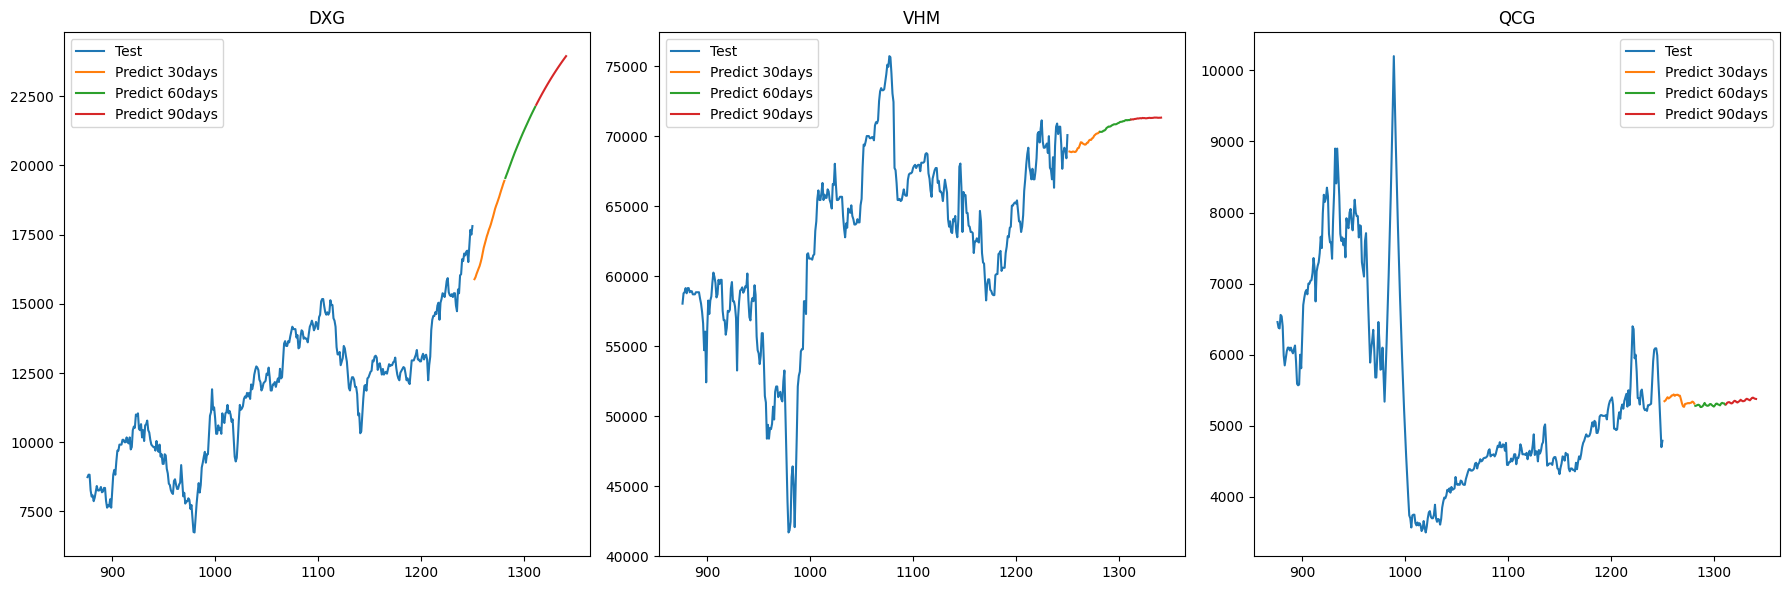

In [138]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
# dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
# axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

predict_30_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset), stop=len(dxg_dataset)+30, step=1)
axs[0].plot(predict_30_data_dxg_index, dxg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+30, stop=len(dxg_dataset)+60, step=1)
axs[0].plot(predict_60_data_dxg_index,dxg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_dxg_index = pd.RangeIndex(start=len(dxg_dataset)+60, stop=len(dxg_dataset)+90, step=1)
axs[0].plot(predict_90_data_dxg_index,dxg_predict_lst_output[60:90], label = 'Predict 90days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
# vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
# axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

predict_30_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset), stop=len(vhm_dataset)+30, step=1)
axs[1].plot(predict_30_data_vhm_index, vhm_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+30, stop=len(vhm_dataset)+60, step=1)
axs[1].plot(predict_60_data_vhm_index,vhm_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_vhm_index = pd.RangeIndex(start=len(vhm_dataset)+60, stop=len(vhm_dataset)+90, step=1)
axs[1].plot(predict_90_data_vhm_index,vhm_predict_lst_output[60:90], label = 'Predict 90days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
# qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
# axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

predict_30_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset), stop=len(qcg_dataset)+30, step=1)
axs[2].plot(predict_30_data_qcg_index, qcg_predict_lst_output[:30], label = 'Predict 30days')

predict_60_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+30, stop=len(qcg_dataset)+60, step=1)
axs[2].plot(predict_60_data_qcg_index,qcg_predict_lst_output[30:60], label = 'Predict 60days')

predict_90_data_qcg_index = pd.RangeIndex(start=len(qcg_dataset)+60, stop=len(qcg_dataset)+90, step=1)
axs[2].plot(predict_90_data_qcg_index,qcg_predict_lst_output[60:90], label = 'Predict 90days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()